***ECS708P Machine Learning Mini Project***

---



**Name : *Vineet Ranjan*** 

**Student ID : 200585446**

---




# **Summary**

The mini-project consists of two components:
1. **Basic solution** [6 marks]: Using the MLEnd dataset, build a model that predicts the intonation of a short audio segment.
2. **Advanced solution** [10 marks]: There are two options. (i) Formulate a machine learning problem that can be attempted using the MLEnd dataset and build a solution model (e.g. identify a numeral in a short sequence). (ii) Create a product that uses the functionality provided by a model trained on the MLEnd dataset (e.g. identify a number based on the identification of individual numerals).

# **Dataset Preparation and Visualization**

+ Data has been downloaded to Google Drive.
+ As part of data preparation, we create a dataset with filenames, features,  label and the intonation.




## Step 1: Execute the below code to import necessary modules.
+ Import the required inbuilt functions and libraries

In [89]:
#Basic solution code here.
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

#from IPython.display import Audio
import IPython.display as ipd
from tqdm import tqdm
import librosa
from sklearn.preprocessing import LabelEncoder

## Step 2: Environment setup
The below blocks of code are taken from the starter kit and are used to download the dataset and for feature extraction. 

Mounting the drive:

In [90]:
#drive.mount('/content/drive') 
drive.mount("/content/drive", force_remount=True)
# All files were inported in Google Drive
path = '/content/drive/MyDrive/Project/Data/TrainingMLEnd'
#os.listdir(path)


Mounted at /content/drive


Upload all the data to the Google drive and check how many audio files we have in our training dataset:

In [91]:
files = glob.glob('/content/drive/MyDrive/Project/Data/TrainingMLEnd/*/*.wav')
len(files)



20000

Load the contents of 'trainingMLEnd.csv' into a pandas DataFrame and explore them:

In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/Project/Data/TrainingMLEnd/trainingMLEnd.csv')
labels

,File ID,digit_label,participant,intonation
0,0000000.wav,4,S73,question
1,0000001.wav,2,S88,excited
2,0000002.wav,70,S5,neutral
3,0000003.wav,2,S85,bored
4,0000004.wav,4,S30,excited
...,...,...,...,...
19995,0019995.wav,90,S163,excited
19996,0019996.wav,10,S99,question
19997,0019997.wav,90,S46,question
19998,0019998.wav,19,S13,neutral


This 20000 rows corresponds to the number of items or samples in our dataset. Let's listen to some random audio files:

In [ ]:
# five random files
for _ in range(5):
  n = np.random.randint(20000)
  display(ipd.Audio(files[n]))

We define the functions to get the pitch of an audio signal

In [ ]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

Define the function to read the entire dataset file with 20K audio and calculate the power, pitch mean and pitch standard variation accordingly

In [ ]:
def getXy(files,labels_file,scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    
    fileID = file.split('/')[-1]    #extract .wav filename from full file path.
    print(fileID)
    yi = list(labels_file[labels_file['File ID']==fileID]['digit_label'])[0]
    print(yi)
    if onlySingleDigit and yi>9:  
      continue
    else: #since the onlySingleDigit=False, all the 20K dataset will be processed
      fs = None # if None, fs would be 22050
      x, fs = librosa.load(file,sr=fs)
      if scale_audio: x = x/np.max(np.abs(x)) #get maximum absolute value from the audio time series ndarray.
      
      #what is winLen ??
      
      f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
      power = np.sum(x**2)/len(x)
      pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
      pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
      voiced_fr = np.mean(voiced_flag)

      xi = [power,pitch_mean,pitch_std,voiced_fr]
      X.append(xi)
      y.append(yi)
  return np.array(X),np.array(y)

## Step 3: Dataset creation



**Feature Set**
We create a dataset with below features and labels using the 20,000 audio samples.
+ Audio sample filename
+ Features (Power, Pitch mean, Pitch Standard deviation, Fraction of voiced region)
+ Intonation

The new dataset contains the above data for all 20,000 audio samples.

In [ ]:
# arg 1 : number of files
# arg 2 : labels dataframe (csv file given)
# arg 3 : scale audio
# arf 4 : only single digit flag. set False if you don't want to discard numbers outside [0,9] range.
# Read all the 20,000 audio sample files for all numbers.
X,y = getXy(files,labels_file=labels,scale_audio=True, onlySingleDigit=False)




  0%|          | 0/20000 [00:00<?, ?it/s]

0016981.wav
6





  0%|          | 1/20000 [00:00<3:57:08,  1.41it/s]

0017318.wav
12





  0%|          | 2/20000 [00:01<3:43:09,  1.49it/s]

0007988.wav
15





  0%|          | 3/20000 [00:01<3:36:15,  1.54it/s]

0019628.wav
30





  0%|          | 4/20000 [00:02<3:40:35,  1.51it/s]

0012564.wav
18





  0%|          | 5/20000 [00:03<4:20:58,  1.28it/s]

0018780.wav
11





  0%|          | 6/20000 [00:04<4:10:39,  1.33it/s]

0003339.wav
16





  0%|          | 7/20000 [00:05<4:28:11,  1.24it/s]

0016620.wav
7





  0%|          | 8/20000 [00:06<4:27:00,  1.25it/s]

0011247.wav
3





  0%|          | 9/20000 [00:06<4:07:36,  1.35it/s]

0006043.wav
18





  0%|          | 10/20000 [00:07<4:06:17,  1.35it/s]

0005254.wav
3





  0%|          | 11/20000 [00:08<4:00:33,  1.38it/s]

0019418.wav
1000





  0%|          | 12/20000 [00:08<4:07:33,  1.35it/s]

0008085.wav
50





  0%|          | 13/20000 [00:09<4:04:51,  1.36it/s]

0009541.wav
1





  0%|          | 14/20000 [00:10<3:54:11,  1.42it/s]

0012466.wav
1





  0%|          | 15/20000 [00:10<3:54:16,  1.42it/s]

0010179.wav
11





  0%|          | 16/20000 [00:11<3:45:27,  1.48it/s]

0009434.wav
12





  0%|          | 17/20000 [00:12<3:46:37,  1.47it/s]

0006482.wav
13





  0%|          | 18/20000 [00:12<3:51:54,  1.44it/s]

0001820.wav
4





  0%|          | 19/20000 [00:13<3:40:36,  1.51it/s]

0014643.wav
19





  0%|          | 20/20000 [00:14<3:44:06,  1.49it/s]

0004542.wav
80





  0%|          | 21/20000 [00:15<4:10:28,  1.33it/s]

0008571.wav
10





  0%|          | 22/20000 [00:15<4:16:29,  1.30it/s]

0015812.wav
17





  0%|          | 23/20000 [00:16<4:13:07,  1.32it/s]

0000876.wav
19





  0%|          | 24/20000 [00:17<4:07:26,  1.35it/s]

0013428.wav
20





  0%|          | 25/20000 [00:18<4:01:56,  1.38it/s]

0008067.wav
50





  0%|          | 26/20000 [00:18<4:05:11,  1.36it/s]

0010934.wav
20





  0%|          | 27/20000 [00:19<3:58:50,  1.39it/s]

0002029.wav
14





  0%|          | 28/20000 [00:20<3:58:59,  1.39it/s]

0001589.wav
0





  0%|          | 29/20000 [00:21<4:05:02,  1.36it/s]

0007230.wav
17





  0%|          | 30/20000 [00:21<4:02:24,  1.37it/s]

0006595.wav
14





  0%|          | 31/20000 [00:22<3:59:57,  1.39it/s]

0017394.wav
4





  0%|          | 32/20000 [00:23<3:59:09,  1.39it/s]

0016165.wav
1000000





  0%|          | 33/20000 [00:23<3:55:24,  1.41it/s]

0013083.wav
5





  0%|          | 34/20000 [00:24<3:46:43,  1.47it/s]

0000379.wav
12





  0%|          | 35/20000 [00:25<3:42:20,  1.50it/s]

0004733.wav
7





  0%|          | 36/20000 [00:25<3:45:25,  1.48it/s]

0018784.wav
60





  0%|          | 37/20000 [00:26<3:53:03,  1.43it/s]

0010757.wav
2





  0%|          | 38/20000 [00:27<3:52:49,  1.43it/s]

0009242.wav
90





  0%|          | 39/20000 [00:27<3:46:27,  1.47it/s]

0002505.wav
18





  0%|          | 40/20000 [00:28<3:47:41,  1.46it/s]

0006836.wav
7





  0%|          | 41/20000 [00:29<3:46:56,  1.47it/s]

0009435.wav
30





  0%|          | 42/20000 [00:29<3:47:10,  1.46it/s]

0012209.wav
70





  0%|          | 43/20000 [00:30<3:53:42,  1.42it/s]

0013088.wav
90





  0%|          | 44/20000 [00:31<3:51:09,  1.44it/s]

0018664.wav
19





  0%|          | 45/20000 [00:32<3:49:58,  1.45it/s]

0018300.wav
0





  0%|          | 46/20000 [00:32<3:54:11,  1.42it/s]

0019161.wav
30





  0%|          | 47/20000 [00:33<3:45:31,  1.47it/s]

0015234.wav
80





  0%|          | 48/20000 [00:34<3:52:20,  1.43it/s]

0015909.wav
18





  0%|          | 49/20000 [00:35<4:21:27,  1.27it/s]

0000718.wav
80





  0%|          | 50/20000 [00:36<4:43:39,  1.17it/s]

0014273.wav
16





  0%|          | 51/20000 [00:36<4:29:58,  1.23it/s]

0000752.wav
70





  0%|          | 52/20000 [00:37<4:22:08,  1.27it/s]

0005243.wav
17





  0%|          | 53/20000 [00:38<4:01:47,  1.37it/s]

0007052.wav
40





  0%|          | 54/20000 [00:38<3:47:13,  1.46it/s]

0012213.wav
20





  0%|          | 55/20000 [00:39<3:43:21,  1.49it/s]

0019663.wav
8





  0%|          | 56/20000 [00:40<3:42:48,  1.49it/s]

0019495.wav
0





  0%|          | 57/20000 [00:40<3:40:23,  1.51it/s]

0007373.wav
11





  0%|          | 58/20000 [00:41<3:38:23,  1.52it/s]

0007032.wav
70





  0%|          | 59/20000 [00:42<3:46:09,  1.47it/s]

0004507.wav
7





  0%|          | 60/20000 [00:42<3:57:02,  1.40it/s]

0018097.wav
80





  0%|          | 61/20000 [00:43<3:41:59,  1.50it/s]

0008570.wav
10





  0%|          | 62/20000 [00:44<3:43:34,  1.49it/s]

0000574.wav
5





  0%|          | 63/20000 [00:44<3:45:35,  1.47it/s]

0009295.wav
90





  0%|          | 64/20000 [00:45<3:49:00,  1.45it/s]

0004627.wav
4





  0%|          | 65/20000 [00:46<3:48:34,  1.45it/s]

0010036.wav
11





  0%|          | 66/20000 [00:47<4:05:00,  1.36it/s]

0017198.wav
14





  0%|          | 67/20000 [00:47<3:54:21,  1.42it/s]

0013592.wav
100





  0%|          | 68/20000 [00:48<3:38:09,  1.52it/s]

0014001.wav
40





  0%|          | 69/20000 [00:49<3:47:25,  1.46it/s]

0019842.wav
13





  0%|          | 70/20000 [00:49<4:06:44,  1.35it/s]

0009338.wav
15





  0%|          | 71/20000 [00:50<3:54:52,  1.41it/s]

0015822.wav
70





  0%|          | 72/20000 [00:51<3:47:27,  1.46it/s]

0001498.wav
10





  0%|          | 73/20000 [00:51<4:00:16,  1.38it/s]

0010727.wav
7





  0%|          | 74/20000 [00:52<3:43:20,  1.49it/s]

0005841.wav
100





  0%|          | 75/20000 [00:53<3:41:58,  1.50it/s]

0006665.wav
30





  0%|          | 76/20000 [00:53<3:52:25,  1.43it/s]

0018253.wav
10





  0%|          | 77/20000 [00:54<3:57:30,  1.40it/s]

0014571.wav
6





  0%|          | 78/20000 [00:55<3:56:52,  1.40it/s]

0003755.wav
50





  0%|          | 79/20000 [00:55<3:41:00,  1.50it/s]

0015444.wav
2





  0%|          | 80/20000 [00:56<3:45:42,  1.47it/s]

0018851.wav
6





  0%|          | 81/20000 [00:57<3:41:58,  1.50it/s]

0004211.wav
0





  0%|          | 82/20000 [00:57<3:35:11,  1.54it/s]

0002120.wav
14





  0%|          | 83/20000 [00:58<3:21:35,  1.65it/s]

0001642.wav
2





  0%|          | 84/20000 [00:58<3:17:43,  1.68it/s]

0012191.wav
12





  0%|          | 85/20000 [00:59<3:33:18,  1.56it/s]

0003653.wav
15





  0%|          | 86/20000 [01:00<3:47:28,  1.46it/s]

0005528.wav
12





  0%|          | 87/20000 [01:01<3:47:34,  1.46it/s]

0000164.wav
1





  0%|          | 88/20000 [01:01<3:47:29,  1.46it/s]

0012499.wav
14





  0%|          | 89/20000 [01:02<3:36:57,  1.53it/s]

0002145.wav
0





  0%|          | 90/20000 [01:03<3:38:04,  1.52it/s]

0003876.wav
16





  0%|          | 91/20000 [01:03<3:37:38,  1.52it/s]

0012019.wav
70





  0%|          | 92/20000 [01:04<3:38:14,  1.52it/s]

0006260.wav
90





  0%|          | 93/20000 [01:05<3:44:26,  1.48it/s]

0011497.wav
15





  0%|          | 94/20000 [01:05<3:47:56,  1.46it/s]

0001527.wav
18





  0%|          | 95/20000 [01:06<3:46:06,  1.47it/s]

0006167.wav
16





  0%|          | 96/20000 [01:07<4:41:20,  1.18it/s]

0002635.wav
0





  0%|          | 97/20000 [01:08<4:31:56,  1.22it/s]

0003820.wav
30





  0%|          | 98/20000 [01:09<4:08:50,  1.33it/s]

0003279.wav
90





  0%|          | 99/20000 [01:09<3:58:07,  1.39it/s]

0012222.wav
9





  0%|          | 100/20000 [01:10<3:46:30,  1.46it/s]

0006059.wav
14





  1%|          | 101/20000 [01:11<3:47:55,  1.46it/s]

0015689.wav
16





  1%|          | 102/20000 [01:11<3:49:53,  1.44it/s]

0004446.wav
11





  1%|          | 103/20000 [01:12<3:54:16,  1.42it/s]

0000247.wav
20





  1%|          | 104/20000 [01:13<3:59:14,  1.39it/s]

0007526.wav
1





  1%|          | 105/20000 [01:13<3:43:31,  1.48it/s]

0013238.wav
2





  1%|          | 106/20000 [01:14<3:38:25,  1.52it/s]

0001660.wav
1000





  1%|          | 107/20000 [01:15<3:40:42,  1.50it/s]

0010227.wav
18





  1%|          | 108/20000 [01:15<3:33:03,  1.56it/s]

0009016.wav
14





  1%|          | 109/20000 [01:16<3:41:37,  1.50it/s]

0014358.wav
1000





  1%|          | 110/20000 [01:17<3:39:25,  1.51it/s]

0000846.wav
20





  1%|          | 111/20000 [01:17<3:49:22,  1.45it/s]

0005147.wav
12





  1%|          | 112/20000 [01:18<3:41:00,  1.50it/s]

0001845.wav
9





  1%|          | 113/20000 [01:19<3:35:30,  1.54it/s]

0007986.wav
1000





  1%|          | 114/20000 [01:19<3:37:00,  1.53it/s]

0004413.wav
4





  1%|          | 115/20000 [01:20<3:35:34,  1.54it/s]

0000076.wav
9





  1%|          | 116/20000 [01:21<3:47:13,  1.46it/s]

0005229.wav
50





  1%|          | 117/20000 [01:21<3:47:45,  1.46it/s]

0011155.wav
11





  1%|          | 118/20000 [01:22<3:53:26,  1.42it/s]

0013344.wav
6





  1%|          | 119/20000 [01:23<3:41:26,  1.50it/s]

0016145.wav
2





  1%|          | 120/20000 [01:23<3:34:39,  1.54it/s]

0011381.wav
12





  1%|          | 121/20000 [01:24<3:28:54,  1.59it/s]

0016979.wav
11





  1%|          | 122/20000 [01:25<3:55:21,  1.41it/s]

0005773.wav
50





  1%|          | 123/20000 [01:25<3:56:23,  1.40it/s]

0005860.wav
6





  1%|          | 124/20000 [01:26<3:57:19,  1.40it/s]

0010718.wav
15





  1%|          | 125/20000 [01:27<4:01:06,  1.37it/s]

0005466.wav
50





  1%|          | 126/20000 [01:28<3:48:09,  1.45it/s]

0006672.wav
30





  1%|          | 127/20000 [01:28<3:45:36,  1.47it/s]

0015529.wav
100





  1%|          | 128/20000 [01:29<3:45:41,  1.47it/s]

0010303.wav
11





  1%|          | 129/20000 [01:29<3:33:27,  1.55it/s]

0017680.wav
80





  1%|          | 130/20000 [01:30<3:30:56,  1.57it/s]

0008868.wav
10





  1%|          | 131/20000 [01:31<3:33:17,  1.55it/s]

0016429.wav
6





  1%|          | 132/20000 [01:31<3:33:43,  1.55it/s]

0011637.wav
1





  1%|          | 133/20000 [01:32<3:30:18,  1.57it/s]

0018634.wav
13





  1%|          | 134/20000 [01:33<3:33:19,  1.55it/s]

0005322.wav
80





  1%|          | 135/20000 [01:33<3:23:51,  1.62it/s]

0002126.wav
100





  1%|          | 136/20000 [01:34<3:19:34,  1.66it/s]

0000202.wav
4





  1%|          | 137/20000 [01:35<3:46:02,  1.46it/s]

0013091.wav
90





  1%|          | 138/20000 [01:35<3:49:34,  1.44it/s]

0017601.wav
30





  1%|          | 139/20000 [01:36<3:51:05,  1.43it/s]

0006216.wav
1000





  1%|          | 140/20000 [01:37<3:46:35,  1.46it/s]

0010750.wav
15





  1%|          | 141/20000 [01:37<3:51:46,  1.43it/s]

0006694.wav
3





  1%|          | 142/20000 [01:38<4:01:07,  1.37it/s]

0017815.wav
8





  1%|          | 143/20000 [01:39<3:52:55,  1.42it/s]

0004415.wav
5





  1%|          | 144/20000 [01:40<3:40:34,  1.50it/s]

0019791.wav
7





  1%|          | 145/20000 [01:40<3:43:59,  1.48it/s]

0000329.wav
50





  1%|          | 146/20000 [01:41<3:35:11,  1.54it/s]

0016538.wav
16





  1%|          | 147/20000 [01:41<3:39:46,  1.51it/s]

0001594.wav
5





  1%|          | 148/20000 [01:42<3:29:08,  1.58it/s]

0014109.wav
13





  1%|          | 149/20000 [01:43<3:42:06,  1.49it/s]

0006119.wav
12





  1%|          | 150/20000 [01:43<3:30:25,  1.57it/s]

0015749.wav
10





  1%|          | 151/20000 [01:44<3:35:21,  1.54it/s]

0019200.wav
18





  1%|          | 152/20000 [01:45<3:43:57,  1.48it/s]

0013460.wav
60





  1%|          | 153/20000 [01:45<3:40:38,  1.50it/s]

0006168.wav
18





  1%|          | 154/20000 [01:46<3:42:20,  1.49it/s]

0007776.wav
7





  1%|          | 155/20000 [01:47<3:40:07,  1.50it/s]

0011173.wav
0





  1%|          | 156/20000 [01:48<3:49:54,  1.44it/s]

0005819.wav
8





  1%|          | 157/20000 [01:48<4:04:37,  1.35it/s]

0015640.wav
50





  1%|          | 158/20000 [01:49<3:55:51,  1.40it/s]

0011983.wav
9





  1%|          | 159/20000 [01:50<4:01:34,  1.37it/s]

0001513.wav
19





  1%|          | 160/20000 [01:51<4:06:31,  1.34it/s]

0013143.wav
100





  1%|          | 161/20000 [01:51<3:55:55,  1.40it/s]

0001520.wav
17





  1%|          | 162/20000 [01:52<3:56:21,  1.40it/s]

0018215.wav
1000000





  1%|          | 163/20000 [01:53<3:55:06,  1.41it/s]

0006685.wav
3





  1%|          | 164/20000 [01:53<3:57:49,  1.39it/s]

0015374.wav
5





  1%|          | 165/20000 [01:54<4:04:27,  1.35it/s]

0011612.wav
12





  1%|          | 166/20000 [01:55<4:08:11,  1.33it/s]

0016867.wav
60





  1%|          | 167/20000 [01:56<4:00:16,  1.38it/s]

0005054.wav
8





  1%|          | 168/20000 [01:56<3:51:20,  1.43it/s]

0009765.wav
13





  1%|          | 169/20000 [01:57<3:35:10,  1.54it/s]

0003619.wav
1000000000





  1%|          | 170/20000 [01:57<3:25:18,  1.61it/s]

0004099.wav
13





  1%|          | 171/20000 [01:58<3:19:04,  1.66it/s]

0016415.wav
4





  1%|          | 172/20000 [01:59<3:28:58,  1.58it/s]

0009209.wav
11





  1%|          | 173/20000 [01:59<3:22:29,  1.63it/s]

0016745.wav
1000





  1%|          | 174/20000 [02:00<3:30:11,  1.57it/s]

0007620.wav
1





  1%|          | 175/20000 [02:01<3:33:18,  1.55it/s]

0019975.wav
6





  1%|          | 176/20000 [02:01<3:42:26,  1.49it/s]

0013891.wav
16





  1%|          | 177/20000 [02:02<3:34:46,  1.54it/s]

0001864.wav
90





  1%|          | 178/20000 [02:02<3:26:37,  1.60it/s]

0000482.wav
80





  1%|          | 179/20000 [02:03<3:24:18,  1.62it/s]

0010485.wav
40





  1%|          | 180/20000 [02:04<3:33:21,  1.55it/s]

0009436.wav
16





  1%|          | 181/20000 [02:05<4:14:24,  1.30it/s]

0013232.wav
40





  1%|          | 182/20000 [02:05<3:55:33,  1.40it/s]

0007735.wav
40





  1%|          | 183/20000 [02:06<4:17:26,  1.28it/s]

0019477.wav
40





  1%|          | 184/20000 [02:07<4:06:55,  1.34it/s]

0010709.wav
14





  1%|          | 185/20000 [02:08<4:03:03,  1.36it/s]

0015426.wav
10





  1%|          | 186/20000 [02:08<3:54:16,  1.41it/s]

0013674.wav
100





  1%|          | 187/20000 [02:09<3:41:26,  1.49it/s]

0015979.wav
0





  1%|          | 188/20000 [02:10<3:52:53,  1.42it/s]

0003852.wav
70





  1%|          | 189/20000 [02:10<3:54:38,  1.41it/s]

0018828.wav
7





  1%|          | 190/20000 [02:11<3:52:00,  1.42it/s]

0004114.wav
7





  1%|          | 191/20000 [02:12<3:52:52,  1.42it/s]

0004263.wav
9





  1%|          | 192/20000 [02:13<3:58:34,  1.38it/s]

0012531.wav
6





  1%|          | 193/20000 [02:13<3:57:58,  1.39it/s]

0004945.wav
15





  1%|          | 194/20000 [02:14<3:46:32,  1.46it/s]

0009902.wav
11





  1%|          | 195/20000 [02:15<3:58:34,  1.38it/s]

0011342.wav
100





  1%|          | 196/20000 [02:15<3:39:37,  1.50it/s]

0019659.wav
10





  1%|          | 197/20000 [02:16<3:36:16,  1.53it/s]

0014252.wav
19





  1%|          | 198/20000 [02:17<3:42:14,  1.48it/s]

0001114.wav
90





  1%|          | 199/20000 [02:17<3:44:44,  1.47it/s]

0019157.wav
14





  1%|          | 200/20000 [02:18<3:39:31,  1.50it/s]

0006503.wav
9





  1%|          | 201/20000 [02:19<3:47:42,  1.45it/s]

0012786.wav
11





  1%|          | 202/20000 [02:19<3:48:46,  1.44it/s]

0004500.wav
80





  1%|          | 203/20000 [02:20<3:49:30,  1.44it/s]

0013287.wav
4





  1%|          | 204/20000 [02:21<3:50:21,  1.43it/s]

0000197.wav
4





  1%|          | 205/20000 [02:21<3:34:16,  1.54it/s]

0012986.wav
2





  1%|          | 206/20000 [02:22<3:51:02,  1.43it/s]

0002485.wav
14





  1%|          | 207/20000 [02:23<3:41:05,  1.49it/s]

0001908.wav
60





  1%|          | 208/20000 [02:24<3:56:01,  1.40it/s]

0000670.wav
6





  1%|          | 209/20000 [02:24<4:12:14,  1.31it/s]

0003652.wav
80





  1%|          | 210/20000 [02:25<4:00:46,  1.37it/s]

0012429.wav
19





  1%|          | 211/20000 [02:26<3:59:30,  1.38it/s]

0006816.wav
12





  1%|          | 212/20000 [02:26<3:56:40,  1.39it/s]

0006839.wav
1





  1%|          | 213/20000 [02:27<4:03:21,  1.36it/s]

0001395.wav
30





  1%|          | 214/20000 [02:28<4:00:02,  1.37it/s]

0017418.wav
1000000000





  1%|          | 215/20000 [02:29<4:17:54,  1.28it/s]

0008529.wav
14





  1%|          | 216/20000 [02:30<4:09:04,  1.32it/s]

0001747.wav
19





  1%|          | 217/20000 [02:30<4:02:59,  1.36it/s]

0016761.wav
1000000





  1%|          | 218/20000 [02:31<3:55:31,  1.40it/s]

0002407.wav
1000000000





  1%|          | 219/20000 [02:32<4:02:42,  1.36it/s]

0015162.wav
15





  1%|          | 220/20000 [02:32<3:55:37,  1.40it/s]

0019580.wav
60





  1%|          | 221/20000 [02:33<3:56:05,  1.40it/s]

0001743.wav
19





  1%|          | 222/20000 [02:34<4:03:06,  1.36it/s]

0007508.wav
4





  1%|          | 223/20000 [02:35<3:55:44,  1.40it/s]

0018163.wav
1000000





  1%|          | 224/20000 [02:35<3:35:14,  1.53it/s]

0001399.wav
40





  1%|          | 225/20000 [02:36<3:28:44,  1.58it/s]

0010719.wav
3





  1%|          | 226/20000 [02:36<3:30:51,  1.56it/s]

0005323.wav
10





  1%|          | 227/20000 [02:37<3:25:49,  1.60it/s]

0017322.wav
90





  1%|          | 228/20000 [02:38<3:27:17,  1.59it/s]

0000801.wav
0





  1%|          | 229/20000 [02:38<3:47:37,  1.45it/s]

0016365.wav
2





  1%|          | 230/20000 [02:39<3:43:43,  1.47it/s]

0018395.wav
40





  1%|          | 231/20000 [02:40<3:41:28,  1.49it/s]

0006552.wav
20





  1%|          | 232/20000 [02:40<3:41:09,  1.49it/s]

0010926.wav
9





  1%|          | 233/20000 [02:41<3:46:51,  1.45it/s]

0006009.wav
14





  1%|          | 234/20000 [02:42<3:49:24,  1.44it/s]

0001643.wav
16





  1%|          | 235/20000 [02:42<3:48:15,  1.44it/s]

0017096.wav
0





  1%|          | 236/20000 [02:43<3:43:40,  1.47it/s]

0002681.wav
5





  1%|          | 237/20000 [02:44<3:45:40,  1.46it/s]

0004431.wav
50





  1%|          | 238/20000 [02:45<3:47:10,  1.45it/s]

0014495.wav
50





  1%|          | 239/20000 [02:45<3:48:49,  1.44it/s]

0007453.wav
1000





  1%|          | 240/20000 [02:46<3:43:04,  1.48it/s]

0013577.wav
100





  1%|          | 241/20000 [02:47<3:39:54,  1.50it/s]

0019831.wav
6





  1%|          | 242/20000 [02:47<3:59:01,  1.38it/s]

0008669.wav
1000000000





  1%|          | 243/20000 [02:48<4:11:03,  1.31it/s]

0016865.wav
7





  1%|          | 244/20000 [02:49<4:06:42,  1.33it/s]

0015898.wav
15





  1%|          | 245/20000 [02:50<3:48:45,  1.44it/s]

0002280.wav
5





  1%|          | 246/20000 [02:50<3:30:39,  1.56it/s]

0005917.wav
1000





  1%|          | 247/20000 [02:51<3:41:52,  1.48it/s]

0005533.wav
16





  1%|          | 248/20000 [02:51<3:45:45,  1.46it/s]

0010057.wav
9





  1%|          | 249/20000 [02:52<3:42:37,  1.48it/s]

0009227.wav
70





  1%|▏         | 250/20000 [02:53<3:41:50,  1.48it/s]

0016272.wav
10





  1%|▏         | 251/20000 [02:53<3:39:05,  1.50it/s]

0001739.wav
15





  1%|▏         | 252/20000 [02:54<3:29:56,  1.57it/s]

0000203.wav
19





  1%|▏         | 253/20000 [02:55<3:34:54,  1.53it/s]

0017873.wav
1000000000





  1%|▏         | 254/20000 [02:55<3:36:27,  1.52it/s]

0012006.wav
11





  1%|▏         | 255/20000 [02:56<3:47:45,  1.44it/s]

0001760.wav
70





  1%|▏         | 256/20000 [02:57<3:57:34,  1.39it/s]

0005448.wav
14





  1%|▏         | 257/20000 [02:58<3:58:26,  1.38it/s]

0011820.wav
3





  1%|▏         | 258/20000 [02:58<3:41:10,  1.49it/s]

0011332.wav
17





  1%|▏         | 259/20000 [02:59<3:41:23,  1.49it/s]

0013147.wav
17





  1%|▏         | 260/20000 [03:00<3:49:40,  1.43it/s]

0011861.wav
60





  1%|▏         | 261/20000 [03:00<3:46:58,  1.45it/s]

0001080.wav
15





  1%|▏         | 262/20000 [03:01<3:47:54,  1.44it/s]

0005084.wav
9





  1%|▏         | 263/20000 [03:02<3:55:27,  1.40it/s]

0019836.wav
1





  1%|▏         | 264/20000 [03:02<3:49:52,  1.43it/s]

0011236.wav
60





  1%|▏         | 265/20000 [03:03<3:38:37,  1.50it/s]

0011295.wav
17





  1%|▏         | 266/20000 [03:04<3:48:22,  1.44it/s]

0012838.wav
18





  1%|▏         | 267/20000 [03:05<4:00:22,  1.37it/s]

0016559.wav
20





  1%|▏         | 268/20000 [03:05<3:55:44,  1.40it/s]

0016837.wav
17





  1%|▏         | 269/20000 [03:06<3:54:36,  1.40it/s]

0004186.wav
4





  1%|▏         | 270/20000 [03:07<3:53:15,  1.41it/s]

0002632.wav
1





  1%|▏         | 271/20000 [03:07<3:40:21,  1.49it/s]

0012089.wav
80





  1%|▏         | 272/20000 [03:08<3:24:21,  1.61it/s]

0015037.wav
5





  1%|▏         | 273/20000 [03:08<3:21:41,  1.63it/s]

0005972.wav
17





  1%|▏         | 274/20000 [03:09<3:17:32,  1.66it/s]

0017659.wav
18





  1%|▏         | 275/20000 [03:10<3:25:36,  1.60it/s]

0012817.wav
2





  1%|▏         | 276/20000 [03:10<3:33:23,  1.54it/s]

0019059.wav
17





  1%|▏         | 277/20000 [03:11<3:43:12,  1.47it/s]

0007903.wav
0





  1%|▏         | 278/20000 [03:12<3:32:13,  1.55it/s]

0014639.wav
1000000000





  1%|▏         | 279/20000 [03:12<3:46:41,  1.45it/s]

0010029.wav
1000000





  1%|▏         | 280/20000 [03:13<3:51:57,  1.42it/s]

0011071.wav
9





  1%|▏         | 281/20000 [03:14<4:15:08,  1.29it/s]

0008826.wav
1000000





  1%|▏         | 282/20000 [03:15<3:52:02,  1.42it/s]

0003163.wav
60





  1%|▏         | 283/20000 [03:15<3:45:29,  1.46it/s]

0015219.wav
14





  1%|▏         | 284/20000 [03:16<3:43:38,  1.47it/s]

0007661.wav
50





  1%|▏         | 285/20000 [03:17<3:42:35,  1.48it/s]

0012621.wav
14





  1%|▏         | 286/20000 [03:17<3:47:59,  1.44it/s]

0003816.wav
80





  1%|▏         | 287/20000 [03:18<3:46:13,  1.45it/s]

0004667.wav
6





  1%|▏         | 288/20000 [03:19<3:49:06,  1.43it/s]

0003247.wav
12





  1%|▏         | 289/20000 [03:19<3:32:25,  1.55it/s]

0000099.wav
1000000000





  1%|▏         | 290/20000 [03:20<3:38:00,  1.51it/s]

0016417.wav
13





  1%|▏         | 291/20000 [03:21<3:38:45,  1.50it/s]

0007732.wav
8





  1%|▏         | 292/20000 [03:21<3:29:44,  1.57it/s]

0011008.wav
13





  1%|▏         | 293/20000 [03:22<3:39:17,  1.50it/s]

0017208.wav
30





  1%|▏         | 294/20000 [03:23<3:44:41,  1.46it/s]

0012485.wav
20





  1%|▏         | 295/20000 [03:23<3:46:56,  1.45it/s]

0015947.wav
12





  1%|▏         | 296/20000 [03:24<3:51:41,  1.42it/s]

0017483.wav
90





  1%|▏         | 297/20000 [03:25<3:50:37,  1.42it/s]

0018529.wav
19





  1%|▏         | 298/20000 [03:26<3:50:29,  1.42it/s]

0007517.wav
5





  1%|▏         | 299/20000 [03:26<4:02:46,  1.35it/s]

0015777.wav
10





  2%|▏         | 300/20000 [03:27<3:49:54,  1.43it/s]

0018992.wav
60





  2%|▏         | 301/20000 [03:28<3:50:44,  1.42it/s]

0001472.wav
2





  2%|▏         | 302/20000 [03:29<4:01:05,  1.36it/s]

0003638.wav
18





  2%|▏         | 303/20000 [03:29<3:45:06,  1.46it/s]

0018371.wav
1000000





  2%|▏         | 304/20000 [03:30<3:43:39,  1.47it/s]

0009088.wav
5





  2%|▏         | 305/20000 [03:30<3:43:34,  1.47it/s]

0006567.wav
6





  2%|▏         | 306/20000 [03:31<3:41:27,  1.48it/s]

0013928.wav
11





  2%|▏         | 307/20000 [03:32<3:31:07,  1.55it/s]

0016452.wav
30





  2%|▏         | 308/20000 [03:32<3:35:35,  1.52it/s]

0017572.wav
13





  2%|▏         | 309/20000 [03:33<3:40:01,  1.49it/s]

0002653.wav
17





  2%|▏         | 310/20000 [03:34<3:34:18,  1.53it/s]

0017955.wav
1000





  2%|▏         | 311/20000 [03:35<4:02:38,  1.35it/s]

0017028.wav
11





  2%|▏         | 312/20000 [03:35<3:55:22,  1.39it/s]

0018171.wav
70





  2%|▏         | 313/20000 [03:36<3:40:01,  1.49it/s]

0014098.wav
1000





  2%|▏         | 314/20000 [03:37<3:44:52,  1.46it/s]

0012890.wav
1





  2%|▏         | 315/20000 [03:37<3:33:41,  1.54it/s]

0015132.wav
5





  2%|▏         | 316/20000 [03:38<3:32:01,  1.55it/s]

0015734.wav
14





  2%|▏         | 317/20000 [03:38<3:35:17,  1.52it/s]

0010891.wav
40





  2%|▏         | 318/20000 [03:39<3:26:58,  1.58it/s]

0012226.wav
16





  2%|▏         | 319/20000 [03:40<3:29:54,  1.56it/s]

0015397.wav
2





  2%|▏         | 320/20000 [03:40<3:32:44,  1.54it/s]

0011226.wav
5





  2%|▏         | 321/20000 [03:41<3:26:53,  1.59it/s]

0016691.wav
10





  2%|▏         | 322/20000 [03:42<3:25:57,  1.59it/s]

0009969.wav
20





  2%|▏         | 323/20000 [03:42<3:30:00,  1.56it/s]

0003942.wav
60





  2%|▏         | 324/20000 [03:43<3:35:28,  1.52it/s]

0012349.wav
3





  2%|▏         | 325/20000 [03:44<3:44:47,  1.46it/s]

0014220.wav
3





  2%|▏         | 326/20000 [03:45<4:08:23,  1.32it/s]

0014218.wav
70





  2%|▏         | 327/20000 [03:45<4:14:51,  1.29it/s]

0001261.wav
1000000





  2%|▏         | 328/20000 [03:46<3:54:59,  1.40it/s]

0015201.wav
13





  2%|▏         | 329/20000 [03:47<4:03:10,  1.35it/s]

0005053.wav
1000000000





  2%|▏         | 330/20000 [03:47<3:57:16,  1.38it/s]

0019502.wav
30





  2%|▏         | 331/20000 [03:48<3:47:15,  1.44it/s]

0005077.wav
2





  2%|▏         | 332/20000 [03:49<3:56:53,  1.38it/s]

0012690.wav
50





  2%|▏         | 333/20000 [03:50<4:13:40,  1.29it/s]

0011878.wav
50





  2%|▏         | 334/20000 [03:51<4:12:06,  1.30it/s]

0002464.wav
16





  2%|▏         | 335/20000 [03:51<4:03:16,  1.35it/s]

0007044.wav
1000





  2%|▏         | 336/20000 [03:52<3:56:49,  1.38it/s]

0014403.wav
8





  2%|▏         | 337/20000 [03:53<4:02:52,  1.35it/s]

0018047.wav
1000000000





  2%|▏         | 338/20000 [03:54<4:08:38,  1.32it/s]

0000075.wav
17





  2%|▏         | 339/20000 [03:55<5:18:37,  1.03it/s]

0011775.wav
19





  2%|▏         | 340/20000 [03:56<5:02:35,  1.08it/s]

0017705.wav
18





  2%|▏         | 341/20000 [03:56<4:35:31,  1.19it/s]

0014200.wav
8





  2%|▏         | 342/20000 [03:57<4:07:42,  1.32it/s]

0001875.wav
1000000000





  2%|▏         | 343/20000 [03:58<4:02:10,  1.35it/s]

0014123.wav
7





  2%|▏         | 344/20000 [03:58<4:03:12,  1.35it/s]

0016722.wav
1000000





  2%|▏         | 345/20000 [03:59<3:56:01,  1.39it/s]

0003161.wav
5





  2%|▏         | 346/20000 [04:00<3:54:59,  1.39it/s]

0013401.wav
5





  2%|▏         | 347/20000 [04:01<4:06:25,  1.33it/s]

0015730.wav
12





  2%|▏         | 348/20000 [04:01<3:47:36,  1.44it/s]

0010044.wav
50





  2%|▏         | 349/20000 [04:02<3:47:55,  1.44it/s]

0001068.wav
20





  2%|▏         | 350/20000 [04:02<3:33:10,  1.54it/s]

0001625.wav
2





  2%|▏         | 351/20000 [04:03<3:26:48,  1.58it/s]

0003435.wav
30





  2%|▏         | 352/20000 [04:04<3:20:29,  1.63it/s]

0002796.wav
8





  2%|▏         | 353/20000 [04:04<3:46:22,  1.45it/s]

0006772.wav
6





  2%|▏         | 354/20000 [04:05<3:46:06,  1.45it/s]

0010845.wav
70





  2%|▏         | 355/20000 [04:06<3:39:24,  1.49it/s]

0003886.wav
1000000000





  2%|▏         | 356/20000 [04:06<3:40:42,  1.48it/s]

0003572.wav
8





  2%|▏         | 357/20000 [04:07<3:39:54,  1.49it/s]

0013181.wav
0





  2%|▏         | 358/20000 [04:08<3:41:06,  1.48it/s]

0010886.wav
60





  2%|▏         | 359/20000 [04:09<3:42:29,  1.47it/s]

0008227.wav
50





  2%|▏         | 360/20000 [04:09<3:41:12,  1.48it/s]

0012980.wav
18





  2%|▏         | 361/20000 [04:10<3:34:26,  1.53it/s]

0018025.wav
7





  2%|▏         | 362/20000 [04:11<3:44:35,  1.46it/s]

0005869.wav
80





  2%|▏         | 363/20000 [04:11<3:41:26,  1.48it/s]

0008013.wav
2





  2%|▏         | 364/20000 [04:14<7:02:15,  1.29s/it]

0001309.wav
20





  2%|▏         | 365/20000 [04:15<6:05:36,  1.12s/it]

0019649.wav
80





  2%|▏         | 366/20000 [04:15<5:23:18,  1.01it/s]

0012830.wav
0





  2%|▏         | 367/20000 [04:16<4:51:58,  1.12it/s]

0013530.wav
1000





  2%|▏         | 368/20000 [04:17<4:30:07,  1.21it/s]

0013587.wav
16





  2%|▏         | 369/20000 [04:17<4:18:24,  1.27it/s]

0016400.wav
3





  2%|▏         | 370/20000 [04:18<4:09:22,  1.31it/s]

0008652.wav
18





  2%|▏         | 371/20000 [04:19<4:13:18,  1.29it/s]

0007851.wav
1000000000





  2%|▏         | 372/20000 [04:20<4:07:03,  1.32it/s]

0013471.wav
19





  2%|▏         | 373/20000 [04:20<3:58:04,  1.37it/s]

0006222.wav
100





  2%|▏         | 374/20000 [04:21<3:55:25,  1.39it/s]

0015485.wav
30





  2%|▏         | 375/20000 [04:22<3:38:41,  1.50it/s]

0002884.wav
6





  2%|▏         | 376/20000 [04:22<3:30:27,  1.55it/s]

0014701.wav
40





  2%|▏         | 377/20000 [04:23<3:38:13,  1.50it/s]

0017927.wav
90





  2%|▏         | 378/20000 [04:24<3:43:01,  1.47it/s]

0001581.wav
9





  2%|▏         | 379/20000 [04:24<3:50:06,  1.42it/s]

0000473.wav
17





  2%|▏         | 380/20000 [04:25<3:41:13,  1.48it/s]

0005478.wav
100





  2%|▏         | 381/20000 [04:26<3:41:31,  1.48it/s]

0013275.wav
1





  2%|▏         | 382/20000 [04:26<3:36:31,  1.51it/s]

0005679.wav
1000000





  2%|▏         | 383/20000 [04:27<3:34:51,  1.52it/s]

0014154.wav
16





  2%|▏         | 384/20000 [04:28<3:37:50,  1.50it/s]

0009238.wav
1000





  2%|▏         | 385/20000 [04:28<3:40:25,  1.48it/s]

0000594.wav
11





  2%|▏         | 386/20000 [04:29<3:31:54,  1.54it/s]

0015492.wav
80





  2%|▏         | 387/20000 [04:30<3:43:13,  1.46it/s]

0011946.wav
10





  2%|▏         | 388/20000 [04:30<3:57:57,  1.37it/s]

0016504.wav
30





  2%|▏         | 389/20000 [04:31<3:42:51,  1.47it/s]

0007343.wav
18





  2%|▏         | 390/20000 [04:32<3:43:57,  1.46it/s]

0014048.wav
13





  2%|▏         | 391/20000 [04:32<3:42:20,  1.47it/s]

0003710.wav
15





  2%|▏         | 392/20000 [04:33<3:42:22,  1.47it/s]

0004647.wav
1000





  2%|▏         | 393/20000 [04:34<3:42:21,  1.47it/s]

0002372.wav
100





  2%|▏         | 394/20000 [04:34<3:36:29,  1.51it/s]

0008964.wav
0





  2%|▏         | 395/20000 [04:35<3:24:41,  1.60it/s]

0009731.wav
6





  2%|▏         | 396/20000 [04:36<3:33:17,  1.53it/s]

0000659.wav
70





  2%|▏         | 397/20000 [04:36<3:23:41,  1.60it/s]

0019364.wav
14





  2%|▏         | 398/20000 [04:37<3:31:08,  1.55it/s]

0015312.wav
90





  2%|▏         | 399/20000 [04:37<3:23:36,  1.60it/s]

0000049.wav
16





  2%|▏         | 400/20000 [04:38<3:35:52,  1.51it/s]

0011943.wav
2





  2%|▏         | 401/20000 [04:39<3:41:20,  1.48it/s]

0012852.wav
8





  2%|▏         | 402/20000 [04:40<3:48:26,  1.43it/s]

0000222.wav
12





  2%|▏         | 403/20000 [04:40<3:43:55,  1.46it/s]

0007386.wav
10





  2%|▏         | 404/20000 [04:41<3:43:19,  1.46it/s]

0010313.wav
1000





  2%|▏         | 405/20000 [04:42<3:51:30,  1.41it/s]

0005561.wav
1





  2%|▏         | 406/20000 [04:42<3:44:15,  1.46it/s]

0010802.wav
20





  2%|▏         | 407/20000 [04:43<3:42:28,  1.47it/s]

0017143.wav
13





  2%|▏         | 408/20000 [04:44<3:47:57,  1.43it/s]

0007949.wav
3





  2%|▏         | 409/20000 [04:45<4:26:44,  1.22it/s]

0010930.wav
90





  2%|▏         | 410/20000 [04:45<4:03:19,  1.34it/s]

0003380.wav
4





  2%|▏         | 411/20000 [04:46<3:56:16,  1.38it/s]

0018789.wav
11





  2%|▏         | 412/20000 [04:47<4:04:03,  1.34it/s]

0014662.wav
60





  2%|▏         | 413/20000 [04:48<3:58:37,  1.37it/s]

0012609.wav
1000000





  2%|▏         | 414/20000 [04:48<3:52:03,  1.41it/s]

0007563.wav
50





  2%|▏         | 415/20000 [04:49<3:40:07,  1.48it/s]

0009303.wav
1





  2%|▏         | 416/20000 [04:49<3:29:16,  1.56it/s]

0009324.wav
14





  2%|▏         | 417/20000 [04:50<3:20:30,  1.63it/s]

0004629.wav
4





  2%|▏         | 418/20000 [04:51<3:43:47,  1.46it/s]

0019469.wav
11





  2%|▏         | 419/20000 [04:51<3:33:49,  1.53it/s]

0011473.wav
18





  2%|▏         | 420/20000 [04:52<3:50:14,  1.42it/s]

0004874.wav
80





  2%|▏         | 421/20000 [04:53<3:55:17,  1.39it/s]

0012430.wav
2





  2%|▏         | 422/20000 [04:54<3:52:10,  1.41it/s]

0018294.wav
1000000000





  2%|▏         | 423/20000 [04:54<3:51:56,  1.41it/s]

0007086.wav
90





  2%|▏         | 424/20000 [04:55<3:37:05,  1.50it/s]

0016673.wav
13





  2%|▏         | 425/20000 [04:56<3:46:57,  1.44it/s]

0000138.wav
11





  2%|▏         | 426/20000 [04:56<3:34:29,  1.52it/s]

0010365.wav
8





  2%|▏         | 427/20000 [04:57<3:21:56,  1.62it/s]

0004279.wav
19





  2%|▏         | 428/20000 [04:57<3:25:22,  1.59it/s]

0000900.wav
0





  2%|▏         | 429/20000 [04:58<3:35:11,  1.52it/s]

0007361.wav
12





  2%|▏         | 430/20000 [04:59<3:32:20,  1.54it/s]

0000035.wav
20





  2%|▏         | 431/20000 [04:59<3:21:39,  1.62it/s]

0008938.wav
4





  2%|▏         | 432/20000 [05:00<3:31:35,  1.54it/s]

0002057.wav
1000000000





  2%|▏         | 433/20000 [05:01<3:35:42,  1.51it/s]

0017070.wav
1000000000





  2%|▏         | 434/20000 [05:02<4:02:13,  1.35it/s]

0015932.wav
3





  2%|▏         | 435/20000 [05:02<3:58:18,  1.37it/s]

0005769.wav
10





  2%|▏         | 436/20000 [05:08<11:29:23,  2.11s/it]

0013644.wav
4





  2%|▏         | 437/20000 [05:09<9:22:56,  1.73s/it] 

0015288.wav
30





  2%|▏         | 438/20000 [05:09<7:43:19,  1.42s/it]

0015069.wav
16





  2%|▏         | 439/20000 [05:10<6:36:03,  1.21s/it]

0019536.wav
1000000000





  2%|▏         | 440/20000 [05:11<5:59:16,  1.10s/it]

0005562.wav
90





  2%|▏         | 441/20000 [05:11<5:08:54,  1.06it/s]

0008635.wav
100





  2%|▏         | 442/20000 [05:12<4:49:03,  1.13it/s]

0017414.wav
40





  2%|▏         | 443/20000 [05:13<4:31:51,  1.20it/s]

0018144.wav
1000





  2%|▏         | 444/20000 [05:14<4:09:40,  1.31it/s]

0005735.wav
0





  2%|▏         | 445/20000 [05:14<3:50:15,  1.42it/s]

0016424.wav
50





  2%|▏         | 446/20000 [05:15<3:43:18,  1.46it/s]

0003577.wav
80





  2%|▏         | 447/20000 [05:16<4:06:25,  1.32it/s]

0006334.wav
11





  2%|▏         | 448/20000 [05:16<4:02:18,  1.34it/s]

0012058.wav
15





  2%|▏         | 449/20000 [05:17<4:01:23,  1.35it/s]

0000381.wav
80





  2%|▏         | 450/20000 [05:18<3:56:49,  1.38it/s]

0017764.wav
90





  2%|▏         | 451/20000 [05:19<4:21:51,  1.24it/s]

0014438.wav
12





  2%|▏         | 452/20000 [05:19<4:10:22,  1.30it/s]

0006441.wav
40





  2%|▏         | 453/20000 [05:20<4:07:47,  1.31it/s]

0019694.wav
100





  2%|▏         | 454/20000 [05:21<4:18:02,  1.26it/s]

0004195.wav
17





  2%|▏         | 455/20000 [05:22<4:00:18,  1.36it/s]

0013404.wav
1000





  2%|▏         | 456/20000 [05:22<4:07:01,  1.32it/s]

0001898.wav
40





  2%|▏         | 457/20000 [05:23<4:08:22,  1.31it/s]

0000392.wav
1





  2%|▏         | 458/20000 [05:24<4:01:51,  1.35it/s]

0009029.wav
60





  2%|▏         | 459/20000 [05:25<4:19:03,  1.26it/s]

0008444.wav
100





  2%|▏         | 460/20000 [05:26<4:06:20,  1.32it/s]

0016059.wav
3





  2%|▏         | 461/20000 [05:26<4:07:36,  1.32it/s]

0018282.wav
0





  2%|▏         | 462/20000 [05:27<3:53:44,  1.39it/s]

0013757.wav
18





  2%|▏         | 463/20000 [05:27<3:36:11,  1.51it/s]

0016139.wav
19





  2%|▏         | 464/20000 [05:28<3:42:34,  1.46it/s]

0018113.wav
1000000





  2%|▏         | 465/20000 [05:29<3:45:08,  1.45it/s]

0004814.wav
2





  2%|▏         | 466/20000 [05:30<3:42:14,  1.46it/s]

0001429.wav
15





  2%|▏         | 467/20000 [05:30<3:32:37,  1.53it/s]

0003363.wav
9





  2%|▏         | 468/20000 [05:31<3:52:43,  1.40it/s]

0010957.wav
15





  2%|▏         | 469/20000 [05:32<3:44:44,  1.45it/s]

0007973.wav
30





  2%|▏         | 470/20000 [05:32<3:47:53,  1.43it/s]

0008216.wav
90





  2%|▏         | 471/20000 [05:33<3:38:55,  1.49it/s]

0008878.wav
20





  2%|▏         | 472/20000 [05:34<3:55:46,  1.38it/s]

0005509.wav
12





  2%|▏         | 473/20000 [05:35<3:59:39,  1.36it/s]

0006642.wav
14





  2%|▏         | 474/20000 [05:35<4:12:49,  1.29it/s]

0015591.wav
30





  2%|▏         | 475/20000 [05:36<4:12:59,  1.29it/s]

0002845.wav
50





  2%|▏         | 476/20000 [05:37<4:26:26,  1.22it/s]

0004567.wav
50





  2%|▏         | 477/20000 [05:38<4:05:51,  1.32it/s]

0019688.wav
20





  2%|▏         | 478/20000 [05:38<3:48:41,  1.42it/s]

0015937.wav
15





  2%|▏         | 479/20000 [05:39<3:56:25,  1.38it/s]

0012060.wav
7





  2%|▏         | 480/20000 [05:40<3:54:58,  1.38it/s]

0010308.wav
7





  2%|▏         | 481/20000 [05:40<3:41:15,  1.47it/s]

0008923.wav
3





  2%|▏         | 482/20000 [05:41<3:49:43,  1.42it/s]

0011161.wav
17





  2%|▏         | 483/20000 [05:42<3:42:02,  1.46it/s]

0016933.wav
4





  2%|▏         | 484/20000 [05:43<4:19:03,  1.26it/s]

0015676.wav
20





  2%|▏         | 485/20000 [05:44<4:08:31,  1.31it/s]

0015525.wav
30





  2%|▏         | 486/20000 [05:45<4:55:57,  1.10it/s]

0000957.wav
11





  2%|▏         | 487/20000 [05:46<4:40:15,  1.16it/s]

0010685.wav
50





  2%|▏         | 488/20000 [05:46<4:29:27,  1.21it/s]

0000489.wav
1000000





  2%|▏         | 489/20000 [05:47<4:14:41,  1.28it/s]

0008383.wav
11





  2%|▏         | 490/20000 [05:48<4:04:24,  1.33it/s]

0007220.wav
13





  2%|▏         | 491/20000 [05:48<4:03:04,  1.34it/s]

0015207.wav
19





  2%|▏         | 492/20000 [05:49<4:10:54,  1.30it/s]

0012236.wav
7





  2%|▏         | 493/20000 [05:50<4:46:12,  1.14it/s]

0009309.wav
15





  2%|▏         | 494/20000 [05:51<4:34:12,  1.19it/s]

0004302.wav
15





  2%|▏         | 495/20000 [05:52<4:17:30,  1.26it/s]

0006993.wav
14





  2%|▏         | 496/20000 [05:53<4:16:15,  1.27it/s]

0014551.wav
20





  2%|▏         | 497/20000 [05:53<4:16:48,  1.27it/s]

0012837.wav
14





  2%|▏         | 498/20000 [05:54<4:06:17,  1.32it/s]

0006879.wav
5





  2%|▏         | 499/20000 [05:55<3:48:56,  1.42it/s]

0005897.wav
17





  2%|▎         | 500/20000 [05:55<3:42:53,  1.46it/s]

0011363.wav
10





  3%|▎         | 501/20000 [05:56<4:04:05,  1.33it/s]

0010452.wav
13





  3%|▎         | 502/20000 [05:57<4:08:36,  1.31it/s]

0018455.wav
80





  3%|▎         | 503/20000 [05:58<4:11:53,  1.29it/s]

0000902.wav
11





  3%|▎         | 504/20000 [05:59<4:19:30,  1.25it/s]

0010782.wav
1000000





  3%|▎         | 505/20000 [05:59<4:00:50,  1.35it/s]

0017049.wav
8





  3%|▎         | 506/20000 [06:00<4:10:08,  1.30it/s]

0007723.wav
1000





  3%|▎         | 507/20000 [06:01<4:19:16,  1.25it/s]

0019841.wav
10





  3%|▎         | 508/20000 [06:02<4:03:46,  1.33it/s]

0009970.wav
3





  3%|▎         | 509/20000 [06:02<4:13:54,  1.28it/s]

0017298.wav
19





  3%|▎         | 510/20000 [06:03<4:16:31,  1.27it/s]

0018544.wav
100





  3%|▎         | 511/20000 [06:04<4:16:54,  1.26it/s]

0005809.wav
11





  3%|▎         | 512/20000 [06:05<4:06:23,  1.32it/s]

0011653.wav
7





  3%|▎         | 513/20000 [06:05<4:09:51,  1.30it/s]

0010898.wav
9





  3%|▎         | 514/20000 [06:06<3:52:37,  1.40it/s]

0008533.wav
1





  3%|▎         | 515/20000 [06:07<3:45:11,  1.44it/s]

0013048.wav
4





  3%|▎         | 516/20000 [06:07<3:47:14,  1.43it/s]

0006404.wav
5





  3%|▎         | 517/20000 [06:08<3:47:35,  1.43it/s]

0002105.wav
11





  3%|▎         | 518/20000 [06:09<3:51:44,  1.40it/s]

0019263.wav
7





  3%|▎         | 519/20000 [06:10<3:50:22,  1.41it/s]

0002792.wav
60





  3%|▎         | 520/20000 [06:10<3:48:31,  1.42it/s]

0002842.wav
20





  3%|▎         | 521/20000 [06:11<3:46:50,  1.43it/s]

0015768.wav
14





  3%|▎         | 522/20000 [06:12<3:48:58,  1.42it/s]

0017881.wav
13





  3%|▎         | 523/20000 [06:12<3:58:34,  1.36it/s]

0011887.wav
13





  3%|▎         | 524/20000 [06:13<3:56:57,  1.37it/s]

0003905.wav
19





  3%|▎         | 525/20000 [06:14<3:52:25,  1.40it/s]

0014718.wav
1000000000





  3%|▎         | 526/20000 [06:15<4:14:24,  1.28it/s]

0002269.wav
18





  3%|▎         | 527/20000 [06:16<4:09:02,  1.30it/s]

0012256.wav
0





  3%|▎         | 528/20000 [06:16<4:07:33,  1.31it/s]

0010555.wav
1





  3%|▎         | 529/20000 [06:17<4:00:24,  1.35it/s]

0018008.wav
0





  3%|▎         | 530/20000 [06:18<4:18:32,  1.26it/s]

0019017.wav
70





  3%|▎         | 531/20000 [06:19<4:01:41,  1.34it/s]

0003537.wav
16





  3%|▎         | 532/20000 [06:19<4:03:50,  1.33it/s]

0014259.wav
16





  3%|▎         | 533/20000 [06:20<4:01:52,  1.34it/s]

0008133.wav
16





  3%|▎         | 534/20000 [06:21<4:06:11,  1.32it/s]

0001422.wav
14





  3%|▎         | 535/20000 [06:21<3:53:23,  1.39it/s]

0001409.wav
90





  3%|▎         | 536/20000 [06:22<3:52:26,  1.40it/s]

0009487.wav
16





  3%|▎         | 537/20000 [06:23<3:53:39,  1.39it/s]

0002292.wav
15





  3%|▎         | 538/20000 [06:24<3:54:14,  1.38it/s]

0002195.wav
8





  3%|▎         | 539/20000 [06:25<4:15:54,  1.27it/s]

0015479.wav
7





  3%|▎         | 540/20000 [06:25<4:16:14,  1.27it/s]

0007430.wav
16





  3%|▎         | 541/20000 [06:26<4:13:35,  1.28it/s]

0010857.wav
0





  3%|▎         | 542/20000 [06:27<3:54:21,  1.38it/s]

0002058.wav
0





  3%|▎         | 543/20000 [06:28<4:04:03,  1.33it/s]

0015886.wav
17





  3%|▎         | 544/20000 [06:28<3:43:43,  1.45it/s]

0016119.wav
18





  3%|▎         | 545/20000 [06:29<3:44:03,  1.45it/s]

0015983.wav
40





  3%|▎         | 546/20000 [06:29<3:38:00,  1.49it/s]

0004686.wav
6





  3%|▎         | 547/20000 [06:30<3:33:43,  1.52it/s]

0009781.wav
5





  3%|▎         | 548/20000 [06:31<3:25:49,  1.58it/s]

0005329.wav
11





  3%|▎         | 549/20000 [06:31<3:37:36,  1.49it/s]

0003693.wav
20





  3%|▎         | 550/20000 [06:32<3:36:18,  1.50it/s]

0015283.wav
1





  3%|▎         | 551/20000 [06:33<3:26:01,  1.57it/s]

0002975.wav
12





  3%|▎         | 552/20000 [06:33<3:31:55,  1.53it/s]

0002248.wav
30





  3%|▎         | 553/20000 [06:34<3:38:13,  1.49it/s]

0006027.wav
13





  3%|▎         | 554/20000 [06:35<3:41:21,  1.46it/s]

0014637.wav
2





  3%|▎         | 555/20000 [06:35<3:31:16,  1.53it/s]

0015571.wav
50





  3%|▎         | 556/20000 [06:36<3:48:53,  1.42it/s]

0002508.wav
0





  3%|▎         | 557/20000 [06:37<3:44:46,  1.44it/s]

0016757.wav
19





  3%|▎         | 558/20000 [06:38<3:48:23,  1.42it/s]

0013863.wav
60





  3%|▎         | 559/20000 [06:38<3:37:50,  1.49it/s]

0001537.wav
19





  3%|▎         | 560/20000 [06:39<3:36:23,  1.50it/s]

0018284.wav
7





  3%|▎         | 561/20000 [06:40<3:42:26,  1.46it/s]

0017662.wav
13





  3%|▎         | 562/20000 [06:40<3:49:50,  1.41it/s]

0001307.wav
16





  3%|▎         | 563/20000 [06:41<4:05:33,  1.32it/s]

0008500.wav
40





  3%|▎         | 564/20000 [06:42<4:04:38,  1.32it/s]

0010967.wav
11





  3%|▎         | 565/20000 [06:43<4:22:53,  1.23it/s]

0003827.wav
80





  3%|▎         | 566/20000 [06:43<4:01:45,  1.34it/s]

0019855.wav
5





  3%|▎         | 567/20000 [06:44<3:55:10,  1.38it/s]

0011252.wav
1000





  3%|▎         | 568/20000 [06:45<3:53:51,  1.38it/s]

0008435.wav
1000000





  3%|▎         | 569/20000 [06:46<3:58:28,  1.36it/s]

0017244.wav
20





  3%|▎         | 570/20000 [06:46<4:07:08,  1.31it/s]

0005148.wav
10





  3%|▎         | 571/20000 [06:47<3:51:06,  1.40it/s]

0003373.wav
6





  3%|▎         | 572/20000 [06:48<3:56:13,  1.37it/s]

0015630.wav
90





  3%|▎         | 573/20000 [06:48<3:53:09,  1.39it/s]

0005227.wav
7





  3%|▎         | 574/20000 [06:49<3:40:57,  1.47it/s]

0006257.wav
7





  3%|▎         | 575/20000 [06:50<3:41:29,  1.46it/s]

0017462.wav
12





  3%|▎         | 576/20000 [06:50<3:41:44,  1.46it/s]

0005082.wav
40





  3%|▎         | 577/20000 [06:51<3:49:08,  1.41it/s]

0000092.wav
60





  3%|▎         | 578/20000 [06:52<3:38:26,  1.48it/s]

0016479.wav
11





  3%|▎         | 579/20000 [06:53<3:42:40,  1.45it/s]

0017519.wav
18





  3%|▎         | 580/20000 [06:53<3:35:42,  1.50it/s]

0009408.wav
6





  3%|▎         | 581/20000 [06:54<3:57:47,  1.36it/s]

0018225.wav
20





  3%|▎         | 582/20000 [06:55<4:12:18,  1.28it/s]

0018429.wav
15





  3%|▎         | 583/20000 [06:56<3:55:16,  1.38it/s]

0006830.wav
1000000000





  3%|▎         | 584/20000 [06:56<3:59:33,  1.35it/s]

0009335.wav
1





  3%|▎         | 585/20000 [06:57<3:48:56,  1.41it/s]

0005587.wav
15





  3%|▎         | 586/20000 [06:58<3:41:41,  1.46it/s]

0008089.wav
5





  3%|▎         | 587/20000 [06:58<3:39:32,  1.47it/s]

0001180.wav
3





  3%|▎         | 588/20000 [06:59<3:37:21,  1.49it/s]

0005060.wav
16





  3%|▎         | 589/20000 [07:00<3:32:40,  1.52it/s]

0013373.wav
0





  3%|▎         | 590/20000 [07:00<3:41:34,  1.46it/s]

0012020.wav
80





  3%|▎         | 591/20000 [07:01<3:44:12,  1.44it/s]

0003012.wav
11





  3%|▎         | 592/20000 [07:02<3:34:00,  1.51it/s]

0010486.wav
1000000





  3%|▎         | 593/20000 [07:02<3:42:17,  1.46it/s]

0019216.wav
70





  3%|▎         | 594/20000 [07:03<3:46:46,  1.43it/s]

0007539.wav
13





  3%|▎         | 595/20000 [07:04<3:48:10,  1.42it/s]

0009992.wav
4





  3%|▎         | 596/20000 [07:05<4:07:48,  1.31it/s]

0000827.wav
12





  3%|▎         | 597/20000 [07:05<3:57:26,  1.36it/s]

0006635.wav
11





  3%|▎         | 598/20000 [07:06<3:47:12,  1.42it/s]

0003434.wav
1





  3%|▎         | 599/20000 [07:07<3:33:20,  1.52it/s]

0001473.wav
80





  3%|▎         | 600/20000 [07:07<3:30:32,  1.54it/s]

0008393.wav
50





  3%|▎         | 601/20000 [07:08<3:33:00,  1.52it/s]

0001054.wav
30





  3%|▎         | 602/20000 [07:09<3:37:59,  1.48it/s]

0000109.wav
19





  3%|▎         | 603/20000 [07:09<3:50:49,  1.40it/s]

0011605.wav
80





  3%|▎         | 604/20000 [07:10<4:01:57,  1.34it/s]

0011301.wav
1000





  3%|▎         | 605/20000 [07:11<4:10:37,  1.29it/s]

0009422.wav
100





  3%|▎         | 606/20000 [07:12<3:53:11,  1.39it/s]

0001809.wav
8





  3%|▎         | 607/20000 [07:12<3:39:40,  1.47it/s]

0017290.wav
70





  3%|▎         | 608/20000 [07:13<3:50:01,  1.41it/s]

0017831.wav
5





  3%|▎         | 609/20000 [07:14<4:12:44,  1.28it/s]

0015933.wav
70





  3%|▎         | 610/20000 [07:15<4:18:14,  1.25it/s]

0000453.wav
1000000





  3%|▎         | 611/20000 [07:15<3:51:48,  1.39it/s]

0009658.wav
8





  3%|▎         | 612/20000 [07:16<3:41:25,  1.46it/s]

0019938.wav
90





  3%|▎         | 613/20000 [07:17<3:35:15,  1.50it/s]

0008664.wav
3





  3%|▎         | 614/20000 [07:17<3:22:46,  1.59it/s]

0000400.wav
9





  3%|▎         | 615/20000 [07:18<3:26:39,  1.56it/s]

0009427.wav
30





  3%|▎         | 616/20000 [07:18<3:29:59,  1.54it/s]

0002682.wav
2





  3%|▎         | 617/20000 [07:19<3:37:41,  1.48it/s]

0011674.wav
18





  3%|▎         | 618/20000 [07:20<3:29:47,  1.54it/s]

0011923.wav
18





  3%|▎         | 619/20000 [07:20<3:36:06,  1.49it/s]

0017250.wav
9





  3%|▎         | 620/20000 [07:21<3:38:40,  1.48it/s]

0010681.wav
19





  3%|▎         | 621/20000 [07:22<3:51:48,  1.39it/s]

0010524.wav
1000





  3%|▎         | 622/20000 [07:23<3:44:12,  1.44it/s]

0018329.wav
10





  3%|▎         | 623/20000 [07:23<3:50:51,  1.40it/s]

0008327.wav
10





  3%|▎         | 624/20000 [07:24<4:05:29,  1.32it/s]

0019683.wav
18





  3%|▎         | 625/20000 [07:25<3:59:28,  1.35it/s]

0015244.wav
70





  3%|▎         | 626/20000 [07:26<3:57:06,  1.36it/s]

0002212.wav
6





  3%|▎         | 627/20000 [07:27<4:23:09,  1.23it/s]

0013352.wav
3





  3%|▎         | 628/20000 [07:27<4:09:34,  1.29it/s]

0016080.wav
5





  3%|▎         | 629/20000 [07:28<3:52:56,  1.39it/s]

0019777.wav
20





  3%|▎         | 630/20000 [07:29<3:53:48,  1.38it/s]

0019092.wav
19





  3%|▎         | 631/20000 [07:30<4:40:58,  1.15it/s]

0005325.wav
50





  3%|▎         | 632/20000 [07:30<4:17:10,  1.26it/s]

0004762.wav
17





  3%|▎         | 633/20000 [07:31<4:15:09,  1.27it/s]

0019513.wav
19





  3%|▎         | 634/20000 [07:32<4:29:34,  1.20it/s]

0017041.wav
14





  3%|▎         | 635/20000 [07:33<4:12:31,  1.28it/s]

0015413.wav
14





  3%|▎         | 636/20000 [07:34<4:05:26,  1.31it/s]

0015642.wav
1000000





  3%|▎         | 637/20000 [07:35<4:28:49,  1.20it/s]

0003215.wav
1





  3%|▎         | 638/20000 [07:35<4:09:41,  1.29it/s]

0019772.wav
40





  3%|▎         | 639/20000 [07:36<4:02:49,  1.33it/s]

0011319.wav
5





  3%|▎         | 640/20000 [07:37<4:04:11,  1.32it/s]

0012280.wav
18





  3%|▎         | 641/20000 [07:37<3:45:02,  1.43it/s]

0005570.wav
16





  3%|▎         | 642/20000 [07:38<3:44:04,  1.44it/s]

0001982.wav
40





  3%|▎         | 643/20000 [07:39<3:52:46,  1.39it/s]

0011085.wav
1





  3%|▎         | 644/20000 [07:39<3:57:10,  1.36it/s]

0015910.wav
18





  3%|▎         | 645/20000 [07:40<3:56:33,  1.36it/s]

0004569.wav
80





  3%|▎         | 646/20000 [07:41<4:11:00,  1.29it/s]

0000367.wav
15





  3%|▎         | 647/20000 [07:42<4:23:10,  1.23it/s]

0013960.wav
50





  3%|▎         | 648/20000 [07:43<4:33:32,  1.18it/s]

0003549.wav
17





  3%|▎         | 649/20000 [07:44<4:11:26,  1.28it/s]

0011531.wav
30





  3%|▎         | 650/20000 [07:44<4:04:55,  1.32it/s]

0008254.wav
17





  3%|▎         | 651/20000 [07:45<4:07:55,  1.30it/s]

0011778.wav
100





  3%|▎         | 652/20000 [07:46<4:01:25,  1.34it/s]

0002610.wav
15





  3%|▎         | 653/20000 [07:46<3:55:18,  1.37it/s]

0006589.wav
1000000





  3%|▎         | 654/20000 [07:47<3:56:31,  1.36it/s]

0005546.wav
100





  3%|▎         | 655/20000 [07:48<3:41:01,  1.46it/s]

0009850.wav
11





  3%|▎         | 656/20000 [07:48<3:43:57,  1.44it/s]

0009007.wav
20





  3%|▎         | 657/20000 [07:49<4:02:59,  1.33it/s]

0016420.wav
10





  3%|▎         | 658/20000 [07:50<4:00:03,  1.34it/s]

0012411.wav
12





  3%|▎         | 659/20000 [07:51<3:56:54,  1.36it/s]

0016229.wav
70





  3%|▎         | 660/20000 [07:52<3:59:03,  1.35it/s]

0009304.wav
10





  3%|▎         | 661/20000 [07:52<3:58:40,  1.35it/s]

0013329.wav
90





  3%|▎         | 662/20000 [07:53<4:03:24,  1.32it/s]

0010818.wav
50





  3%|▎         | 663/20000 [07:54<4:05:28,  1.31it/s]

0019106.wav
6





  3%|▎         | 664/20000 [07:55<4:18:06,  1.25it/s]

0015920.wav
1000





  3%|▎         | 665/20000 [07:55<3:58:26,  1.35it/s]

0018909.wav
10





  3%|▎         | 666/20000 [07:56<3:54:40,  1.37it/s]

0012571.wav
1





  3%|▎         | 667/20000 [07:57<3:48:39,  1.41it/s]

0016290.wav
90





  3%|▎         | 668/20000 [07:58<4:06:58,  1.30it/s]

0003139.wav
16





  3%|▎         | 669/20000 [07:58<3:52:41,  1.38it/s]

0001092.wav
17





  3%|▎         | 670/20000 [07:59<3:59:45,  1.34it/s]

0009849.wav
16





  3%|▎         | 671/20000 [08:00<4:05:28,  1.31it/s]

0012444.wav
13





  3%|▎         | 672/20000 [08:01<4:02:38,  1.33it/s]

0013107.wav
6





  3%|▎         | 673/20000 [08:01<4:06:33,  1.31it/s]

0008134.wav
70





  3%|▎         | 674/20000 [08:02<4:09:13,  1.29it/s]

0019303.wav
30





  3%|▎         | 675/20000 [08:03<4:11:29,  1.28it/s]

0013337.wav
9





  3%|▎         | 676/20000 [08:04<4:25:23,  1.21it/s]

0018649.wav
16





  3%|▎         | 677/20000 [08:05<4:40:11,  1.15it/s]

0006576.wav
70





  3%|▎         | 678/20000 [08:05<4:15:15,  1.26it/s]

0014889.wav
10





  3%|▎         | 679/20000 [08:06<4:06:24,  1.31it/s]

0013595.wav
30





  3%|▎         | 680/20000 [08:07<3:57:44,  1.35it/s]

0006947.wav
6





  3%|▎         | 681/20000 [08:07<3:48:10,  1.41it/s]

0018387.wav
12





  3%|▎         | 682/20000 [08:08<3:38:31,  1.47it/s]

0002267.wav
4





  3%|▎         | 683/20000 [08:09<3:39:14,  1.47it/s]

0011621.wav
15





  3%|▎         | 684/20000 [08:09<3:39:24,  1.47it/s]

0002398.wav
1





  3%|▎         | 685/20000 [08:10<3:39:36,  1.47it/s]

0018104.wav
90





  3%|▎         | 686/20000 [08:11<3:32:58,  1.51it/s]

0004469.wav
7





  3%|▎         | 687/20000 [08:11<3:33:55,  1.50it/s]

0014689.wav
19





  3%|▎         | 688/20000 [08:12<3:32:14,  1.52it/s]

0005036.wav
60





  3%|▎         | 689/20000 [08:13<3:36:54,  1.48it/s]

0008202.wav
40





  3%|▎         | 690/20000 [08:13<3:44:23,  1.43it/s]

0018838.wav
1000000





  3%|▎         | 691/20000 [08:14<4:00:51,  1.34it/s]

0014418.wav
2





  3%|▎         | 692/20000 [08:15<3:53:06,  1.38it/s]

0003752.wav
15





  3%|▎         | 693/20000 [08:16<3:55:29,  1.37it/s]

0008263.wav
14





  3%|▎         | 694/20000 [08:17<4:07:38,  1.30it/s]

0006905.wav
1000000





  3%|▎         | 695/20000 [08:17<4:01:16,  1.33it/s]

0014450.wav
8





  3%|▎         | 696/20000 [08:18<4:03:57,  1.32it/s]

0018154.wav
14





  3%|▎         | 697/20000 [08:19<4:01:52,  1.33it/s]

0004655.wav
70





  3%|▎         | 698/20000 [08:20<4:03:54,  1.32it/s]

0012998.wav
3





  3%|▎         | 699/20000 [08:20<3:53:43,  1.38it/s]

0019006.wav
5





  4%|▎         | 700/20000 [08:21<3:48:52,  1.41it/s]

0017284.wav
90





  4%|▎         | 701/20000 [08:22<3:50:27,  1.40it/s]

0019963.wav
70





  4%|▎         | 702/20000 [08:22<3:53:20,  1.38it/s]

0014911.wav
9





  4%|▎         | 703/20000 [08:23<4:10:37,  1.28it/s]

0016819.wav
6





  4%|▎         | 704/20000 [08:24<3:51:35,  1.39it/s]

0017765.wav
80





  4%|▎         | 705/20000 [08:25<3:56:23,  1.36it/s]

0009336.wav
3





  4%|▎         | 706/20000 [08:25<4:03:38,  1.32it/s]

0009784.wav
6





  4%|▎         | 707/20000 [08:26<3:54:57,  1.37it/s]

0008308.wav
0





  4%|▎         | 708/20000 [08:27<3:50:51,  1.39it/s]

0005378.wav
1000





  4%|▎         | 709/20000 [08:28<3:51:27,  1.39it/s]

0011175.wav
12





  4%|▎         | 710/20000 [08:28<3:35:20,  1.49it/s]

0005779.wav
1000





  4%|▎         | 711/20000 [08:29<3:40:51,  1.46it/s]

0002993.wav
0





  4%|▎         | 712/20000 [08:30<4:03:51,  1.32it/s]

0004346.wav
8





  4%|▎         | 713/20000 [08:30<3:49:54,  1.40it/s]

0010583.wav
90





  4%|▎         | 714/20000 [08:31<4:06:02,  1.31it/s]

0015195.wav
14





  4%|▎         | 715/20000 [08:32<3:53:32,  1.38it/s]

0009127.wav
11





  4%|▎         | 716/20000 [08:33<3:51:52,  1.39it/s]

0015955.wav
6





  4%|▎         | 717/20000 [08:33<3:35:21,  1.49it/s]

0013499.wav
12





  4%|▎         | 718/20000 [08:34<3:41:25,  1.45it/s]

0018712.wav
90





  4%|▎         | 719/20000 [08:35<3:48:51,  1.40it/s]

0019474.wav
14





  4%|▎         | 720/20000 [08:35<3:55:04,  1.37it/s]

0007484.wav
6





  4%|▎         | 721/20000 [08:36<3:53:22,  1.38it/s]

0016750.wav
18





  4%|▎         | 722/20000 [08:37<3:48:06,  1.41it/s]

0007504.wav
50





  4%|▎         | 723/20000 [08:38<4:06:13,  1.30it/s]

0012305.wav
4





  4%|▎         | 724/20000 [08:39<4:22:46,  1.22it/s]

0015419.wav
19





  4%|▎         | 725/20000 [08:40<4:29:55,  1.19it/s]

0016148.wav
18





  4%|▎         | 726/20000 [08:40<4:13:48,  1.27it/s]

0008467.wav
7





  4%|▎         | 727/20000 [08:41<4:13:52,  1.27it/s]

0011557.wav
0





  4%|▎         | 728/20000 [08:42<3:54:49,  1.37it/s]

0017648.wav
16





  4%|▎         | 729/20000 [08:42<3:50:11,  1.40it/s]

0008726.wav
18





  4%|▎         | 730/20000 [08:43<3:51:33,  1.39it/s]

0008708.wav
30





  4%|▎         | 731/20000 [08:44<3:50:41,  1.39it/s]

0014401.wav
14





  4%|▎         | 732/20000 [08:45<3:58:22,  1.35it/s]

0004280.wav
18





  4%|▎         | 733/20000 [08:45<4:01:43,  1.33it/s]

0012602.wav
6





  4%|▎         | 734/20000 [08:46<3:45:59,  1.42it/s]

0012243.wav
100





  4%|▎         | 735/20000 [08:47<3:50:36,  1.39it/s]

0012994.wav
100





  4%|▎         | 736/20000 [08:47<3:48:47,  1.40it/s]

0005776.wav
14





  4%|▎         | 737/20000 [08:48<3:53:01,  1.38it/s]

0001188.wav
6





  4%|▎         | 738/20000 [08:49<3:43:14,  1.44it/s]

0012734.wav
15





  4%|▎         | 739/20000 [08:49<3:41:46,  1.45it/s]

0010270.wav
13





  4%|▎         | 740/20000 [08:50<3:32:54,  1.51it/s]

0000294.wav
12





  4%|▎         | 741/20000 [08:51<3:40:07,  1.46it/s]

0003906.wav
17





  4%|▎         | 742/20000 [08:51<3:39:07,  1.46it/s]

0012463.wav
5





  4%|▎         | 743/20000 [08:52<3:39:11,  1.46it/s]

0017908.wav
19





  4%|▎         | 744/20000 [08:53<3:52:28,  1.38it/s]

0005942.wav
100





  4%|▎         | 745/20000 [08:54<4:04:24,  1.31it/s]

0017189.wav
15





  4%|▎         | 746/20000 [08:55<4:01:21,  1.33it/s]

0012686.wav
8





  4%|▎         | 747/20000 [08:56<4:31:56,  1.18it/s]

0016153.wav
60





  4%|▎         | 748/20000 [08:56<4:12:54,  1.27it/s]

0000775.wav
6





  4%|▎         | 749/20000 [08:57<4:10:43,  1.28it/s]

0004015.wav
2





  4%|▍         | 750/20000 [08:58<3:47:00,  1.41it/s]

0014304.wav
11





  4%|▍         | 751/20000 [08:58<3:41:46,  1.45it/s]

0012424.wav
70





  4%|▍         | 752/20000 [08:59<3:38:42,  1.47it/s]

0017620.wav
4





  4%|▍         | 753/20000 [09:00<3:39:37,  1.46it/s]

0008755.wav
30





  4%|▍         | 754/20000 [09:00<3:33:34,  1.50it/s]

0012144.wav
16





  4%|▍         | 755/20000 [09:01<3:44:23,  1.43it/s]

0015896.wav
40





  4%|▍         | 756/20000 [09:02<3:54:28,  1.37it/s]

0007523.wav
11





  4%|▍         | 757/20000 [09:02<3:44:15,  1.43it/s]

0018396.wav
13





  4%|▍         | 758/20000 [09:03<3:58:35,  1.34it/s]

0007228.wav
60





  4%|▍         | 759/20000 [09:04<3:46:53,  1.41it/s]

0010871.wav
2





  4%|▍         | 760/20000 [09:05<3:57:05,  1.35it/s]

0011633.wav
90





  4%|▍         | 761/20000 [09:05<3:48:10,  1.41it/s]

0000160.wav
19





  4%|▍         | 762/20000 [09:06<3:58:04,  1.35it/s]

0019970.wav
100





  4%|▍         | 763/20000 [09:07<4:12:16,  1.27it/s]

0011390.wav
1000000





  4%|▍         | 764/20000 [09:08<4:05:44,  1.30it/s]

0016973.wav
20





  4%|▍         | 765/20000 [09:08<4:00:19,  1.33it/s]

0014537.wav
13





  4%|▍         | 766/20000 [09:09<3:50:55,  1.39it/s]

0007813.wav
10





  4%|▍         | 767/20000 [09:10<3:51:57,  1.38it/s]

0010694.wav
60





  4%|▍         | 768/20000 [09:11<3:50:56,  1.39it/s]

0002818.wav
40





  4%|▍         | 769/20000 [09:11<3:32:45,  1.51it/s]

0017830.wav
4





  4%|▍         | 770/20000 [09:12<3:43:32,  1.43it/s]

0013052.wav
70





  4%|▍         | 771/20000 [09:13<3:49:49,  1.39it/s]

0012579.wav
9





  4%|▍         | 772/20000 [09:13<3:48:21,  1.40it/s]

0004599.wav
1000000





  4%|▍         | 773/20000 [09:14<3:55:29,  1.36it/s]

0002247.wav
3





  4%|▍         | 774/20000 [09:15<3:54:20,  1.37it/s]

0004183.wav
19





  4%|▍         | 775/20000 [09:16<3:56:51,  1.35it/s]

0000722.wav
20





  4%|▍         | 776/20000 [09:16<3:46:21,  1.42it/s]

0013276.wav
6





  4%|▍         | 777/20000 [09:17<3:49:41,  1.39it/s]

0006861.wav
14





  4%|▍         | 778/20000 [09:18<3:48:21,  1.40it/s]

0003728.wav
90





  4%|▍         | 779/20000 [09:18<3:45:57,  1.42it/s]

0005455.wav
14





  4%|▍         | 780/20000 [09:19<3:48:17,  1.40it/s]

0013586.wav
15





  4%|▍         | 781/20000 [09:20<3:48:07,  1.40it/s]

0003124.wav
12





  4%|▍         | 782/20000 [09:20<3:44:09,  1.43it/s]

0000872.wav
60





  4%|▍         | 783/20000 [09:21<3:47:16,  1.41it/s]

0009839.wav
0





  4%|▍         | 784/20000 [09:22<3:50:00,  1.39it/s]

0008482.wav
20





  4%|▍         | 785/20000 [09:23<3:57:41,  1.35it/s]

0011445.wav
4





  4%|▍         | 786/20000 [09:23<3:59:46,  1.34it/s]

0010897.wav
90





  4%|▍         | 787/20000 [09:25<4:26:16,  1.20it/s]

0001452.wav
11





  4%|▍         | 788/20000 [09:25<4:21:48,  1.22it/s]

0008047.wav
10





  4%|▍         | 789/20000 [09:26<4:06:38,  1.30it/s]

0007066.wav
1000





  4%|▍         | 790/20000 [09:27<3:55:05,  1.36it/s]

0009504.wav
7





  4%|▍         | 791/20000 [09:27<3:38:41,  1.46it/s]

0015995.wav
20





  4%|▍         | 792/20000 [09:28<3:39:50,  1.46it/s]

0014901.wav
50





  4%|▍         | 793/20000 [09:29<3:41:47,  1.44it/s]

0018474.wav
17





  4%|▍         | 794/20000 [09:29<3:45:46,  1.42it/s]

0003092.wav
50





  4%|▍         | 795/20000 [09:30<3:56:10,  1.36it/s]

0015033.wav
8





  4%|▍         | 796/20000 [09:31<3:55:40,  1.36it/s]

0005903.wav
12





  4%|▍         | 797/20000 [09:32<3:48:16,  1.40it/s]

0002266.wav
15





  4%|▍         | 798/20000 [09:32<3:34:31,  1.49it/s]

0019734.wav
20





  4%|▍         | 799/20000 [09:33<3:55:14,  1.36it/s]

0000065.wav
5





  4%|▍         | 800/20000 [09:34<3:59:01,  1.34it/s]

0016437.wav
90





  4%|▍         | 801/20000 [09:34<3:51:54,  1.38it/s]

0001756.wav
9





  4%|▍         | 802/20000 [09:35<3:49:16,  1.40it/s]

0001467.wav
90





  4%|▍         | 803/20000 [09:36<3:34:40,  1.49it/s]

0016489.wav
1000000000





  4%|▍         | 804/20000 [09:37<4:03:11,  1.32it/s]

0006795.wav
12





  4%|▍         | 805/20000 [09:37<3:46:07,  1.41it/s]

0019669.wav
1000000





  4%|▍         | 806/20000 [09:38<3:56:19,  1.35it/s]

0011862.wav
3





  4%|▍         | 807/20000 [09:39<3:55:32,  1.36it/s]

0002688.wav
19





  4%|▍         | 808/20000 [09:39<3:45:59,  1.42it/s]

0014952.wav
8





  4%|▍         | 809/20000 [09:40<3:50:15,  1.39it/s]

0010077.wav
3





  4%|▍         | 810/20000 [09:41<3:41:07,  1.45it/s]

0010230.wav
5





  4%|▍         | 811/20000 [09:41<3:40:50,  1.45it/s]

0003191.wav
14





  4%|▍         | 812/20000 [09:42<3:38:18,  1.46it/s]

0005766.wav
60





  4%|▍         | 813/20000 [09:43<3:39:06,  1.46it/s]

0005555.wav
2





  4%|▍         | 814/20000 [09:44<3:43:49,  1.43it/s]

0004717.wav
18





  4%|▍         | 815/20000 [09:45<4:11:33,  1.27it/s]

0014052.wav
4





  4%|▍         | 816/20000 [09:45<4:03:15,  1.31it/s]

0015338.wav
19





  4%|▍         | 817/20000 [09:46<4:06:11,  1.30it/s]

0010645.wav
40





  4%|▍         | 818/20000 [09:47<4:03:03,  1.32it/s]

0005367.wav
7





  4%|▍         | 819/20000 [09:48<4:03:32,  1.31it/s]

0012071.wav
17





  4%|▍         | 820/20000 [09:48<3:45:22,  1.42it/s]

0001453.wav
15





  4%|▍         | 821/20000 [09:49<3:35:45,  1.48it/s]

0017548.wav
1000





  4%|▍         | 822/20000 [09:49<3:44:01,  1.43it/s]

0017631.wav
3





  4%|▍         | 823/20000 [09:50<4:00:16,  1.33it/s]

0007106.wav
13





  4%|▍         | 824/20000 [09:51<4:02:02,  1.32it/s]

0013793.wav
13





  4%|▍         | 825/20000 [09:52<3:50:04,  1.39it/s]

0001169.wav
1





  4%|▍         | 826/20000 [09:52<3:45:49,  1.42it/s]

0008451.wav
5





  4%|▍         | 827/20000 [09:53<3:47:13,  1.41it/s]

0000037.wav
70





  4%|▍         | 828/20000 [09:54<3:39:38,  1.45it/s]

0010742.wav
14





  4%|▍         | 829/20000 [09:55<4:06:54,  1.29it/s]

0015801.wav
80





  4%|▍         | 830/20000 [09:55<3:47:09,  1.41it/s]

0006538.wav
100





  4%|▍         | 831/20000 [09:56<4:06:22,  1.30it/s]

0016983.wav
1000000000





  4%|▍         | 832/20000 [09:57<3:56:15,  1.35it/s]

0001597.wav
1000000





  4%|▍         | 833/20000 [09:58<3:43:52,  1.43it/s]

0014208.wav
15





  4%|▍         | 834/20000 [09:58<3:46:25,  1.41it/s]

0012074.wav
4





  4%|▍         | 835/20000 [09:59<3:46:44,  1.41it/s]

0009308.wav
40





  4%|▍         | 836/20000 [10:00<3:58:36,  1.34it/s]

0012975.wav
8





  4%|▍         | 837/20000 [10:00<3:49:13,  1.39it/s]

0012505.wav
7





  4%|▍         | 838/20000 [10:01<3:46:36,  1.41it/s]

0009220.wav
18





  4%|▍         | 839/20000 [10:02<3:47:58,  1.40it/s]

0012860.wav
100





  4%|▍         | 840/20000 [10:03<3:45:28,  1.42it/s]

0009491.wav
1





  4%|▍         | 841/20000 [10:03<3:35:50,  1.48it/s]

0017153.wav
90





  4%|▍         | 842/20000 [10:04<4:05:14,  1.30it/s]

0018210.wav
12





  4%|▍         | 843/20000 [10:05<4:11:31,  1.27it/s]

0019925.wav
19





  4%|▍         | 844/20000 [10:06<4:21:12,  1.22it/s]

0005385.wav
13





  4%|▍         | 845/20000 [10:07<4:13:15,  1.26it/s]

0002710.wav
1





  4%|▍         | 846/20000 [10:07<3:59:35,  1.33it/s]

0004384.wav
17





  4%|▍         | 847/20000 [10:08<3:59:09,  1.33it/s]

0006381.wav
7





  4%|▍         | 848/20000 [10:09<3:56:22,  1.35it/s]

0019553.wav
19





  4%|▍         | 849/20000 [10:10<4:08:46,  1.28it/s]

0001102.wav
5





  4%|▍         | 850/20000 [10:10<4:14:25,  1.25it/s]

0012445.wav
16





  4%|▍         | 851/20000 [10:11<4:09:01,  1.28it/s]

0009502.wav
1000000000





  4%|▍         | 852/20000 [10:12<4:20:05,  1.23it/s]

0013488.wav
80





  4%|▍         | 853/20000 [10:13<4:11:00,  1.27it/s]

0000884.wav
5





  4%|▍         | 854/20000 [10:14<4:07:55,  1.29it/s]

0012685.wav
4





  4%|▍         | 855/20000 [10:15<4:38:07,  1.15it/s]

0019028.wav
18





  4%|▍         | 856/20000 [10:15<4:28:57,  1.19it/s]

0003332.wav
3





  4%|▍         | 857/20000 [10:16<4:09:41,  1.28it/s]

0011118.wav
1000





  4%|▍         | 858/20000 [10:17<4:05:45,  1.30it/s]

0004834.wav
13





  4%|▍         | 859/20000 [10:17<3:48:48,  1.39it/s]

0013933.wav
12





  4%|▍         | 860/20000 [10:18<4:04:19,  1.31it/s]

0016096.wav
5





  4%|▍         | 861/20000 [10:19<3:56:18,  1.35it/s]

0018974.wav
3





  4%|▍         | 862/20000 [10:20<3:55:49,  1.35it/s]

0017112.wav
3





  4%|▍         | 863/20000 [10:20<3:52:02,  1.37it/s]

0001735.wav
1000000000





  4%|▍         | 864/20000 [10:21<4:06:54,  1.29it/s]

0009905.wav
1000





  4%|▍         | 865/20000 [10:22<4:08:59,  1.28it/s]

0015854.wav
0





  4%|▍         | 866/20000 [10:23<4:01:41,  1.32it/s]

0000133.wav
20





  4%|▍         | 867/20000 [10:24<4:11:36,  1.27it/s]

0003056.wav
2





  4%|▍         | 868/20000 [10:25<4:33:12,  1.17it/s]

0006032.wav
18





  4%|▍         | 869/20000 [10:25<4:27:40,  1.19it/s]

0015855.wav
16





  4%|▍         | 870/20000 [10:26<4:09:06,  1.28it/s]

0006071.wav
1000000000





  4%|▍         | 871/20000 [10:27<4:28:53,  1.19it/s]

0008445.wav
13





  4%|▍         | 872/20000 [10:28<4:28:30,  1.19it/s]

0007346.wav
4





  4%|▍         | 873/20000 [10:29<4:26:12,  1.20it/s]

0007532.wav
16





  4%|▍         | 874/20000 [10:29<4:13:23,  1.26it/s]

0010489.wav
16





  4%|▍         | 875/20000 [10:30<3:57:24,  1.34it/s]

0008320.wav
40





  4%|▍         | 876/20000 [10:31<4:00:33,  1.32it/s]

0013702.wav
16





  4%|▍         | 877/20000 [10:32<3:56:41,  1.35it/s]

0019462.wav
2





  4%|▍         | 878/20000 [10:32<4:06:10,  1.29it/s]

0005253.wav
80





  4%|▍         | 879/20000 [10:33<3:45:19,  1.41it/s]

0017507.wav
80





  4%|▍         | 880/20000 [10:34<3:37:17,  1.47it/s]

0007626.wav
12





  4%|▍         | 881/20000 [10:34<3:54:47,  1.36it/s]

0008588.wav
30





  4%|▍         | 882/20000 [10:35<3:51:20,  1.38it/s]

0002492.wav
9





  4%|▍         | 883/20000 [10:36<3:47:01,  1.40it/s]

0014791.wav
30





  4%|▍         | 884/20000 [10:37<3:52:38,  1.37it/s]

0017663.wav
12





  4%|▍         | 885/20000 [10:37<3:48:35,  1.39it/s]

0001286.wav
9





  4%|▍         | 886/20000 [10:38<3:38:45,  1.46it/s]

0014728.wav
90





  4%|▍         | 887/20000 [10:39<3:57:55,  1.34it/s]

0004289.wav
19





  4%|▍         | 888/20000 [10:40<4:20:07,  1.22it/s]

0017072.wav
50





  4%|▍         | 889/20000 [10:41<4:21:58,  1.22it/s]

0005585.wav
30





  4%|▍         | 890/20000 [10:41<4:19:44,  1.23it/s]

0000906.wav
15





  4%|▍         | 891/20000 [10:42<4:12:34,  1.26it/s]

0018645.wav
13





  4%|▍         | 892/20000 [10:43<4:08:47,  1.28it/s]

0013607.wav
1





  4%|▍         | 893/20000 [10:44<4:14:29,  1.25it/s]

0005394.wav
1





  4%|▍         | 894/20000 [10:45<4:12:50,  1.26it/s]

0003357.wav
80





  4%|▍         | 895/20000 [10:45<4:00:28,  1.32it/s]

0010386.wav
18





  4%|▍         | 896/20000 [10:46<4:24:48,  1.20it/s]

0006741.wav
6





  4%|▍         | 897/20000 [10:47<4:18:46,  1.23it/s]

0014038.wav
7





  4%|▍         | 898/20000 [10:48<4:20:40,  1.22it/s]

0010813.wav
1





  4%|▍         | 899/20000 [10:48<4:04:32,  1.30it/s]

0011064.wav
70





  4%|▍         | 900/20000 [10:49<4:12:37,  1.26it/s]

0005183.wav
30





  5%|▍         | 901/20000 [10:50<4:10:16,  1.27it/s]

0019774.wav
1000000





  5%|▍         | 902/20000 [10:51<3:58:33,  1.33it/s]

0012208.wav
30





  5%|▍         | 903/20000 [10:51<3:54:00,  1.36it/s]

0009358.wav
60





  5%|▍         | 904/20000 [10:52<3:57:07,  1.34it/s]

0008933.wav
30





  5%|▍         | 905/20000 [10:53<4:10:01,  1.27it/s]

0005680.wav
30





  5%|▍         | 906/20000 [10:54<4:03:57,  1.30it/s]

0017157.wav
19





  5%|▍         | 907/20000 [10:55<4:01:36,  1.32it/s]

0013679.wav
50





  5%|▍         | 908/20000 [10:55<3:52:18,  1.37it/s]

0005778.wav
90





  5%|▍         | 909/20000 [10:56<3:49:56,  1.38it/s]

0005252.wav
13





  5%|▍         | 910/20000 [10:57<3:50:35,  1.38it/s]

0007919.wav
40





  5%|▍         | 911/20000 [10:57<3:54:14,  1.36it/s]

0010495.wav
30





  5%|▍         | 912/20000 [10:58<3:48:29,  1.39it/s]

0015476.wav
1000





  5%|▍         | 913/20000 [10:59<3:57:05,  1.34it/s]

0006948.wav
70





  5%|▍         | 914/20000 [11:00<4:10:14,  1.27it/s]

0005462.wav
60





  5%|▍         | 915/20000 [11:01<4:14:21,  1.25it/s]

0008429.wav
8





  5%|▍         | 916/20000 [11:01<3:53:56,  1.36it/s]

0019833.wav
1000000000





  5%|▍         | 917/20000 [11:02<3:45:03,  1.41it/s]

0007938.wav
40





  5%|▍         | 918/20000 [11:03<3:45:02,  1.41it/s]

0004391.wav
10





  5%|▍         | 919/20000 [11:03<3:49:18,  1.39it/s]

0002173.wav
80





  5%|▍         | 920/20000 [11:04<3:50:47,  1.38it/s]

0014865.wav
16





  5%|▍         | 921/20000 [11:05<3:44:34,  1.42it/s]

0007472.wav
50





  5%|▍         | 922/20000 [11:06<3:56:20,  1.35it/s]

0017761.wav
1000000000





  5%|▍         | 923/20000 [11:06<4:01:27,  1.32it/s]

0010479.wav
70





  5%|▍         | 924/20000 [11:07<3:44:23,  1.42it/s]

0009794.wav
100





  5%|▍         | 925/20000 [11:08<3:51:39,  1.37it/s]

0019354.wav
40





  5%|▍         | 926/20000 [11:08<4:00:33,  1.32it/s]

0008012.wav
10





  5%|▍         | 927/20000 [11:09<3:56:07,  1.35it/s]

0006348.wav
0





  5%|▍         | 928/20000 [11:10<3:46:38,  1.40it/s]

0014976.wav
16





  5%|▍         | 929/20000 [11:11<3:45:11,  1.41it/s]

0018428.wav
3





  5%|▍         | 930/20000 [11:11<4:09:10,  1.28it/s]

0019436.wav
90





  5%|▍         | 931/20000 [11:12<4:02:52,  1.31it/s]

0010453.wav
100





  5%|▍         | 932/20000 [11:13<3:58:53,  1.33it/s]

0008613.wav
20





  5%|▍         | 933/20000 [11:14<4:07:21,  1.28it/s]

0012186.wav
50





  5%|▍         | 934/20000 [11:15<4:05:26,  1.29it/s]

0009078.wav
1000000000





  5%|▍         | 935/20000 [11:15<4:12:59,  1.26it/s]

0010876.wav
2





  5%|▍         | 936/20000 [11:16<4:10:14,  1.27it/s]

0002252.wav
80





  5%|▍         | 937/20000 [11:17<4:15:16,  1.24it/s]

0007928.wav
40





  5%|▍         | 938/20000 [11:18<3:54:11,  1.36it/s]

0008144.wav
1000000000





  5%|▍         | 939/20000 [11:18<4:05:51,  1.29it/s]

0018843.wav
60





  5%|▍         | 940/20000 [11:19<4:05:18,  1.29it/s]

0005173.wav
100





  5%|▍         | 941/20000 [11:20<4:08:21,  1.28it/s]

0008782.wav
7





  5%|▍         | 942/20000 [11:21<4:12:39,  1.26it/s]

0008200.wav
1000000





  5%|▍         | 943/20000 [11:22<4:09:22,  1.27it/s]

0007182.wav
1000000000





  5%|▍         | 944/20000 [11:22<3:58:17,  1.33it/s]

0014447.wav
13





  5%|▍         | 945/20000 [11:23<3:54:41,  1.35it/s]

0011326.wav
11





  5%|▍         | 946/20000 [11:24<3:58:32,  1.33it/s]

0019052.wav
60





  5%|▍         | 947/20000 [11:24<3:53:45,  1.36it/s]

0018671.wav
8





  5%|▍         | 948/20000 [11:25<3:56:50,  1.34it/s]

0017057.wav
3





  5%|▍         | 949/20000 [11:26<3:52:59,  1.36it/s]

0008675.wav
10





  5%|▍         | 950/20000 [11:27<3:40:09,  1.44it/s]

0009613.wav
1





  5%|▍         | 951/20000 [11:27<3:43:30,  1.42it/s]

0013980.wav
10





  5%|▍         | 952/20000 [11:28<3:44:37,  1.41it/s]

0000287.wav
1000





  5%|▍         | 953/20000 [11:29<3:44:03,  1.42it/s]

0004793.wav
10





  5%|▍         | 954/20000 [11:29<3:35:25,  1.47it/s]

0005615.wav
4





  5%|▍         | 955/20000 [11:30<3:44:38,  1.41it/s]

0002475.wav
2





  5%|▍         | 956/20000 [11:31<3:33:29,  1.49it/s]

0005475.wav
20





  5%|▍         | 957/20000 [11:31<3:40:20,  1.44it/s]

0003575.wav
80





  5%|▍         | 958/20000 [11:32<3:45:55,  1.40it/s]

0017203.wav
60





  5%|▍         | 959/20000 [11:33<4:03:20,  1.30it/s]

0010470.wav
3





  5%|▍         | 960/20000 [11:34<3:49:49,  1.38it/s]

0007825.wav
16





  5%|▍         | 961/20000 [11:34<3:50:25,  1.38it/s]

0002915.wav
1000





  5%|▍         | 962/20000 [11:35<3:37:04,  1.46it/s]

0006015.wav
5





  5%|▍         | 963/20000 [11:36<3:40:09,  1.44it/s]

0012123.wav
17





  5%|▍         | 964/20000 [11:36<3:47:17,  1.40it/s]

0001432.wav
17





  5%|▍         | 965/20000 [11:37<3:46:06,  1.40it/s]

0014341.wav
0





  5%|▍         | 966/20000 [11:38<4:03:41,  1.30it/s]

0017849.wav
16





  5%|▍         | 967/20000 [11:39<4:00:43,  1.32it/s]

0006615.wav
17





  5%|▍         | 968/20000 [11:40<4:07:27,  1.28it/s]

0006397.wav
14





  5%|▍         | 969/20000 [11:40<3:57:12,  1.34it/s]

0014455.wav
9





  5%|▍         | 970/20000 [11:41<4:13:49,  1.25it/s]

0007266.wav
70





  5%|▍         | 971/20000 [11:42<4:11:07,  1.26it/s]

0008683.wav
6





  5%|▍         | 972/20000 [11:43<4:08:26,  1.28it/s]

0007444.wav
0





  5%|▍         | 973/20000 [11:44<4:09:35,  1.27it/s]

0005968.wav
0





  5%|▍         | 974/20000 [11:45<4:43:27,  1.12it/s]

0011966.wav
5





  5%|▍         | 975/20000 [11:45<4:23:53,  1.20it/s]

0002401.wav
1000





  5%|▍         | 976/20000 [11:46<4:08:11,  1.28it/s]

0010671.wav
12





  5%|▍         | 977/20000 [11:47<4:00:16,  1.32it/s]

0013130.wav
90





  5%|▍         | 978/20000 [11:48<3:59:32,  1.32it/s]

0001197.wav
9





  5%|▍         | 979/20000 [11:49<4:33:04,  1.16it/s]

0003312.wav
1





  5%|▍         | 980/20000 [11:49<4:20:01,  1.22it/s]

0004842.wav
1000000000





  5%|▍         | 981/20000 [11:50<4:20:13,  1.22it/s]

0000505.wav
1000





  5%|▍         | 982/20000 [11:51<4:18:45,  1.22it/s]

0009082.wav
10





  5%|▍         | 983/20000 [11:52<4:07:37,  1.28it/s]

0006331.wav
11





  5%|▍         | 984/20000 [11:52<4:03:24,  1.30it/s]

0010553.wav
1000000





  5%|▍         | 985/20000 [11:53<4:05:17,  1.29it/s]

0011744.wav
6





  5%|▍         | 986/20000 [11:54<4:02:02,  1.31it/s]

0019589.wav
7





  5%|▍         | 987/20000 [11:55<4:00:42,  1.32it/s]

0013126.wav
90





  5%|▍         | 988/20000 [11:55<3:54:17,  1.35it/s]

0008214.wav
0





  5%|▍         | 989/20000 [11:56<3:41:56,  1.43it/s]

0011100.wav
18





  5%|▍         | 990/20000 [11:57<3:44:25,  1.41it/s]

0014006.wav
14





  5%|▍         | 991/20000 [11:57<3:38:05,  1.45it/s]

0019309.wav
19





  5%|▍         | 992/20000 [11:58<3:41:57,  1.43it/s]

0009021.wav
19





  5%|▍         | 993/20000 [11:59<3:56:07,  1.34it/s]

0010045.wav
8





  5%|▍         | 994/20000 [12:00<3:49:35,  1.38it/s]

0007356.wav
40





  5%|▍         | 995/20000 [12:00<3:44:10,  1.41it/s]

0009032.wav
0





  5%|▍         | 996/20000 [12:01<3:47:53,  1.39it/s]

0012003.wav
1000000000





  5%|▍         | 997/20000 [12:02<4:02:45,  1.30it/s]

0002965.wav
50





  5%|▍         | 998/20000 [12:03<3:55:37,  1.34it/s]

0001411.wav
1000





  5%|▍         | 999/20000 [12:03<3:56:40,  1.34it/s]

0007534.wav
1000000





  5%|▌         | 1000/20000 [12:04<4:01:28,  1.31it/s]

0015224.wav
17





  5%|▌         | 1001/20000 [12:05<4:00:52,  1.31it/s]

0010438.wav
50





  5%|▌         | 1002/20000 [12:06<4:02:18,  1.31it/s]

0010749.wav
1000000000





  5%|▌         | 1003/20000 [12:07<4:10:03,  1.27it/s]

0019146.wav
60





  5%|▌         | 1004/20000 [12:07<3:57:21,  1.33it/s]

0013733.wav
7





  5%|▌         | 1005/20000 [12:08<3:56:22,  1.34it/s]

0019262.wav
15





  5%|▌         | 1006/20000 [12:09<3:55:32,  1.34it/s]

0016532.wav
30





  5%|▌         | 1007/20000 [12:09<3:44:16,  1.41it/s]

0000180.wav
1000000





  5%|▌         | 1008/20000 [12:10<3:31:33,  1.50it/s]

0013478.wav
30





  5%|▌         | 1009/20000 [12:10<3:25:24,  1.54it/s]

0005699.wav
3





  5%|▌         | 1010/20000 [12:11<3:38:55,  1.45it/s]

0012440.wav
90





  5%|▌         | 1011/20000 [12:12<3:31:00,  1.50it/s]

0015727.wav
40





  5%|▌         | 1012/20000 [12:13<3:51:01,  1.37it/s]

0013095.wav
10





  5%|▌         | 1013/20000 [12:14<4:06:34,  1.28it/s]

0019811.wav
70





  5%|▌         | 1014/20000 [12:14<4:02:39,  1.30it/s]

0007088.wav
14





  5%|▌         | 1015/20000 [12:15<4:11:28,  1.26it/s]

0014089.wav
30





  5%|▌         | 1016/20000 [12:16<4:08:15,  1.27it/s]

0015191.wav
1000





  5%|▌         | 1017/20000 [12:17<4:02:09,  1.31it/s]

0000462.wav
14





  5%|▌         | 1018/20000 [12:17<3:44:27,  1.41it/s]

0000665.wav
5





  5%|▌         | 1019/20000 [12:18<3:27:02,  1.53it/s]

0006906.wav
1





  5%|▌         | 1020/20000 [12:19<3:53:05,  1.36it/s]

0012942.wav
16





  5%|▌         | 1021/20000 [12:20<3:59:16,  1.32it/s]

0009205.wav
7





  5%|▌         | 1022/20000 [12:20<4:03:20,  1.30it/s]

0009173.wav
70





  5%|▌         | 1023/20000 [12:21<4:05:20,  1.29it/s]

0001465.wav
90





  5%|▌         | 1024/20000 [12:22<3:56:45,  1.34it/s]

0009950.wav
4





  5%|▌         | 1025/20000 [12:23<4:05:03,  1.29it/s]

0014480.wav
60





  5%|▌         | 1026/20000 [12:23<4:06:45,  1.28it/s]

0007742.wav
6





  5%|▌         | 1027/20000 [12:24<4:01:36,  1.31it/s]

0007641.wav
6





  5%|▌         | 1028/20000 [12:25<4:01:15,  1.31it/s]

0008411.wav
2





  5%|▌         | 1029/20000 [12:26<4:03:56,  1.30it/s]

0016816.wav
18





  5%|▌         | 1030/20000 [12:26<3:49:19,  1.38it/s]

0016637.wav
60





  5%|▌         | 1031/20000 [12:27<3:42:41,  1.42it/s]

0009213.wav
50





  5%|▌         | 1032/20000 [12:28<3:50:14,  1.37it/s]

0012107.wav
50





  5%|▌         | 1033/20000 [12:29<3:48:05,  1.39it/s]

0016700.wav
50





  5%|▌         | 1034/20000 [12:29<3:49:16,  1.38it/s]

0010985.wav
14





  5%|▌         | 1035/20000 [12:30<3:48:27,  1.38it/s]

0001256.wav
50





  5%|▌         | 1036/20000 [12:31<3:39:56,  1.44it/s]

0016886.wav
4





  5%|▌         | 1037/20000 [12:31<3:43:27,  1.41it/s]

0015844.wav
1000000





  5%|▌         | 1038/20000 [12:32<3:33:51,  1.48it/s]

0012705.wav
17





  5%|▌         | 1039/20000 [12:33<3:34:40,  1.47it/s]

0004817.wav
14





  5%|▌         | 1040/20000 [12:33<3:25:46,  1.54it/s]

0013453.wav
50





  5%|▌         | 1041/20000 [12:34<3:30:34,  1.50it/s]

0002712.wav
3





  5%|▌         | 1042/20000 [12:35<3:52:47,  1.36it/s]

0000242.wav
0





  5%|▌         | 1043/20000 [12:35<3:40:17,  1.43it/s]

0015034.wav
40





  5%|▌         | 1044/20000 [12:37<4:25:25,  1.19it/s]

0012359.wav
16





  5%|▌         | 1045/20000 [12:37<4:15:57,  1.23it/s]

0012026.wav
9





  5%|▌         | 1046/20000 [12:38<4:08:28,  1.27it/s]

0005806.wav
5





  5%|▌         | 1047/20000 [12:39<4:15:52,  1.23it/s]

0013765.wav
8





  5%|▌         | 1048/20000 [12:40<4:18:05,  1.22it/s]

0001984.wav
17





  5%|▌         | 1049/20000 [12:41<4:22:36,  1.20it/s]

0005026.wav
20





  5%|▌         | 1050/20000 [12:41<4:04:19,  1.29it/s]

0001534.wav
0





  5%|▌         | 1051/20000 [12:42<4:09:37,  1.27it/s]

0008415.wav
2





  5%|▌         | 1052/20000 [12:43<4:03:36,  1.30it/s]

0019071.wav
11





  5%|▌         | 1053/20000 [12:43<3:49:58,  1.37it/s]

0019634.wav
30





  5%|▌         | 1054/20000 [12:44<3:49:05,  1.38it/s]

0007574.wav
19





  5%|▌         | 1055/20000 [12:45<3:54:54,  1.34it/s]

0000170.wav
16





  5%|▌         | 1056/20000 [12:46<3:47:53,  1.39it/s]

0002949.wav
17





  5%|▌         | 1057/20000 [12:46<3:48:13,  1.38it/s]

0006472.wav
2





  5%|▌         | 1058/20000 [12:47<3:41:09,  1.43it/s]

0002196.wav
3





  5%|▌         | 1059/20000 [12:48<3:31:07,  1.50it/s]

0019515.wav
2





  5%|▌         | 1060/20000 [12:48<3:23:57,  1.55it/s]

0010879.wav
1000000000





  5%|▌         | 1061/20000 [12:49<3:32:10,  1.49it/s]

0005749.wav
18





  5%|▌         | 1062/20000 [12:50<3:43:07,  1.41it/s]

0014210.wav
19





  5%|▌         | 1063/20000 [12:51<3:51:33,  1.36it/s]

0002094.wav
19





  5%|▌         | 1064/20000 [12:51<3:50:31,  1.37it/s]

0010584.wav
1000000





  5%|▌         | 1065/20000 [12:52<3:54:13,  1.35it/s]

0017171.wav
1000





  5%|▌         | 1066/20000 [12:53<3:45:33,  1.40it/s]

0007630.wav
2





  5%|▌         | 1067/20000 [12:53<3:38:14,  1.45it/s]

0017899.wav
0





  5%|▌         | 1068/20000 [12:54<3:25:59,  1.53it/s]

0006915.wav
60





  5%|▌         | 1069/20000 [12:55<3:36:25,  1.46it/s]

0005452.wav
1000000





  5%|▌         | 1070/20000 [12:55<3:29:48,  1.50it/s]

0013233.wav
0





  5%|▌         | 1071/20000 [12:56<3:40:58,  1.43it/s]

0001699.wav
40





  5%|▌         | 1072/20000 [12:57<3:29:17,  1.51it/s]

0005815.wav
9





  5%|▌         | 1073/20000 [12:57<3:38:58,  1.44it/s]

0012494.wav
1





  5%|▌         | 1074/20000 [12:58<3:25:28,  1.54it/s]

0012407.wav
20





  5%|▌         | 1075/20000 [12:59<3:29:16,  1.51it/s]

0006596.wav
3





  5%|▌         | 1076/20000 [12:59<3:30:55,  1.50it/s]

0017127.wav
7





  5%|▌         | 1077/20000 [13:00<3:25:19,  1.54it/s]

0015477.wav
14





  5%|▌         | 1078/20000 [13:01<3:28:38,  1.51it/s]

0001470.wav
5





  5%|▌         | 1079/20000 [13:01<3:29:17,  1.51it/s]

0010924.wav
1





  5%|▌         | 1080/20000 [13:02<3:41:16,  1.43it/s]

0013377.wav
1000000000





  5%|▌         | 1081/20000 [13:03<3:46:02,  1.39it/s]

0003299.wav
40





  5%|▌         | 1082/20000 [13:04<3:51:11,  1.36it/s]

0019202.wav
3





  5%|▌         | 1083/20000 [13:04<3:50:16,  1.37it/s]

0005368.wav
1000000





  5%|▌         | 1084/20000 [13:05<3:44:31,  1.40it/s]

0011130.wav
4





  5%|▌         | 1085/20000 [13:06<3:43:39,  1.41it/s]

0013485.wav
9





  5%|▌         | 1086/20000 [13:06<3:49:02,  1.38it/s]

0019054.wav
1000000





  5%|▌         | 1087/20000 [13:07<3:46:32,  1.39it/s]

0012549.wav
18





  5%|▌         | 1088/20000 [13:08<3:51:04,  1.36it/s]

0004638.wav
4





  5%|▌         | 1089/20000 [13:09<3:50:55,  1.36it/s]

0011257.wav
5





  5%|▌         | 1090/20000 [13:09<3:49:23,  1.37it/s]

0006347.wav
8





  5%|▌         | 1091/20000 [13:10<3:41:22,  1.42it/s]

0010406.wav
16





  5%|▌         | 1092/20000 [13:11<3:41:03,  1.43it/s]

0005999.wav
80





  5%|▌         | 1093/20000 [13:11<3:41:49,  1.42it/s]

0004940.wav
1000000





  5%|▌         | 1094/20000 [13:12<3:36:18,  1.46it/s]

0018669.wav
100





  5%|▌         | 1095/20000 [13:13<3:30:20,  1.50it/s]

0012704.wav
100





  5%|▌         | 1096/20000 [13:14<3:53:25,  1.35it/s]

0011568.wav
50





  5%|▌         | 1097/20000 [13:14<3:39:14,  1.44it/s]

0016836.wav
3





  5%|▌         | 1098/20000 [13:15<3:33:33,  1.48it/s]

0004496.wav
2





  5%|▌         | 1099/20000 [13:15<3:34:03,  1.47it/s]

0019741.wav
0





  6%|▌         | 1100/20000 [13:16<3:43:23,  1.41it/s]

0010056.wav
30





  6%|▌         | 1101/20000 [13:17<3:37:19,  1.45it/s]

0000754.wav
16





  6%|▌         | 1102/20000 [13:18<3:43:01,  1.41it/s]

0002938.wav
4





  6%|▌         | 1103/20000 [13:18<3:40:52,  1.43it/s]

0009560.wav
1000000000





  6%|▌         | 1104/20000 [13:19<3:40:36,  1.43it/s]

0004966.wav
7





  6%|▌         | 1105/20000 [13:20<4:05:52,  1.28it/s]

0000619.wav
40





  6%|▌         | 1106/20000 [13:21<3:54:32,  1.34it/s]

0011298.wav
12





  6%|▌         | 1107/20000 [13:21<3:44:01,  1.41it/s]

0017732.wav
40





  6%|▌         | 1108/20000 [13:22<3:40:18,  1.43it/s]

0014393.wav
80





  6%|▌         | 1109/20000 [13:23<3:24:38,  1.54it/s]

0014331.wav
50





  6%|▌         | 1110/20000 [13:23<3:37:39,  1.45it/s]

0017676.wav
4





  6%|▌         | 1111/20000 [13:24<3:46:23,  1.39it/s]

0014013.wav
1





  6%|▌         | 1112/20000 [13:25<3:33:47,  1.47it/s]

0002339.wav
1





  6%|▌         | 1113/20000 [13:25<3:39:13,  1.44it/s]

0000898.wav
8





  6%|▌         | 1114/20000 [13:26<3:46:32,  1.39it/s]

0010137.wav
16





  6%|▌         | 1115/20000 [13:27<3:35:14,  1.46it/s]

0003157.wav
1000





  6%|▌         | 1116/20000 [13:27<3:34:02,  1.47it/s]

0010728.wav
30





  6%|▌         | 1117/20000 [13:28<3:36:05,  1.46it/s]

0004650.wav
30





  6%|▌         | 1118/20000 [13:29<3:39:49,  1.43it/s]

0017102.wav
70





  6%|▌         | 1119/20000 [13:30<3:37:29,  1.45it/s]

0014877.wav
7





  6%|▌         | 1120/20000 [13:30<3:36:52,  1.45it/s]

0019031.wav
15





  6%|▌         | 1121/20000 [13:31<3:47:21,  1.38it/s]

0017413.wav
11





  6%|▌         | 1122/20000 [13:32<3:53:04,  1.35it/s]

0007461.wav
20





  6%|▌         | 1123/20000 [13:33<4:06:10,  1.28it/s]

0011618.wav
2





  6%|▌         | 1124/20000 [13:33<4:01:33,  1.30it/s]

0014533.wav
17





  6%|▌         | 1125/20000 [13:34<3:57:15,  1.33it/s]

0018468.wav
70





  6%|▌         | 1126/20000 [13:35<3:50:45,  1.36it/s]

0012560.wav
80





  6%|▌         | 1127/20000 [13:36<3:48:30,  1.38it/s]

0004248.wav
19





  6%|▌         | 1128/20000 [13:36<3:50:47,  1.36it/s]

0019325.wav
10





  6%|▌         | 1129/20000 [13:37<4:01:58,  1.30it/s]

0018498.wav
14





  6%|▌         | 1130/20000 [13:38<3:54:25,  1.34it/s]

0004176.wav
6





  6%|▌         | 1131/20000 [13:39<3:56:54,  1.33it/s]

0019095.wav
18





  6%|▌         | 1132/20000 [13:39<3:40:47,  1.42it/s]

0004200.wav
20





  6%|▌         | 1133/20000 [13:40<3:43:19,  1.41it/s]

0015088.wav
9





  6%|▌         | 1134/20000 [13:41<3:36:46,  1.45it/s]

0005195.wav
13





  6%|▌         | 1135/20000 [13:41<3:46:06,  1.39it/s]

0005513.wav
1000000000





  6%|▌         | 1136/20000 [13:42<3:47:26,  1.38it/s]

0006564.wav
1





  6%|▌         | 1137/20000 [13:43<3:39:12,  1.43it/s]

0006565.wav
40





  6%|▌         | 1138/20000 [13:43<3:42:08,  1.42it/s]

0017269.wav
16





  6%|▌         | 1139/20000 [13:45<4:16:23,  1.23it/s]

0018196.wav
9





  6%|▌         | 1140/20000 [13:45<4:04:24,  1.29it/s]

0010381.wav
30





  6%|▌         | 1141/20000 [13:46<3:57:00,  1.33it/s]

0015407.wav
60





  6%|▌         | 1142/20000 [13:47<3:53:32,  1.35it/s]

0005492.wav
6





  6%|▌         | 1143/20000 [13:47<4:04:12,  1.29it/s]

0003180.wav
70





  6%|▌         | 1144/20000 [13:48<4:01:52,  1.30it/s]

0014925.wav
20





  6%|▌         | 1145/20000 [13:49<4:07:12,  1.27it/s]

0007891.wav
0





  6%|▌         | 1146/20000 [13:50<4:00:31,  1.31it/s]

0005527.wav
5





  6%|▌         | 1147/20000 [13:50<3:49:13,  1.37it/s]

0016040.wav
17





  6%|▌         | 1148/20000 [13:51<3:56:12,  1.33it/s]

0018152.wav
1000000000





  6%|▌         | 1149/20000 [13:52<3:50:38,  1.36it/s]

0005803.wav
11





  6%|▌         | 1150/20000 [13:53<3:46:55,  1.38it/s]

0016890.wav
13





  6%|▌         | 1151/20000 [13:53<3:40:56,  1.42it/s]

0007308.wav
1





  6%|▌         | 1152/20000 [13:54<3:37:05,  1.45it/s]

0019228.wav
80





  6%|▌         | 1153/20000 [13:56<5:14:12,  1.00s/it]

0006562.wav
11





  6%|▌         | 1154/20000 [13:56<4:44:15,  1.10it/s]

0016526.wav
40





  6%|▌         | 1155/20000 [13:57<4:21:38,  1.20it/s]

0004040.wav
11





  6%|▌         | 1156/20000 [13:58<4:09:37,  1.26it/s]

0016572.wav
11





  6%|▌         | 1157/20000 [13:58<4:07:45,  1.27it/s]

0004304.wav
13





  6%|▌         | 1158/20000 [13:59<4:03:59,  1.29it/s]

0001800.wav
20





  6%|▌         | 1159/20000 [14:00<4:17:38,  1.22it/s]

0001160.wav
8





  6%|▌         | 1160/20000 [14:01<3:54:24,  1.34it/s]

0012504.wav
8





  6%|▌         | 1161/20000 [14:01<3:46:32,  1.39it/s]

0007025.wav
3





  6%|▌         | 1162/20000 [14:02<3:44:19,  1.40it/s]

0007852.wav
90





  6%|▌         | 1163/20000 [14:03<4:02:28,  1.29it/s]

0005767.wav
17





  6%|▌         | 1164/20000 [14:04<4:17:31,  1.22it/s]

0004273.wav
4





  6%|▌         | 1165/20000 [14:05<3:59:13,  1.31it/s]

0009133.wav
0





  6%|▌         | 1166/20000 [14:05<3:53:15,  1.35it/s]

0005319.wav
14





  6%|▌         | 1167/20000 [14:06<3:42:34,  1.41it/s]

0007982.wav
3





  6%|▌         | 1168/20000 [14:07<3:39:07,  1.43it/s]

0005464.wav
20





  6%|▌         | 1169/20000 [14:07<3:40:29,  1.42it/s]

0009446.wav
16





  6%|▌         | 1170/20000 [14:08<3:40:04,  1.43it/s]

0018583.wav
10





  6%|▌         | 1171/20000 [14:09<3:39:24,  1.43it/s]

0019554.wav
6





  6%|▌         | 1172/20000 [14:10<3:56:23,  1.33it/s]

0009942.wav
5





  6%|▌         | 1173/20000 [14:10<4:03:29,  1.29it/s]

0012143.wav
10





  6%|▌         | 1174/20000 [14:11<4:11:52,  1.25it/s]

0008051.wav
50





  6%|▌         | 1175/20000 [14:12<3:59:20,  1.31it/s]

0014892.wav
5





  6%|▌         | 1176/20000 [14:13<3:53:50,  1.34it/s]

0007524.wav
40





  6%|▌         | 1177/20000 [14:13<4:02:06,  1.30it/s]

0017274.wav
17





  6%|▌         | 1178/20000 [14:14<3:55:51,  1.33it/s]

0017906.wav
1





  6%|▌         | 1179/20000 [14:15<3:44:40,  1.40it/s]

0004023.wav
100





  6%|▌         | 1180/20000 [14:16<4:02:30,  1.29it/s]

0016677.wav
14





  6%|▌         | 1181/20000 [14:16<4:02:13,  1.29it/s]

0014932.wav
40





  6%|▌         | 1182/20000 [14:17<3:48:31,  1.37it/s]

0011729.wav
80





  6%|▌         | 1183/20000 [14:18<3:43:49,  1.40it/s]

0003046.wav
19





  6%|▌         | 1184/20000 [14:19<3:57:02,  1.32it/s]

0011057.wav
9





  6%|▌         | 1185/20000 [14:19<3:41:05,  1.42it/s]

0011447.wav
1





  6%|▌         | 1186/20000 [14:20<3:29:08,  1.50it/s]

0017365.wav
0





  6%|▌         | 1187/20000 [14:21<3:47:42,  1.38it/s]

0015901.wav
30





  6%|▌         | 1188/20000 [14:21<3:36:42,  1.45it/s]

0005791.wav
1000





  6%|▌         | 1189/20000 [14:22<3:42:35,  1.41it/s]

0011375.wav
1000





  6%|▌         | 1190/20000 [14:23<3:51:52,  1.35it/s]

0007141.wav
90





  6%|▌         | 1191/20000 [14:24<3:58:57,  1.31it/s]

0007311.wav
16





  6%|▌         | 1192/20000 [14:25<4:33:21,  1.15it/s]

0002262.wav
17





  6%|▌         | 1193/20000 [14:26<4:31:06,  1.16it/s]

0012777.wav
2





  6%|▌         | 1194/20000 [14:26<4:16:36,  1.22it/s]

0019124.wav
10





  6%|▌         | 1195/20000 [14:27<3:52:30,  1.35it/s]

0006296.wav
1000000000





  6%|▌         | 1196/20000 [14:28<3:54:56,  1.33it/s]

0019909.wav
40





  6%|▌         | 1197/20000 [14:28<3:49:08,  1.37it/s]

0018392.wav
16





  6%|▌         | 1198/20000 [14:29<4:04:45,  1.28it/s]

0016076.wav
13





  6%|▌         | 1199/20000 [14:30<4:23:55,  1.19it/s]

0010279.wav
18





  6%|▌         | 1200/20000 [14:31<4:05:10,  1.28it/s]

0012138.wav
11





  6%|▌         | 1201/20000 [14:32<4:04:22,  1.28it/s]

0015144.wav
6





  6%|▌         | 1202/20000 [14:32<3:51:42,  1.35it/s]

0018516.wav
1





  6%|▌         | 1203/20000 [14:33<4:04:12,  1.28it/s]

0000738.wav
4





  6%|▌         | 1204/20000 [14:34<3:45:56,  1.39it/s]

0016635.wav
0





  6%|▌         | 1205/20000 [14:34<3:45:23,  1.39it/s]

0011534.wav
11





  6%|▌         | 1206/20000 [14:35<3:59:58,  1.31it/s]

0014400.wav
12





  6%|▌         | 1207/20000 [14:36<3:59:10,  1.31it/s]

0018391.wav
18





  6%|▌         | 1208/20000 [14:37<3:52:22,  1.35it/s]

0009516.wav
14





  6%|▌         | 1209/20000 [14:37<3:48:18,  1.37it/s]

0013137.wav
30





  6%|▌         | 1210/20000 [14:38<3:50:46,  1.36it/s]

0016044.wav
12





  6%|▌         | 1211/20000 [14:39<3:51:45,  1.35it/s]

0000507.wav
7





  6%|▌         | 1212/20000 [14:40<3:39:29,  1.43it/s]

0019504.wav
90





  6%|▌         | 1213/20000 [14:40<3:27:16,  1.51it/s]

0010472.wav
9





  6%|▌         | 1214/20000 [14:41<3:49:31,  1.36it/s]

0002469.wav
1000000





  6%|▌         | 1215/20000 [14:42<3:50:13,  1.36it/s]

0003760.wav
10





  6%|▌         | 1216/20000 [14:43<4:04:24,  1.28it/s]

0004803.wav
30





  6%|▌         | 1217/20000 [14:43<3:47:17,  1.38it/s]

0000956.wav
8





  6%|▌         | 1218/20000 [14:44<3:40:00,  1.42it/s]

0007168.wav
10





  6%|▌         | 1219/20000 [14:45<3:51:28,  1.35it/s]

0004332.wav
60





  6%|▌         | 1220/20000 [14:46<3:55:18,  1.33it/s]

0017670.wav
60





  6%|▌         | 1221/20000 [14:46<4:03:05,  1.29it/s]

0009370.wav
90





  6%|▌         | 1222/20000 [14:47<4:08:21,  1.26it/s]

0011374.wav
15





  6%|▌         | 1223/20000 [14:48<4:06:05,  1.27it/s]

0004060.wav
16





  6%|▌         | 1224/20000 [14:49<4:19:44,  1.20it/s]

0015285.wav
100





  6%|▌         | 1225/20000 [14:50<4:00:31,  1.30it/s]

0012916.wav
10





  6%|▌         | 1226/20000 [14:50<4:06:52,  1.27it/s]

0005140.wav
7





  6%|▌         | 1227/20000 [14:51<3:58:37,  1.31it/s]

0000816.wav
18





  6%|▌         | 1228/20000 [14:52<3:39:51,  1.42it/s]

0014216.wav
1





  6%|▌         | 1229/20000 [14:52<3:52:16,  1.35it/s]

0016158.wav
20





  6%|▌         | 1230/20000 [14:53<4:04:22,  1.28it/s]

0016646.wav
60





  6%|▌         | 1231/20000 [14:54<4:00:58,  1.30it/s]

0010856.wav
40





  6%|▌         | 1232/20000 [14:55<3:48:42,  1.37it/s]

0015441.wav
16





  6%|▌         | 1233/20000 [14:55<3:35:09,  1.45it/s]

0004791.wav
1





  6%|▌         | 1234/20000 [14:56<3:23:08,  1.54it/s]

0004761.wav
15





  6%|▌         | 1235/20000 [14:56<3:20:03,  1.56it/s]

0004594.wav
19





  6%|▌         | 1236/20000 [14:57<3:50:35,  1.36it/s]

0012824.wav
3





  6%|▌         | 1237/20000 [14:58<3:44:20,  1.39it/s]

0018028.wav
0





  6%|▌         | 1238/20000 [14:59<3:42:45,  1.40it/s]

0018563.wav
90





  6%|▌         | 1239/20000 [15:00<3:40:45,  1.42it/s]

0009302.wav
40





  6%|▌         | 1240/20000 [15:00<3:39:35,  1.42it/s]

0018508.wav
14





  6%|▌         | 1241/20000 [15:01<3:33:37,  1.46it/s]

0009884.wav
6





  6%|▌         | 1242/20000 [15:02<3:31:54,  1.48it/s]

0001015.wav
70





  6%|▌         | 1243/20000 [15:02<3:28:45,  1.50it/s]

0017307.wav
30





  6%|▌         | 1244/20000 [15:03<3:42:00,  1.41it/s]

0004229.wav
17





  6%|▌         | 1245/20000 [15:04<3:50:24,  1.36it/s]

0019788.wav
4





  6%|▌         | 1246/20000 [15:05<4:06:47,  1.27it/s]

0018849.wav
12





  6%|▌         | 1247/20000 [15:05<3:56:40,  1.32it/s]

0007873.wav
19





  6%|▌         | 1248/20000 [15:06<4:14:39,  1.23it/s]

0012118.wav
70





  6%|▌         | 1249/20000 [15:07<4:07:30,  1.26it/s]

0008337.wav
1000





  6%|▋         | 1250/20000 [15:08<4:01:17,  1.30it/s]

0017490.wav
15





  6%|▋         | 1251/20000 [15:09<4:01:28,  1.29it/s]

0005354.wav
8





  6%|▋         | 1252/20000 [15:09<3:55:24,  1.33it/s]

0004145.wav
70





  6%|▋         | 1253/20000 [15:10<3:48:52,  1.37it/s]

0014429.wav
1000000





  6%|▋         | 1254/20000 [15:11<3:43:10,  1.40it/s]

0002944.wav
90





  6%|▋         | 1255/20000 [15:11<3:47:47,  1.37it/s]

0009635.wav
60





  6%|▋         | 1256/20000 [15:12<3:42:22,  1.40it/s]

0009857.wav
90





  6%|▋         | 1257/20000 [15:13<3:41:52,  1.41it/s]

0006218.wav
5





  6%|▋         | 1258/20000 [15:13<3:42:50,  1.40it/s]

0002083.wav
2





  6%|▋         | 1259/20000 [15:14<3:35:23,  1.45it/s]

0006845.wav
20





  6%|▋         | 1260/20000 [15:15<3:43:05,  1.40it/s]

0016447.wav
6





  6%|▋         | 1261/20000 [15:16<3:34:48,  1.45it/s]

0012961.wav
15





  6%|▋         | 1262/20000 [15:16<3:46:20,  1.38it/s]

0015960.wav
50





  6%|▋         | 1263/20000 [15:17<3:45:39,  1.38it/s]

0016380.wav
5





  6%|▋         | 1264/20000 [15:18<3:32:54,  1.47it/s]

0005449.wav
8





  6%|▋         | 1265/20000 [15:18<3:25:48,  1.52it/s]

0007136.wav
18





  6%|▋         | 1266/20000 [15:19<3:31:18,  1.48it/s]

0018863.wav
30





  6%|▋         | 1267/20000 [15:19<3:17:40,  1.58it/s]

0002709.wav
9





  6%|▋         | 1268/20000 [15:20<3:10:46,  1.64it/s]

0002202.wav
60





  6%|▋         | 1269/20000 [15:21<3:18:55,  1.57it/s]

0015637.wav
5





  6%|▋         | 1270/20000 [15:21<3:28:34,  1.50it/s]

0007466.wav
16





  6%|▋         | 1271/20000 [15:22<3:32:12,  1.47it/s]

0001570.wav
1000000





  6%|▋         | 1272/20000 [15:23<3:31:50,  1.47it/s]

0008937.wav
100





  6%|▋         | 1273/20000 [15:24<3:34:07,  1.46it/s]

0000740.wav
12





  6%|▋         | 1274/20000 [15:24<3:34:44,  1.45it/s]

0003272.wav
90





  6%|▋         | 1275/20000 [15:25<3:27:29,  1.50it/s]

0013844.wav
18





  6%|▋         | 1276/20000 [15:26<3:28:48,  1.49it/s]

0012240.wav
0





  6%|▋         | 1277/20000 [15:26<3:42:52,  1.40it/s]

0016751.wav
19





  6%|▋         | 1278/20000 [15:27<3:38:40,  1.43it/s]

0016671.wav
1000000





  6%|▋         | 1279/20000 [15:28<3:35:45,  1.45it/s]

0008242.wav
11





  6%|▋         | 1280/20000 [15:28<3:41:12,  1.41it/s]

0017168.wav
14





  6%|▋         | 1281/20000 [15:29<3:39:03,  1.42it/s]

0006811.wav
70





  6%|▋         | 1282/20000 [15:30<3:28:15,  1.50it/s]

0001106.wav
40





  6%|▋         | 1283/20000 [15:30<3:23:53,  1.53it/s]

0005369.wav
1000000000





  6%|▋         | 1284/20000 [15:31<3:24:15,  1.53it/s]

0000531.wav
1000000





  6%|▋         | 1285/20000 [15:32<3:36:12,  1.44it/s]

0001144.wav
15





  6%|▋         | 1286/20000 [15:33<3:37:37,  1.43it/s]

0019952.wav
17





  6%|▋         | 1287/20000 [15:33<3:33:46,  1.46it/s]

0011669.wav
4





  6%|▋         | 1288/20000 [15:34<3:30:13,  1.48it/s]

0019595.wav
10





  6%|▋         | 1289/20000 [15:35<3:39:41,  1.42it/s]

0011048.wav
80





  6%|▋         | 1290/20000 [15:35<3:45:45,  1.38it/s]

0016054.wav
90





  6%|▋         | 1291/20000 [15:36<3:53:39,  1.33it/s]

0016870.wav
80





  6%|▋         | 1292/20000 [15:37<3:43:15,  1.40it/s]

0019465.wav
3





  6%|▋         | 1293/20000 [15:38<3:56:40,  1.32it/s]

0003149.wav
2





  6%|▋         | 1294/20000 [15:38<3:56:20,  1.32it/s]

0009532.wav
40





  6%|▋         | 1295/20000 [15:39<3:44:53,  1.39it/s]

0006310.wav
2





  6%|▋         | 1296/20000 [15:40<3:39:53,  1.42it/s]

0008847.wav
16





  6%|▋         | 1297/20000 [15:41<3:47:43,  1.37it/s]

0009998.wav
90





  6%|▋         | 1298/20000 [15:41<3:40:13,  1.42it/s]

0012652.wav
12





  6%|▋         | 1299/20000 [15:42<3:44:12,  1.39it/s]

0015373.wav
19





  6%|▋         | 1300/20000 [15:43<3:44:29,  1.39it/s]

0007556.wav
1





  7%|▋         | 1301/20000 [15:43<3:46:23,  1.38it/s]

0003287.wav
2





  7%|▋         | 1302/20000 [15:44<3:38:28,  1.43it/s]

0008667.wav
2





  7%|▋         | 1303/20000 [15:45<3:35:26,  1.45it/s]

0005157.wav
7





  7%|▋         | 1304/20000 [15:45<3:36:18,  1.44it/s]

0007197.wav
2





  7%|▋         | 1305/20000 [15:46<3:52:15,  1.34it/s]

0013041.wav
12





  7%|▋         | 1306/20000 [15:47<3:37:19,  1.43it/s]

0016776.wav
30





  7%|▋         | 1307/20000 [15:48<3:49:49,  1.36it/s]

0018340.wav
16





  7%|▋         | 1308/20000 [15:48<3:35:41,  1.44it/s]

0011500.wav
6





  7%|▋         | 1309/20000 [15:49<3:39:01,  1.42it/s]

0010904.wav
6





  7%|▋         | 1310/20000 [15:50<3:36:11,  1.44it/s]

0013594.wav
4





  7%|▋         | 1311/20000 [15:50<3:27:38,  1.50it/s]

0018889.wav
10





  7%|▋         | 1312/20000 [15:51<3:29:12,  1.49it/s]

0010502.wav
60





  7%|▋         | 1313/20000 [15:52<3:28:16,  1.50it/s]

0005114.wav
1000000





  7%|▋         | 1314/20000 [15:52<3:16:01,  1.59it/s]

0013183.wav
1000000000





  7%|▋         | 1315/20000 [15:53<3:25:58,  1.51it/s]

0013391.wav
1000000000





  7%|▋         | 1316/20000 [15:53<3:17:26,  1.58it/s]

0009255.wav
11





  7%|▋         | 1317/20000 [15:54<3:16:23,  1.59it/s]

0013610.wav
14





  7%|▋         | 1318/20000 [15:55<3:30:39,  1.48it/s]

0015984.wav
30





  7%|▋         | 1319/20000 [15:56<3:29:21,  1.49it/s]

0010745.wav
15





  7%|▋         | 1320/20000 [15:56<3:29:49,  1.48it/s]

0002636.wav
6





  7%|▋         | 1321/20000 [15:57<3:38:46,  1.42it/s]

0002948.wav
20





  7%|▋         | 1322/20000 [16:00<6:41:12,  1.29s/it]

0009530.wav
1000000





  7%|▋         | 1323/20000 [16:00<5:53:26,  1.14s/it]

0001349.wav
60





  7%|▋         | 1324/20000 [16:01<5:09:19,  1.01it/s]

0008876.wav
100





  7%|▋         | 1325/20000 [16:02<4:45:14,  1.09it/s]

0002421.wav
1000000000





  7%|▋         | 1326/20000 [16:03<4:37:07,  1.12it/s]

0013323.wav
7





  7%|▋         | 1327/20000 [16:03<4:18:04,  1.21it/s]

0001804.wav
0





  7%|▋         | 1328/20000 [16:04<4:00:06,  1.30it/s]

0008017.wav
4





  7%|▋         | 1329/20000 [16:05<3:48:01,  1.36it/s]

0009496.wav
11





  7%|▋         | 1330/20000 [16:05<3:31:38,  1.47it/s]

0019532.wav
14





  7%|▋         | 1331/20000 [16:06<3:29:57,  1.48it/s]

0009888.wav
4





  7%|▋         | 1332/20000 [16:06<3:27:57,  1.50it/s]

0002295.wav
12





  7%|▋         | 1333/20000 [16:07<3:21:39,  1.54it/s]

0003694.wav
20





  7%|▋         | 1334/20000 [16:08<3:25:46,  1.51it/s]

0012418.wav
13





  7%|▋         | 1335/20000 [16:08<3:33:04,  1.46it/s]

0011579.wav
6





  7%|▋         | 1336/20000 [16:09<3:40:21,  1.41it/s]

0003069.wav
13





  7%|▋         | 1337/20000 [16:10<3:41:09,  1.41it/s]

0002118.wav
8





  7%|▋         | 1338/20000 [16:11<3:35:46,  1.44it/s]

0017077.wav
1000





  7%|▋         | 1339/20000 [16:11<3:51:43,  1.34it/s]

0003662.wav
70





  7%|▋         | 1340/20000 [16:12<4:14:46,  1.22it/s]

0009108.wav
19





  7%|▋         | 1341/20000 [16:13<4:17:04,  1.21it/s]

0016378.wav
9





  7%|▋         | 1342/20000 [16:14<4:07:04,  1.26it/s]

0002319.wav
8





  7%|▋         | 1343/20000 [16:15<3:55:20,  1.32it/s]

0017825.wav
13





  7%|▋         | 1344/20000 [16:16<3:57:56,  1.31it/s]

0016729.wav
4





  7%|▋         | 1345/20000 [16:16<4:00:58,  1.29it/s]

0002961.wav
50





  7%|▋         | 1346/20000 [16:17<4:13:31,  1.23it/s]

0001225.wav
19





  7%|▋         | 1347/20000 [16:18<3:59:59,  1.30it/s]

0019782.wav
14





  7%|▋         | 1348/20000 [16:19<3:52:29,  1.34it/s]

0018714.wav
13





  7%|▋         | 1349/20000 [16:19<3:44:28,  1.38it/s]

0005970.wav
100





  7%|▋         | 1350/20000 [16:20<3:34:28,  1.45it/s]

0019428.wav
17





  7%|▋         | 1351/20000 [16:21<3:42:37,  1.40it/s]

0007051.wav
1000





  7%|▋         | 1352/20000 [16:21<3:55:46,  1.32it/s]

0014707.wav
17





  7%|▋         | 1353/20000 [16:22<3:46:25,  1.37it/s]

0008823.wav
13





  7%|▋         | 1354/20000 [16:23<3:46:08,  1.37it/s]

0014309.wav
12





  7%|▋         | 1355/20000 [16:24<3:38:29,  1.42it/s]

0003923.wav
4





  7%|▋         | 1356/20000 [16:24<3:40:45,  1.41it/s]

0015602.wav
10





  7%|▋         | 1357/20000 [16:25<3:52:42,  1.34it/s]

0012507.wav
1





  7%|▋         | 1358/20000 [16:26<3:32:49,  1.46it/s]

0011439.wav
3





  7%|▋         | 1359/20000 [16:26<3:14:02,  1.60it/s]

0012886.wav
11





  7%|▋         | 1360/20000 [16:27<3:25:51,  1.51it/s]

0018890.wav
18





  7%|▋         | 1361/20000 [16:28<3:28:12,  1.49it/s]

0018480.wav
17





  7%|▋         | 1362/20000 [16:28<3:32:38,  1.46it/s]

0013575.wav
1000





  7%|▋         | 1363/20000 [16:29<3:34:01,  1.45it/s]

0005821.wav
18





  7%|▋         | 1364/20000 [16:30<3:24:41,  1.52it/s]

0000127.wav
13





  7%|▋         | 1365/20000 [16:30<3:28:45,  1.49it/s]

0007486.wav
15





  7%|▋         | 1366/20000 [16:31<3:33:55,  1.45it/s]

0011571.wav
15





  7%|▋         | 1367/20000 [16:32<3:49:31,  1.35it/s]

0017201.wav
6





  7%|▋         | 1368/20000 [16:33<3:45:04,  1.38it/s]

0006339.wav
1000





  7%|▋         | 1369/20000 [16:33<3:36:42,  1.43it/s]

0018564.wav
30





  7%|▋         | 1370/20000 [16:34<3:25:17,  1.51it/s]

0004833.wav
11





  7%|▋         | 1371/20000 [16:35<3:39:44,  1.41it/s]

0014253.wav
90





  7%|▋         | 1372/20000 [16:35<3:37:43,  1.43it/s]

0007667.wav
70





  7%|▋         | 1373/20000 [16:36<3:29:51,  1.48it/s]

0000107.wav
7





  7%|▋         | 1374/20000 [16:37<3:30:42,  1.47it/s]

0011125.wav
15





  7%|▋         | 1375/20000 [16:37<3:28:06,  1.49it/s]

0009225.wav
0





  7%|▋         | 1376/20000 [16:38<3:23:02,  1.53it/s]

0006462.wav
3





  7%|▋         | 1377/20000 [16:39<3:31:43,  1.47it/s]

0014666.wav
100





  7%|▋         | 1378/20000 [16:42<7:11:30,  1.39s/it]

0019319.wav
4





  7%|▋         | 1379/20000 [16:43<6:27:03,  1.25s/it]

0002940.wav
60





  7%|▋         | 1380/20000 [16:43<5:30:18,  1.06s/it]

0001909.wav
18





  7%|▋         | 1381/20000 [16:44<4:54:52,  1.05it/s]

0017368.wav
3





  7%|▋         | 1382/20000 [16:44<4:24:01,  1.18it/s]

0011142.wav
8





  7%|▋         | 1383/20000 [16:45<3:54:35,  1.32it/s]

0013355.wav
4





  7%|▋         | 1384/20000 [16:46<3:43:57,  1.39it/s]

0004645.wav
6





  7%|▋         | 1385/20000 [16:46<3:35:43,  1.44it/s]

0016553.wav
3





  7%|▋         | 1386/20000 [16:47<3:23:06,  1.53it/s]

0018513.wav
14





  7%|▋         | 1387/20000 [16:48<3:26:59,  1.50it/s]

0005488.wav
80





  7%|▋         | 1388/20000 [16:48<3:25:47,  1.51it/s]

0012233.wav
40





  7%|▋         | 1389/20000 [16:49<3:46:04,  1.37it/s]

0015608.wav
11





  7%|▋         | 1390/20000 [16:50<3:43:38,  1.39it/s]

0011391.wav
16





  7%|▋         | 1391/20000 [16:50<3:33:24,  1.45it/s]

0000760.wav
50





  7%|▋         | 1392/20000 [16:51<3:47:38,  1.36it/s]

0016823.wav
19





  7%|▋         | 1393/20000 [16:52<3:42:24,  1.39it/s]

0007730.wav
40





  7%|▋         | 1394/20000 [16:52<3:27:34,  1.49it/s]

0007347.wav
1000000





  7%|▋         | 1395/20000 [16:53<3:42:44,  1.39it/s]

0003958.wav
1000





  7%|▋         | 1396/20000 [16:54<3:44:58,  1.38it/s]

0008712.wav
8





  7%|▋         | 1397/20000 [16:55<3:58:27,  1.30it/s]

0000380.wav
8





  7%|▋         | 1398/20000 [16:55<3:43:35,  1.39it/s]

0005514.wav
7





  7%|▋         | 1399/20000 [16:56<3:29:01,  1.48it/s]

0018941.wav
40





  7%|▋         | 1400/20000 [16:57<3:21:29,  1.54it/s]

0019102.wav
1000000000





  7%|▋         | 1401/20000 [16:57<3:32:55,  1.46it/s]

0011586.wav
80





  7%|▋         | 1402/20000 [16:58<3:30:53,  1.47it/s]

0007922.wav
90





  7%|▋         | 1403/20000 [16:59<3:42:03,  1.40it/s]

0005293.wav
100





  7%|▋         | 1404/20000 [17:00<3:41:32,  1.40it/s]

0009937.wav
50





  7%|▋         | 1405/20000 [17:00<3:51:10,  1.34it/s]

0017165.wav
17





  7%|▋         | 1406/20000 [17:01<3:36:53,  1.43it/s]

0013970.wav
13





  7%|▋         | 1407/20000 [17:02<3:31:53,  1.46it/s]

0019307.wav
11





  7%|▋         | 1408/20000 [17:02<3:30:57,  1.47it/s]

0007704.wav
1000





  7%|▋         | 1409/20000 [17:03<3:30:11,  1.47it/s]

0017993.wav
4





  7%|▋         | 1410/20000 [17:04<3:31:46,  1.46it/s]

0002044.wav
0





  7%|▋         | 1411/20000 [17:04<3:35:40,  1.44it/s]

0003738.wav
70





  7%|▋         | 1412/20000 [17:05<3:38:51,  1.42it/s]

0002448.wav
3





  7%|▋         | 1413/20000 [17:06<3:37:38,  1.42it/s]

0005241.wav
7





  7%|▋         | 1414/20000 [17:07<3:40:23,  1.41it/s]

0016206.wav
0





  7%|▋         | 1415/20000 [17:07<3:28:37,  1.48it/s]

0019723.wav
90





  7%|▋         | 1416/20000 [17:08<3:20:26,  1.55it/s]

0016166.wav
16





  7%|▋         | 1417/20000 [17:09<3:31:26,  1.46it/s]

0010072.wav
100





  7%|▋         | 1418/20000 [17:09<3:31:39,  1.46it/s]

0016839.wav
20





  7%|▋         | 1419/20000 [17:10<3:37:57,  1.42it/s]

0016135.wav
100





  7%|▋         | 1420/20000 [17:11<3:39:39,  1.41it/s]

0014703.wav
2





  7%|▋         | 1421/20000 [17:11<3:34:49,  1.44it/s]

0013468.wav
2





  7%|▋         | 1422/20000 [17:12<3:27:23,  1.49it/s]

0006647.wav
18





  7%|▋         | 1423/20000 [17:13<3:30:55,  1.47it/s]

0008114.wav
40





  7%|▋         | 1424/20000 [17:13<3:39:03,  1.41it/s]

0014282.wav
50





  7%|▋         | 1425/20000 [17:14<3:37:39,  1.42it/s]

0004674.wav
30





  7%|▋         | 1426/20000 [17:15<3:33:51,  1.45it/s]

0003717.wav
5





  7%|▋         | 1427/20000 [17:15<3:31:20,  1.46it/s]

0012083.wav
60





  7%|▋         | 1428/20000 [17:16<3:47:26,  1.36it/s]

0008804.wav
7





  7%|▋         | 1429/20000 [17:17<3:33:12,  1.45it/s]

0014657.wav
0





  7%|▋         | 1430/20000 [17:18<3:26:52,  1.50it/s]

0015892.wav
1





  7%|▋         | 1431/20000 [17:18<3:29:04,  1.48it/s]

0018288.wav
50





  7%|▋         | 1432/20000 [17:19<3:38:03,  1.42it/s]

0011201.wav
19





  7%|▋         | 1433/20000 [17:20<3:28:10,  1.49it/s]

0017292.wav
0





  7%|▋         | 1434/20000 [17:20<3:44:20,  1.38it/s]

0000349.wav
19





  7%|▋         | 1435/20000 [17:21<3:58:57,  1.29it/s]

0017886.wav
1





  7%|▋         | 1436/20000 [17:22<3:40:29,  1.40it/s]

0015521.wav
30





  7%|▋         | 1437/20000 [17:23<3:39:51,  1.41it/s]

0004699.wav
7





  7%|▋         | 1438/20000 [17:23<3:42:58,  1.39it/s]

0015607.wav
2





  7%|▋         | 1439/20000 [17:24<3:47:37,  1.36it/s]

0015399.wav
20





  7%|▋         | 1440/20000 [17:25<3:40:38,  1.40it/s]

0007362.wav
3





  7%|▋         | 1441/20000 [17:26<3:48:42,  1.35it/s]

0018907.wav
20





  7%|▋         | 1442/20000 [17:26<3:51:21,  1.34it/s]

0012912.wav
1000





  7%|▋         | 1443/20000 [17:27<3:36:49,  1.43it/s]

0009248.wav
13





  7%|▋         | 1444/20000 [17:28<3:32:15,  1.46it/s]

0016256.wav
9





  7%|▋         | 1445/20000 [17:28<3:39:44,  1.41it/s]

0006995.wav
19





  7%|▋         | 1446/20000 [17:29<3:49:00,  1.35it/s]

0016648.wav
17





  7%|▋         | 1447/20000 [17:30<3:33:47,  1.45it/s]

0016874.wav
15





  7%|▋         | 1448/20000 [17:30<3:32:15,  1.46it/s]

0012923.wav
4





  7%|▋         | 1449/20000 [17:32<5:38:36,  1.10s/it]

0007412.wav
80





  7%|▋         | 1450/20000 [17:33<5:11:15,  1.01s/it]

0005811.wav
8





  7%|▋         | 1451/20000 [17:34<4:31:58,  1.14it/s]

0008559.wav
2





  7%|▋         | 1452/20000 [17:35<4:13:08,  1.22it/s]

0016676.wav
2





  7%|▋         | 1453/20000 [17:35<4:09:49,  1.24it/s]

0016544.wav
18





  7%|▋         | 1454/20000 [17:36<3:53:40,  1.32it/s]

0016396.wav
3





  7%|▋         | 1455/20000 [17:37<3:37:24,  1.42it/s]

0001093.wav
9





  7%|▋         | 1456/20000 [17:37<3:24:15,  1.51it/s]

0013122.wav
4





  7%|▋         | 1457/20000 [17:38<3:30:02,  1.47it/s]

0015276.wav
0





  7%|▋         | 1458/20000 [17:38<3:31:55,  1.46it/s]

0007211.wav
18





  7%|▋         | 1459/20000 [17:39<3:46:39,  1.36it/s]

0009754.wav
80





  7%|▋         | 1460/20000 [17:40<3:39:46,  1.41it/s]

0012090.wav
90





  7%|▋         | 1461/20000 [17:41<3:39:36,  1.41it/s]

0014412.wav
14





  7%|▋         | 1462/20000 [17:41<3:22:10,  1.53it/s]

0019566.wav
2





  7%|▋         | 1463/20000 [17:42<3:26:07,  1.50it/s]

0010668.wav
40





  7%|▋         | 1464/20000 [17:43<3:23:45,  1.52it/s]

0014292.wav
9





  7%|▋         | 1465/20000 [17:43<3:37:45,  1.42it/s]

0018570.wav
16





  7%|▋         | 1466/20000 [17:44<3:28:45,  1.48it/s]

0002129.wav
1000000000





  7%|▋         | 1467/20000 [17:45<3:35:44,  1.43it/s]

0006413.wav
60





  7%|▋         | 1468/20000 [17:46<3:52:34,  1.33it/s]

0011548.wav
7





  7%|▋         | 1469/20000 [17:47<4:06:23,  1.25it/s]

0001539.wav
1





  7%|▋         | 1470/20000 [17:47<3:53:15,  1.32it/s]

0015625.wav
16





  7%|▋         | 1471/20000 [17:48<3:54:17,  1.32it/s]

0013239.wav
14





  7%|▋         | 1472/20000 [17:49<3:53:54,  1.32it/s]

0004343.wav
15





  7%|▋         | 1473/20000 [17:49<3:37:32,  1.42it/s]

0006370.wav
10





  7%|▋         | 1474/20000 [17:50<3:55:06,  1.31it/s]

0014096.wav
9





  7%|▋         | 1475/20000 [17:51<3:46:55,  1.36it/s]

0005409.wav
17





  7%|▋         | 1476/20000 [17:52<3:47:35,  1.36it/s]

0005257.wav
20





  7%|▋         | 1477/20000 [17:52<3:54:02,  1.32it/s]

0012567.wav
6





  7%|▋         | 1478/20000 [17:53<3:46:16,  1.36it/s]

0012736.wav
7





  7%|▋         | 1479/20000 [17:54<3:37:32,  1.42it/s]

0009467.wav
70





  7%|▋         | 1480/20000 [17:55<3:51:36,  1.33it/s]

0013688.wav
60





  7%|▋         | 1481/20000 [17:55<3:43:14,  1.38it/s]

0006123.wav
4





  7%|▋         | 1482/20000 [17:56<3:37:33,  1.42it/s]

0013591.wav
11





  7%|▋         | 1483/20000 [17:57<3:37:01,  1.42it/s]

0016438.wav
30





  7%|▋         | 1484/20000 [17:57<3:43:21,  1.38it/s]

0018614.wav
40





  7%|▋         | 1485/20000 [17:58<3:36:48,  1.42it/s]

0014293.wav
6





  7%|▋         | 1486/20000 [17:59<3:25:03,  1.50it/s]

0003647.wav
5





  7%|▋         | 1487/20000 [18:05<11:30:54,  2.24s/it]

0014876.wav
40





  7%|▋         | 1488/20000 [18:05<9:11:19,  1.79s/it] 

0006634.wav
20





  7%|▋         | 1489/20000 [18:06<7:21:31,  1.43s/it]

0015094.wav
19





  7%|▋         | 1490/20000 [18:07<6:11:22,  1.20s/it]

0007731.wav
13





  7%|▋         | 1491/20000 [18:07<5:11:11,  1.01s/it]

0009963.wav
6





  7%|▋         | 1492/20000 [18:08<4:47:06,  1.07it/s]

0012293.wav
0





  7%|▋         | 1493/20000 [18:09<4:35:53,  1.12it/s]

0006444.wav
1





  7%|▋         | 1494/20000 [18:09<4:19:52,  1.19it/s]

0007642.wav
14





  7%|▋         | 1495/20000 [18:10<4:03:25,  1.27it/s]

0001773.wav
12





  7%|▋         | 1496/20000 [18:11<3:48:51,  1.35it/s]

0007542.wav
60





  7%|▋         | 1497/20000 [18:11<3:46:08,  1.36it/s]

0010760.wav
15





  7%|▋         | 1498/20000 [18:12<3:35:25,  1.43it/s]

0009693.wav
18





  7%|▋         | 1499/20000 [18:13<3:33:05,  1.45it/s]

0000444.wav
90





  8%|▊         | 1500/20000 [18:13<3:27:37,  1.49it/s]

0011212.wav
1000





  8%|▊         | 1501/20000 [18:14<3:35:06,  1.43it/s]

0019386.wav
9





  8%|▊         | 1502/20000 [18:15<3:42:25,  1.39it/s]

0007548.wav
12





  8%|▊         | 1503/20000 [18:15<3:37:24,  1.42it/s]

0010693.wav
2





  8%|▊         | 1504/20000 [18:16<3:22:27,  1.52it/s]

0015442.wav
6





  8%|▊         | 1505/20000 [18:17<3:30:09,  1.47it/s]

0002396.wav
100





  8%|▊         | 1506/20000 [18:17<3:26:05,  1.50it/s]

0015704.wav
4





  8%|▊         | 1507/20000 [18:18<3:18:43,  1.55it/s]

0004508.wav
0





  8%|▊         | 1508/20000 [18:19<3:42:56,  1.38it/s]

0012581.wav
90





  8%|▊         | 1509/20000 [18:20<3:37:58,  1.41it/s]

0012506.wav
3





  8%|▊         | 1510/20000 [18:20<3:35:44,  1.43it/s]

0001258.wav
70





  8%|▊         | 1511/20000 [18:21<3:48:28,  1.35it/s]

0004216.wav
100





  8%|▊         | 1512/20000 [18:22<3:33:49,  1.44it/s]

0007312.wav
8





  8%|▊         | 1513/20000 [18:22<3:21:36,  1.53it/s]

0004039.wav
0





  8%|▊         | 1514/20000 [18:23<3:12:20,  1.60it/s]

0015482.wav
10





  8%|▊         | 1515/20000 [18:23<3:12:34,  1.60it/s]

0006969.wav
1000000





  8%|▊         | 1516/20000 [18:24<3:15:20,  1.58it/s]

0016945.wav
1000





  8%|▊         | 1517/20000 [18:25<3:22:48,  1.52it/s]

0011347.wav
50





  8%|▊         | 1518/20000 [18:25<3:22:46,  1.52it/s]

0011714.wav
70





  8%|▊         | 1519/20000 [18:26<3:50:37,  1.34it/s]

0016483.wav
1





  8%|▊         | 1520/20000 [18:27<3:44:02,  1.37it/s]

0011250.wav
16





  8%|▊         | 1521/20000 [18:28<3:47:26,  1.35it/s]

0006639.wav
20





  8%|▊         | 1522/20000 [18:29<3:53:29,  1.32it/s]

0009142.wav
1000000000





  8%|▊         | 1523/20000 [18:30<4:11:10,  1.23it/s]

0007972.wav
1000000000





  8%|▊         | 1524/20000 [18:31<4:31:24,  1.13it/s]

0019686.wav
90





  8%|▊         | 1525/20000 [18:31<4:14:55,  1.21it/s]

0003111.wav
3





  8%|▊         | 1526/20000 [18:32<4:08:58,  1.24it/s]

0000033.wav
1





  8%|▊         | 1527/20000 [18:33<4:03:15,  1.27it/s]

0012745.wav
14





  8%|▊         | 1528/20000 [18:34<3:57:14,  1.30it/s]

0006366.wav
18





  8%|▊         | 1529/20000 [18:35<4:23:45,  1.17it/s]

0019672.wav
12





  8%|▊         | 1530/20000 [18:35<3:57:33,  1.30it/s]

0018136.wav
90





  8%|▊         | 1531/20000 [18:36<3:49:12,  1.34it/s]

0018596.wav
1





  8%|▊         | 1532/20000 [18:37<3:46:25,  1.36it/s]

0013711.wav
2





  8%|▊         | 1533/20000 [18:37<3:40:36,  1.40it/s]

0007195.wav
11





  8%|▊         | 1534/20000 [18:38<3:42:45,  1.38it/s]

0009196.wav
18





  8%|▊         | 1535/20000 [18:39<3:55:34,  1.31it/s]

0011905.wav
16





  8%|▊         | 1536/20000 [18:40<4:03:05,  1.27it/s]

0011264.wav
16





  8%|▊         | 1537/20000 [18:40<3:53:27,  1.32it/s]

0015956.wav
80





  8%|▊         | 1538/20000 [18:41<3:49:34,  1.34it/s]

0018880.wav
1





  8%|▊         | 1539/20000 [18:42<3:52:34,  1.32it/s]

0013675.wav
90





  8%|▊         | 1540/20000 [18:43<3:47:54,  1.35it/s]

0004494.wav
12





  8%|▊         | 1541/20000 [18:43<3:55:08,  1.31it/s]

0004261.wav
9





  8%|▊         | 1542/20000 [18:44<3:43:19,  1.38it/s]

0001616.wav
3





  8%|▊         | 1543/20000 [18:45<3:39:13,  1.40it/s]

0009527.wav
50





  8%|▊         | 1544/20000 [18:45<3:40:52,  1.39it/s]

0006551.wav
1000000





  8%|▊         | 1545/20000 [18:46<3:38:18,  1.41it/s]

0002205.wav
70





  8%|▊         | 1546/20000 [18:47<3:31:21,  1.46it/s]

0008477.wav
7





  8%|▊         | 1547/20000 [18:48<3:33:09,  1.44it/s]

0002749.wav
90





  8%|▊         | 1548/20000 [18:48<3:46:12,  1.36it/s]

0017412.wav
0





  8%|▊         | 1549/20000 [18:49<3:42:48,  1.38it/s]

0015451.wav
20





  8%|▊         | 1550/20000 [18:50<3:51:11,  1.33it/s]

0011270.wav
80





  8%|▊         | 1551/20000 [18:51<3:45:35,  1.36it/s]

0003529.wav
8





  8%|▊         | 1552/20000 [18:51<3:34:40,  1.43it/s]

0014530.wav
15





  8%|▊         | 1553/20000 [18:52<3:35:10,  1.43it/s]

0004019.wav
8





  8%|▊         | 1554/20000 [18:53<3:31:11,  1.46it/s]

0011934.wav
1





  8%|▊         | 1555/20000 [18:53<3:31:22,  1.45it/s]

0016019.wav
50





  8%|▊         | 1556/20000 [18:54<3:33:50,  1.44it/s]

0004609.wav
12





  8%|▊         | 1557/20000 [18:55<3:50:55,  1.33it/s]

0010786.wav
100





  8%|▊         | 1558/20000 [18:55<3:43:00,  1.38it/s]

0000165.wav
30





  8%|▊         | 1559/20000 [18:56<3:39:56,  1.40it/s]

0009982.wav
30





  8%|▊         | 1560/20000 [18:57<3:33:04,  1.44it/s]

0007569.wav
3





  8%|▊         | 1561/20000 [18:58<3:53:34,  1.32it/s]

0003054.wav
10





  8%|▊         | 1562/20000 [18:59<3:56:43,  1.30it/s]

0013407.wav
100





  8%|▊         | 1563/20000 [18:59<3:56:42,  1.30it/s]

0007907.wav
6





  8%|▊         | 1564/20000 [19:00<3:46:11,  1.36it/s]

0009916.wav
13





  8%|▊         | 1565/20000 [19:01<3:35:08,  1.43it/s]

0007847.wav
12





  8%|▊         | 1566/20000 [19:01<3:21:50,  1.52it/s]

0014621.wav
1





  8%|▊         | 1567/20000 [19:02<3:45:36,  1.36it/s]

0011420.wav
100





  8%|▊         | 1568/20000 [19:03<3:40:42,  1.39it/s]

0006800.wav
1000000000





  8%|▊         | 1569/20000 [19:04<4:01:51,  1.27it/s]

0017109.wav
18





  8%|▊         | 1570/20000 [19:05<4:29:04,  1.14it/s]

0008001.wav
10





  8%|▊         | 1571/20000 [19:05<4:03:52,  1.26it/s]

0013192.wav
20





  8%|▊         | 1572/20000 [19:06<3:49:59,  1.34it/s]

0019593.wav
1





  8%|▊         | 1573/20000 [19:07<3:40:42,  1.39it/s]

0015530.wav
1000000





  8%|▊         | 1574/20000 [19:07<3:27:52,  1.48it/s]

0005565.wav
1000000





  8%|▊         | 1575/20000 [19:08<3:32:05,  1.45it/s]

0006598.wav
15





  8%|▊         | 1576/20000 [19:09<3:35:24,  1.43it/s]

0011036.wav
11





  8%|▊         | 1577/20000 [19:09<3:38:37,  1.40it/s]

0010286.wav
30





  8%|▊         | 1578/20000 [19:10<3:36:52,  1.42it/s]

0009356.wav
9





  8%|▊         | 1579/20000 [19:11<3:50:22,  1.33it/s]

0006234.wav
1000000





  8%|▊         | 1580/20000 [19:12<3:46:19,  1.36it/s]

0015060.wav
11





  8%|▊         | 1581/20000 [19:12<3:41:40,  1.38it/s]

0008989.wav
18





  8%|▊         | 1582/20000 [19:14<4:25:18,  1.16it/s]

0014734.wav
2





  8%|▊         | 1583/20000 [19:15<4:47:58,  1.07it/s]

0006840.wav
13





  8%|▊         | 1584/20000 [19:15<4:39:49,  1.10it/s]

0015015.wav
18





  8%|▊         | 1585/20000 [19:16<4:18:57,  1.19it/s]

0014674.wav
15





  8%|▊         | 1586/20000 [19:17<4:41:45,  1.09it/s]

0001506.wav
12





  8%|▊         | 1587/20000 [19:18<4:13:53,  1.21it/s]

0010730.wav
1000





  8%|▊         | 1588/20000 [19:18<3:53:15,  1.32it/s]

0017852.wav
1000





  8%|▊         | 1589/20000 [19:19<3:44:42,  1.37it/s]

0004509.wav
7





  8%|▊         | 1590/20000 [19:20<3:36:22,  1.42it/s]

0006236.wav
50





  8%|▊         | 1591/20000 [19:20<3:29:22,  1.47it/s]

0015742.wav
90





  8%|▊         | 1592/20000 [19:21<3:17:15,  1.56it/s]

0002859.wav
15





  8%|▊         | 1593/20000 [19:22<3:23:02,  1.51it/s]

0009103.wav
10





  8%|▊         | 1594/20000 [19:22<3:14:35,  1.58it/s]

0018750.wav
5





  8%|▊         | 1595/20000 [19:23<3:27:21,  1.48it/s]

0014559.wav
80





  8%|▊         | 1596/20000 [19:24<3:23:00,  1.51it/s]

0013803.wav
1000





  8%|▊         | 1597/20000 [19:25<3:45:48,  1.36it/s]

0001239.wav
1000000000





  8%|▊         | 1598/20000 [19:25<3:45:41,  1.36it/s]

0012364.wav
9





  8%|▊         | 1599/20000 [19:26<3:44:39,  1.37it/s]

0008985.wav
50





  8%|▊         | 1600/20000 [19:27<3:43:15,  1.37it/s]

0007800.wav
5





  8%|▊         | 1601/20000 [19:27<3:35:56,  1.42it/s]

0019037.wav
17





  8%|▊         | 1602/20000 [19:28<3:41:49,  1.38it/s]

0011227.wav
4





  8%|▊         | 1603/20000 [19:29<4:13:20,  1.21it/s]

0004491.wav
0





  8%|▊         | 1604/20000 [19:30<4:14:02,  1.21it/s]

0010811.wav
5





  8%|▊         | 1605/20000 [19:31<4:01:06,  1.27it/s]

0006269.wav
6





  8%|▊         | 1606/20000 [19:31<3:50:04,  1.33it/s]

0002449.wav
7





  8%|▊         | 1607/20000 [19:32<3:37:42,  1.41it/s]

0002353.wav
19





  8%|▊         | 1608/20000 [19:33<3:42:19,  1.38it/s]

0006258.wav
4





  8%|▊         | 1609/20000 [19:34<3:41:43,  1.38it/s]

0014494.wav
30





  8%|▊         | 1610/20000 [19:35<4:13:57,  1.21it/s]

0003697.wav
50





  8%|▊         | 1611/20000 [19:35<3:55:02,  1.30it/s]

0018089.wav
1000





  8%|▊         | 1612/20000 [19:36<3:58:46,  1.28it/s]

0018315.wav
1





  8%|▊         | 1613/20000 [19:37<3:53:01,  1.32it/s]

0007637.wav
10





  8%|▊         | 1614/20000 [19:37<3:46:56,  1.35it/s]

0007672.wav
10





  8%|▊         | 1615/20000 [19:38<3:49:32,  1.33it/s]

0017654.wav
6





  8%|▊         | 1616/20000 [19:39<3:35:38,  1.42it/s]

0015250.wav
16





  8%|▊         | 1617/20000 [19:40<3:47:21,  1.35it/s]

0011119.wav
4





  8%|▊         | 1618/20000 [19:40<3:41:31,  1.38it/s]

0000990.wav
11





  8%|▊         | 1619/20000 [19:41<3:40:06,  1.39it/s]

0010224.wav
19





  8%|▊         | 1620/20000 [19:42<4:02:36,  1.26it/s]

0016831.wav
20





  8%|▊         | 1621/20000 [19:43<3:54:29,  1.31it/s]

0017644.wav
16





  8%|▊         | 1622/20000 [19:44<4:07:08,  1.24it/s]

0006045.wav
7





  8%|▊         | 1623/20000 [19:44<4:11:29,  1.22it/s]

0009762.wav
7





  8%|▊         | 1624/20000 [19:45<3:57:22,  1.29it/s]

0015258.wav
1000000000





  8%|▊         | 1625/20000 [19:46<4:12:16,  1.21it/s]

0014687.wav
10





  8%|▊         | 1626/20000 [19:47<3:59:48,  1.28it/s]

0002986.wav
19





  8%|▊         | 1627/20000 [19:47<3:53:28,  1.31it/s]

0014980.wav
9





  8%|▊         | 1628/20000 [19:48<4:09:09,  1.23it/s]

0004123.wav
15





  8%|▊         | 1629/20000 [19:49<3:59:22,  1.28it/s]

0013408.wav
14





  8%|▊         | 1630/20000 [19:50<3:54:35,  1.31it/s]

0018430.wav
3





  8%|▊         | 1631/20000 [19:51<3:55:04,  1.30it/s]

0002921.wav
80





  8%|▊         | 1632/20000 [19:51<3:55:06,  1.30it/s]

0017236.wav
60





  8%|▊         | 1633/20000 [19:52<3:49:54,  1.33it/s]

0013881.wav
8





  8%|▊         | 1634/20000 [19:53<3:33:47,  1.43it/s]

0017891.wav
12





  8%|▊         | 1635/20000 [19:53<3:31:56,  1.44it/s]

0000114.wav
15





  8%|▊         | 1636/20000 [19:54<3:37:43,  1.41it/s]

0012325.wav
70





  8%|▊         | 1637/20000 [19:55<3:38:24,  1.40it/s]

0018355.wav
1000000000





  8%|▊         | 1638/20000 [19:55<3:33:33,  1.43it/s]

0006739.wav
7





  8%|▊         | 1639/20000 [19:56<3:21:11,  1.52it/s]

0015292.wav
18





  8%|▊         | 1640/20000 [19:57<3:26:12,  1.48it/s]

0006115.wav
13





  8%|▊         | 1641/20000 [19:57<3:31:09,  1.45it/s]

0012028.wav
18





  8%|▊         | 1642/20000 [19:58<3:25:27,  1.49it/s]

0002229.wav
9





  8%|▊         | 1643/20000 [19:59<4:01:12,  1.27it/s]

0014972.wav
40





  8%|▊         | 1644/20000 [20:00<3:55:13,  1.30it/s]

0007594.wav
3





  8%|▊         | 1645/20000 [20:01<3:47:37,  1.34it/s]

0017587.wav
2





  8%|▊         | 1646/20000 [20:01<3:44:13,  1.36it/s]

0016799.wav
5





  8%|▊         | 1647/20000 [20:02<3:43:52,  1.37it/s]

0003858.wav
12





  8%|▊         | 1648/20000 [20:03<3:34:00,  1.43it/s]

0006367.wav
14


In [ ]:
# X = features (power, pitch mean, pitch standard deviation)
# y = pattern (intonation)
df_X = pd.DataFrame(data=X, columns=["Power","Pitch mean","Pitch SD","Fraction of voiced region"])
df_y = pd.DataFrame(data=y, columns=["Pattern"])
df_final = pd.concat([df_X,df_y], axis=1)

fileIds = []
intonation = []
for file in tqdm(files):
  filename = file.split('/')[-1]    #extract .wav filename from full file path.
  fileIds.append(filename)
  mood = list(labels[labels['File ID']==filename]['intonation'])[0]
  intonation.append(mood)

df_filenames = pd.DataFrame(data=fileIds, columns=["Filename"])
df_intonation = pd.DataFrame(data=intonation, columns=["Intonation"])
df_full = pd.concat([df_filenames,df_final,df_intonation],axis=1)
df_full.to_csv('/content/drive/MyDrive/Project/Data/TrainingMLEnd/master.csv',index=False)
display(df_full)

We now have a dataset ready for our machine learning tasks.

In [ ]:
#We now load the data from our prepared dataset for EDA.

df_data = pd.read_csv('/content/drive/MyDrive/Project/Data/TrainingMLEnd/master.csv')
display(df_data)
print(df_data.describe())
features_unscaled = df_data[['Power','Pitch mean','Pitch SD','Fraction of voiced region']]
labels = df_data['Intonation'].to_numpy()

,Filename,Power,Pitch mean,Pitch SD,Fraction of voiced region,Pattern,Intonation
0,0018596.wav,0.038618,187.723934,62.598813,0.291139,1,question
1,0008785.wav,0.042435,128.812251,20.912529,0.313953,40,excited
2,0019850.wav,0.006295,130.283099,5.193614,0.241176,9,excited
3,0001979.wav,0.017070,171.916609,26.854425,0.111888,6,question
4,0010874.wav,0.022278,196.902587,37.141417,0.290123,80,excited
...,...,...,...,...,...,...,...
19995,0009482.wav,0.020046,372.357546,54.894876,0.347826,8,excited
19996,0008944.wav,0.021891,163.897702,5.387707,0.312139,15,bored
19997,0019691.wav,0.008093,125.462308,9.071763,0.201087,18,neutral
19998,0012276.wav,0.012445,104.883912,5.581004,0.179856,16,bored


              Power    Pitch mean  ...  Fraction of voiced region       Pattern
count  20000.000000  20000.000000  ...               20000.000000  2.000000e+04
mean       0.021682    180.380151  ...                   0.343054  3.093120e+07
std        0.014054     75.981041  ...                   0.163653  1.730456e+08
min        0.000712      0.000000  ...                   0.000000  0.000000e+00
25%        0.012086    120.767343  ...                   0.232759  7.000000e+00
50%        0.018708    171.426095  ...                   0.333333  1.500000e+01
75%        0.027739    226.307401  ...                   0.442308  5.000000e+01
max        0.260630    449.941853  ...                   0.990991  1.000000e+09

[8 rows x 5 columns]


# **Preprocessing**

It is crucial to scale the features before fitting them to the models. Without scaling, some features might be given extra weightage from the model. If there is a difference in the variance of features simply because of their possible range of values, then a model will learn that the features with the greatest variance are the most important.


In [ ]:
#Pre-processing like standardization, normalization done here

print("\n ----------- Part 1 -------------")
#Feature 1: Power
feature_power = features_unscaled["Power"]
power_min = feature_power.min()
power_max = feature_power.max()
power_mean = feature_power.mean()
power_std = feature_power.std()
print(f'\n Power (overall):                       \
min = {power_min:.4f}, \
max = {power_max:.4f}, \
mean = {power_mean:.4f}, \
std = {power_std:.4f}')


#Feature 1: Pitch mean
feature_pitch_mean = features_unscaled["Pitch mean"]
pitchMean_min = feature_pitch_mean.min()
pitchMean_max = feature_pitch_mean.max()
pitchMean_mean = feature_pitch_mean.mean()
pitchMean_std = feature_pitch_mean.std()
print(f'\n Pitch Mean (overall):                  \
min = {pitchMean_min:.4f}, \
max = {pitchMean_max:.4f}, \
mean = {pitchMean_mean:.4f}, \
std = {pitchMean_std:.4f}')


#Feature 1: Pitch SD
feature_pitchSD = features_unscaled["Pitch SD"]
pitchSD_min = feature_pitchSD.min()
pitchSD_max = feature_pitchSD.max()
pitchSD_mean = feature_pitchSD.mean()
pitchSD_std = feature_pitchSD.std()
print(f'\n Pitch SD (overall):                    \
min = {pitchSD_min:.4f}, \
max = {pitchSD_max:.4f}, \
mean = {pitchSD_mean:.4f}, \
std = {pitchSD_std:.4f}')



#Feature 1: Fraction of voiced region
feature_voice = features_unscaled["Fraction of voiced region"]
voice_min = feature_voice.min()
voice_max = feature_voice.max()
voice_mean = feature_voice.mean()
voice_std = feature_voice.std()
print(f'\n Fraction of voiced region (overall):   \
min = {voice_min:.4f}, \
max = {voice_max:.4f}, \
mean = {voice_mean:.4f}, \
std = {voice_std:.4f}')

print("\n --------------- Part 2 --------------")

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = features_unscaled 
features_scaled = scaler.fit_transform(features_scaled)

features_scaled_df = pd.DataFrame(features_scaled, columns=["Power_scaled", "Pitch_mean_scaled", "PitchSD_scaled","Fraction_voice_scaled"])
display(features_scaled_df)






 ----------- Part 1 -------------

 Power (overall):                       min = 0.0007, max = 0.2606, mean = 0.0217, std = 0.0141

 Pitch Mean (overall):                  min = 0.0000, max = 449.9419, mean = 180.3802, std = 75.9810

 Pitch SD (overall):                    min = 0.0000, max = 165.3016, mean = 31.4529, std = 29.1323

 Fraction of voiced region (overall):   min = 0.0000, max = 0.9910, mean = 0.3431, std = 0.1637

 --------------- Part 2 --------------


,Power_scaled,Pitch_mean_scaled,PitchSD_scaled,Fraction_voice_scaled
0,1.205172,0.096655,1.069146,-0.317232
1,1.476783,-0.678711,-0.361820,-0.177822
2,-1.094856,-0.659353,-0.901403,-0.622536
3,-0.328141,-0.111393,-0.157852,-1.412570
4,0.042420,0.217460,0.195270,-0.323439
...,...,...,...,...
19995,-0.116415,2.526712,0.804693,0.029161
19996,0.014856,-0.216934,-0.894740,-0.188911
19997,-0.966972,-0.722802,-0.768278,-0.867508
19998,-0.657289,-0.993644,-0.888105,-0.997242


# **Basic Solution**

Basic solution description here.

Next, we build the training and validation datasets by splitting the original dataset into training (70%) and validation (30%).



In [ ]:
from sklearn.model_selection import train_test_split

#Unscaled features
#features_train, features_val, label_train, label_val = train_test_split(features,labels,test_size=0.3,random_state=69)
features_train, features_val, label_train, label_val = train_test_split(features_scaled,labels,test_size=0.3,random_state=69)


print('Features (training) shape = ', features_train.shape)
print('Labels   (training) shape = ', features_val.shape)
print('Features (test)     shape = ', label_train.shape)
print('Labels   (test)     shape = ', label_val.shape)

Features (training) shape =  (16000, 4)
Labels   (training) shape =  (4000, 4)
Features (test)     shape =  (16000,)
Labels   (test)     shape =  (4000,)


Model 1 : Support Vector Machine

In [ ]:
from sklearn import svm

svm_model  = svm.SVC(C=1,gamma=2)
svm_model.fit(features_train,label_train)

label_train_pred = svm_model.predict(features_train)
label_val_pred = svm_model.predict(features_val)

print(f'SVM model accuracy on training set is  {100*np.mean(label_train_pred==label_train):.2f}%')
print(f'SVM model accuracy on test set is  {100*np.mean(label_val_pred==label_val):.2f}%')

SVM model accuracy on training set is  59.32%
SVM model accuracy on test set is  55.10%


Model 2 : K-nearest neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

####### Default kNN  ########
knn_model = KNeighborsClassifier()
knn_model.fit(features_train, label_train)
print(f'Default kNN Model\'s accuracy on training set is {100*knn_model.score(features_train, label_train):.2f}%')
print(f'Default kNN Model\'s accuracy on test set is {100*knn_model.score(features_val, label_val):.2f}%\n')

##### tuned kNN ######
knn_model = KNeighborsClassifier(n_neighbors = 1,weights = 'distance',algorithm = 'brute',leaf_size = '20',n_jobs=4)
knn_model.fit(features_train, label_train)

print(f'kNN Model\'s accuracy on training set is {100*knn_model.score(features_train, label_train):.2f}%')
print(f'kNN Model\'s accuracy on test set is {100*knn_model.score(features_val, label_val):.2f}%')


Default kNN Model's accuracy on training set is 65.53%
Default kNN Model's accuracy on test set is 49.50%

kNN Model's accuracy on training set is 100.00%
kNN Model's accuracy on test set is 46.90%


Model 3 : Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

####### Default Random Forest ########
rfc_model = RandomForestClassifier(
    random_state=69
)

rfc_model.fit(features_train, label_train)

print(f'Default Random Forest Model\'s accuracy on training set is {100*model.score(features_train, label_train):.2f}%')
print(f'Default Random Forest Model\'s accuracy on test set is {100*model.score(features_val, label_val):.2f}%\n')


########## Tuned Random Forest #######
rfc_model = RandomForestClassifier(
    n_estimators = 500, 
    criterion ='entropy',
    warm_start = True,
    max_features = 'sqrt',
    oob_score = 'True', # more on this below
    random_state=69  
) 

rfc_model.fit(features_train, label_train)

print(f'Random Forest Model\'s accuracy on training set is {100*rfc_model.score(features_train, label_train):.2f}%')
print(f'Random Forest Model\'s accuracy on test set is {100*rfc_model.score(features_val, label_val):.2f}%')

Default Random Forest Model's accuracy on training set is 100.00%
Default Random Forest Model's accuracy on test set is 53.48%

Random Forest Model's accuracy on training set is 100.00%
Random Forest Model's accuracy on test set is 53.48%


Model 4 : Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

# Default 'off-the-shelf' MLP from sklearn
mlp_model = MLPClassifier(random_state = 69)
mlp_model.fit(features_train, label_train)

print(f'Possible intonations predicted by MLP classification model:{mlp_model.classes_}')
print(f'Unscaled MLP Model\'s accuracy on training set is {100*mlp_model.score(features_train, label_train):.2f}%')
print(f'Unscaled MLP Model\'s accuracy on test set is {100*mlp_model.score(features_val, label_val):.2f}%')

Possible intonations predicted by MLP classification model:['bored' 'excited' 'neutral' 'question']
Unscaled MLP Model's accuracy on training set is 56.31%
Unscaled MLP Model's accuracy on test set is 54.13%


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


**Performance Measures**

+ Accuracy
+ Confusion matrix - will be a 4x4 table since we have 4 classes.
+ ROC curve, etc.

**Confusion matrix** describes the performance of the model on our validation dataset. The vertical axes represent the predicted classes whereas the horizontal axes represent the ground truth classes.

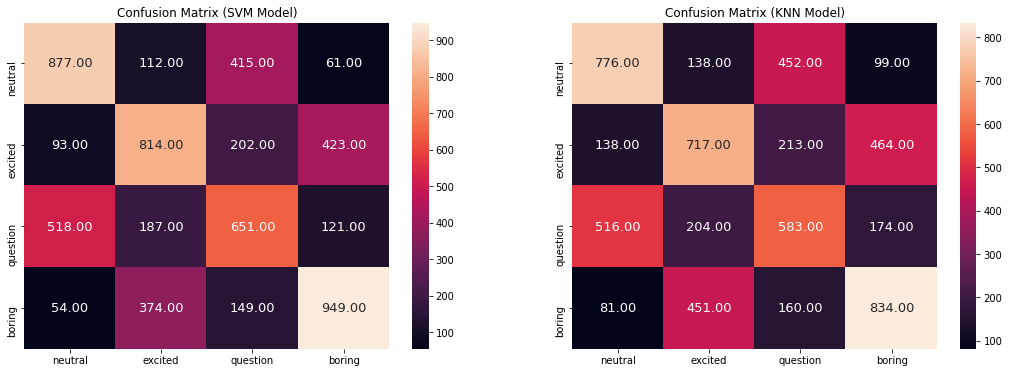

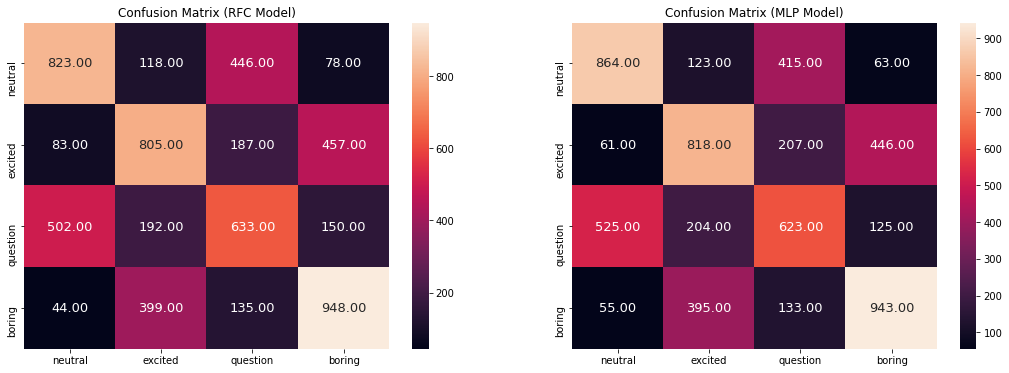

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

# get predictions on validation set 
svm_label_prediction = svm_model.predict(features_val)
knn_label_prediction = knn_model.predict(features_val)
rfc_label_prediction = rfc_model.predict(features_val)
mlp_label_prediction = mlp_model.predict(features_val)

# build confusion matrix
svm_conf_matrix = confusion_matrix(label_val, svm_label_prediction)
knn_conf_matrix = confusion_matrix(label_val, knn_label_prediction)
rfc_conf_matrix = confusion_matrix(label_val, rfc_label_prediction)
mlp_conf_matrix = confusion_matrix(label_val, mlp_label_prediction)


# set labels for matrix axes from intonations
intonation_list =['neutral','excited','question','boring']
intonation_name = [intonation for intonation in intonation_list]

# make a confusion matrix with labels using a DataFrame
svm_confmatrix_df = pd.DataFrame(svm_conf_matrix, index=intonation_name, columns=intonation_name)
knn_confmatrix_df = pd.DataFrame(knn_conf_matrix, index=intonation_name, columns=intonation_name)
rfc_confmatrix_df = pd.DataFrame(rfc_conf_matrix, index=intonation_name, columns=intonation_name)
mlp_confmatrix_df = pd.DataFrame(mlp_conf_matrix, index=intonation_name, columns=intonation_name)

#display(svm_confmatrix_df)
#display(knn_confmatrix_df)
#display(rfc_confmatrix_df)
#display(mlp_confmatrix_df)

# plot confusion matrices

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title('Confusion Matrix (SVM Model)')
sn.heatmap(svm_confmatrix_df, annot=True, annot_kws={"size": 13}, fmt=".2f")

plt.subplot(1,2,2)
plt.title('Confusion Matrix (KNN Model)')
sn.heatmap(knn_confmatrix_df, annot=True, annot_kws={"size": 13}, fmt=".2f")
plt.show()

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title('Confusion Matrix (RFC Model)')
sn.heatmap(rfc_confmatrix_df, annot=True, annot_kws={"size": 13}, fmt=".2f")

plt.subplot(1,2,2)
plt.title('Confusion Matrix (MLP Model)')
sn.heatmap(mlp_confmatrix_df, annot=True, annot_kws={"size": 13}, fmt=".2f")
plt.show()

We do observe that with the  Neural Network and KNN we have got the better accuracy and hence these are more favourable models.

# **Advanced Solution**

Advanced solution description here.


Importing the required libraries and inbuilt functions.

In [92]:
# python library imports
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os, sys, re, pickle, glob
from PIL import Image
import pathlib
import csv 
# sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from keras import layers
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')
import IPython.display as ipd
from google.colab import drive

Mounting the Google drive

In [93]:
drive.mount("/content/drive", force_remount=True)
path = '/content/drive/MyDrive/Project/Data/TrainingMLEnd'

Mounted at /content/drive


Visualization of the Audio Files: In this section, we have read and plotted the MileEnd audio segments for better understanding of the samples.

20000
/content/drive/MyDrive/Project/Data/TrainingMLEnd/training/0016981.wav


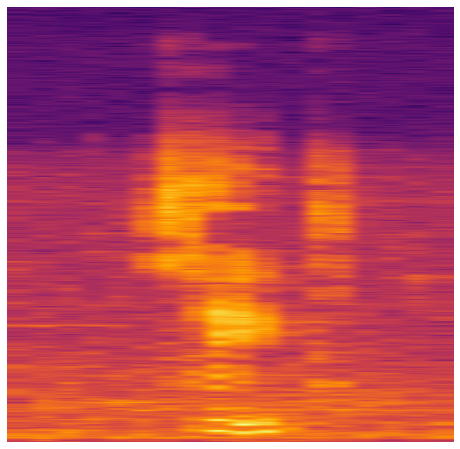

/content/drive/MyDrive/Project/Data/TrainingMLEnd/training/0017318.wav


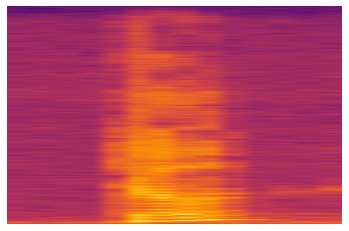

/content/drive/MyDrive/Project/Data/TrainingMLEnd/training/0007988.wav


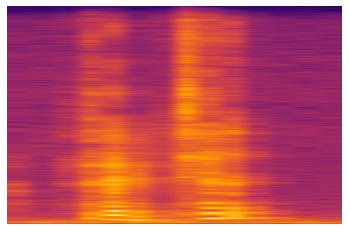

/content/drive/MyDrive/Project/Data/TrainingMLEnd/training/0019628.wav


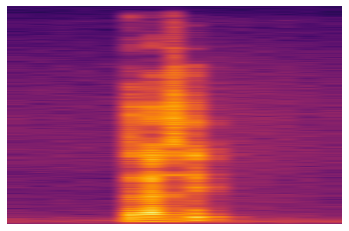

/content/drive/MyDrive/Project/Data/TrainingMLEnd/training/0012564.wav


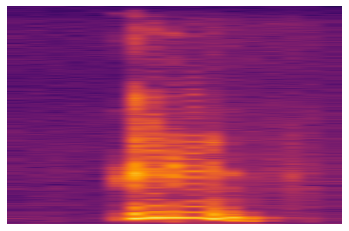

<Figure size 432x288 with 0 Axes>

In [95]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
files = glob.glob('/content/drive/MyDrive/Project/Data/TrainingMLEnd/*/*.wav')
print(len(files))

intonations = 'neutral bored excited question'.split()
for filename in files[:5]:
    print(filename)        
    y, sr = librosa.load(filename, mono=True, duration=5)
    plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
    plt.axis('off');
    plt.show()
    plt.clf()

Data Preprocessing: Arranging all the feature header in this section.

In [96]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

print(header)

['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


Labels Processing: Loading all the labels into a variable to process and feed into our model.

In [97]:
labels = pd.read_csv('/content/drive/MyDrive/Project/Data/TrainingMLEnd/trainingMLEnd.csv')
labels['digit_label']

0         4
1         2
2        70
3         2
4         4
         ..
19995    90
19996    10
19997    90
19998    19
19999    20
Name: digit_label, Length: 20000, dtype: int64

In [98]:
labels['File ID']

0        0000000.wav
1        0000001.wav
2        0000002.wav
3        0000003.wav
4        0000004.wav
            ...     
19995    0019995.wav
19996    0019996.wav
19997    0019997.wav
19998    0019998.wav
19999    0019999.wav
Name: File ID, Length: 20000, dtype: object

Feature Extraction: Extracting features from first 1000 audio files and saving them into a CSV file which in turn will be used as the input of our model.

In [99]:

new_dataset_path = '/content/drive/MyDrive/Project/Data/TrainingMLEnd/new_dataset.csv'
file = open(new_dataset_path, 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

digit_idx = 0
for filename in labels['File ID'][:1000]:
# for filename in files[:50]:    
    filename = f'/content/drive/MyDrive/Project/Data/TrainingMLEnd/training/{filename}'
    y, sr = librosa.load(filename, mono=True, duration=30)
    digit_label = labels['digit_label'][digit_idx]
    digit_idx += 1
    # print(filename, '=>', digit_label)
    if (digit_label) > 9:
      continue

    # rmse = librosa.feature.rmse(y=y)
    rmse = librosa.feature.rms(y=y)[0]
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    filename2 = os.path.basename(filename)
    to_append = f'{filename2} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {digit_label}'
    file = open(new_dataset_path, 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

Visualizing Feature Data: Here we are visualing the features that were saved into a CSV file.

In [100]:
data = pd.read_csv(new_dataset_path)
data

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0000000.wav,0.463416,0.009657,2406.574812,2197.995732,4693.939209,0.159003,-615.650696,76.079506,14.183249,2.055386,-14.936810,-1.414083,-1.754389,0.165803,-7.749091,-12.595222,-5.167373,-4.739631,-4.016208,-7.628643,-7.643737,-6.141539,-1.972690,-5.131233,-6.140224,-3.352760,4
1,0000001.wav,0.498955,0.031027,2681.456753,2434.352641,5335.701069,0.155646,-326.022553,77.891144,-19.062096,21.070469,3.021273,2.141247,-4.021226,-2.159979,-7.786098,-1.169008,-5.357862,-3.352915,-1.678581,-7.583438,-5.102869,0.549777,-1.631977,5.485393,0.204081,-1.796568,2
2,0000003.wav,0.585279,0.031680,883.134345,1446.833328,1627.869907,0.027166,-452.457703,97.484871,25.988502,21.277096,17.212198,12.850103,17.728901,7.606271,1.237578,6.582763,3.111713,1.333293,-1.959630,5.519849,8.656970,3.106895,3.027153,7.707105,6.880334,6.574434,2
3,0000004.wav,0.418097,0.078083,1911.305590,1994.697128,3658.686967,0.105957,-359.200897,97.792557,10.582139,9.163197,14.097530,-0.814324,2.324103,1.685807,-8.576827,5.498129,-6.234785,-0.848851,1.803127,-1.293006,5.073626,2.455812,5.221500,-0.779512,1.331830,-3.515458,4
4,0000006.wav,0.570554,0.073354,2041.675442,1915.549197,4090.016602,0.118665,-366.935761,71.676834,6.974798,15.992710,-2.613075,5.743099,-7.719092,2.960069,-1.692857,0.917281,1.651239,0.788469,-0.471782,1.176938,5.195519,1.522602,7.699098,-1.407485,1.024862,1.623773,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0003028.wav,0.470087,0.025918,2184.176757,2091.348176,4637.115479,0.086344,-517.901916,75.418121,0.464317,68.792641,-5.140261,2.196532,6.164740,-6.285162,-2.005452,-11.337675,7.916064,-2.287158,-2.576319,16.938030,-6.723778,-7.036172,11.409913,-3.101119,-7.843840,-1.635006,8
996,0003029.wav,0.540526,0.013540,3613.457342,2643.324931,6532.221398,0.239436,-528.681091,50.075912,2.854209,17.588743,25.051250,-1.346719,-9.092442,1.383670,-4.909911,-9.972861,-9.568122,-8.811994,-5.436234,-8.208601,1.800935,-4.133577,-5.646774,1.169743,-6.058655,-0.988782,6
997,0003030.wav,0.479272,0.007011,2260.251909,2374.078372,4453.894606,0.110126,-505.618103,95.800171,-5.248076,21.399790,22.224562,-4.839945,-6.949420,2.527960,-14.114440,-2.360236,-14.347725,-10.678619,-6.129620,-4.143895,-10.992332,-2.174281,-5.827340,-4.327530,-5.725960,-3.737301,2
998,0003031.wav,0.529724,0.013351,2284.972050,1977.756921,4389.460637,0.141652,-500.302277,104.098823,-7.895854,38.954926,-20.363829,12.931505,-7.041053,0.439957,-3.398570,-8.369959,-2.466897,-3.866351,-3.352447,-7.104224,-0.005015,-4.441011,-4.149823,-7.190684,-2.639712,-5.294056,1


Feature Selection and Preparing Training & Test Data: In this section we remove all unncessary data from the feature CSV, transform them and split them to achieve Training & Test datasets.

In [101]:
data.head() # Dropping unneccesary columns
data = data.drop(['filename'],axis=1) # Encoding the Labels
digit_list = data.iloc[:, -1]
print(digit_list)
encoder = LabelEncoder()
y = encoder.fit_transform(digit_list) # Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float)) # Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

0      4
1      2
2      2
3      4
4      2
      ..
995    8
996    6
997    2
998    1
999    4
Name: label, Length: 1000, dtype: int64


Visualizing the Features

In [102]:
data.iloc[:, :-1]

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.463416,0.009657,2406.574812,2197.995732,4693.939209,0.159003,-615.650696,76.079506,14.183249,2.055386,-14.936810,-1.414083,-1.754389,0.165803,-7.749091,-12.595222,-5.167373,-4.739631,-4.016208,-7.628643,-7.643737,-6.141539,-1.972690,-5.131233,-6.140224,-3.352760
1,0.498955,0.031027,2681.456753,2434.352641,5335.701069,0.155646,-326.022553,77.891144,-19.062096,21.070469,3.021273,2.141247,-4.021226,-2.159979,-7.786098,-1.169008,-5.357862,-3.352915,-1.678581,-7.583438,-5.102869,0.549777,-1.631977,5.485393,0.204081,-1.796568
2,0.585279,0.031680,883.134345,1446.833328,1627.869907,0.027166,-452.457703,97.484871,25.988502,21.277096,17.212198,12.850103,17.728901,7.606271,1.237578,6.582763,3.111713,1.333293,-1.959630,5.519849,8.656970,3.106895,3.027153,7.707105,6.880334,6.574434
3,0.418097,0.078083,1911.305590,1994.697128,3658.686967,0.105957,-359.200897,97.792557,10.582139,9.163197,14.097530,-0.814324,2.324103,1.685807,-8.576827,5.498129,-6.234785,-0.848851,1.803127,-1.293006,5.073626,2.455812,5.221500,-0.779512,1.331830,-3.515458
4,0.570554,0.073354,2041.675442,1915.549197,4090.016602,0.118665,-366.935761,71.676834,6.974798,15.992710,-2.613075,5.743099,-7.719092,2.960069,-1.692857,0.917281,1.651239,0.788469,-0.471782,1.176938,5.195519,1.522602,7.699098,-1.407485,1.024862,1.623773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.470087,0.025918,2184.176757,2091.348176,4637.115479,0.086344,-517.901916,75.418121,0.464317,68.792641,-5.140261,2.196532,6.164740,-6.285162,-2.005452,-11.337675,7.916064,-2.287158,-2.576319,16.938030,-6.723778,-7.036172,11.409913,-3.101119,-7.843840,-1.635006
996,0.540526,0.013540,3613.457342,2643.324931,6532.221398,0.239436,-528.681091,50.075912,2.854209,17.588743,25.051250,-1.346719,-9.092442,1.383670,-4.909911,-9.972861,-9.568122,-8.811994,-5.436234,-8.208601,1.800935,-4.133577,-5.646774,1.169743,-6.058655,-0.988782
997,0.479272,0.007011,2260.251909,2374.078372,4453.894606,0.110126,-505.618103,95.800171,-5.248076,21.399790,22.224562,-4.839945,-6.949420,2.527960,-14.114440,-2.360236,-14.347725,-10.678619,-6.129620,-4.143895,-10.992332,-2.174281,-5.827340,-4.327530,-5.725960,-3.737301
998,0.529724,0.013351,2284.972050,1977.756921,4389.460637,0.141652,-500.302277,104.098823,-7.895854,38.954926,-20.363829,12.931505,-7.041053,0.439957,-3.398570,-8.369959,-2.466897,-3.866351,-3.352447,-7.104224,-0.005015,-4.441011,-4.149823,-7.190684,-2.639712,-5.294056


In [103]:
np.array(data.iloc[:, :-1], dtype = float)[0]

array([ 4.63415951e-01,  9.65711100e-03,  2.40657481e+03,  2.19799573e+03,
        4.69393921e+03,  1.59003364e-01, -6.15650696e+02,  7.60795059e+01,
        1.41832495e+01,  2.05538583e+00, -1.49368095e+01, -1.41408289e+00,
       -1.75438929e+00,  1.65802956e-01, -7.74909115e+00, -1.25952225e+01,
       -5.16737270e+00, -4.73963070e+00, -4.01620817e+00, -7.62864256e+00,
       -7.64373684e+00, -6.14153910e+00, -1.97269011e+00, -5.13123321e+00,
       -6.14022350e+00, -3.35276008e+00])

In [104]:
X_train

array([[ 0.26571419, -0.8169411 ,  0.03486796, ..., -0.09021174,
        -0.18225096, -1.16178952],
       [-0.91708935, -0.73131892,  0.91648039, ..., -0.57559019,
        -0.36940471,  0.45937952],
       [-1.32749183, -0.58969774, -1.35749181, ..., -1.9417552 ,
         0.19739209, -1.96064752],
       ...,
       [-1.83892643,  2.07202132,  0.16591055, ..., -0.53995297,
        -0.17172944, -0.76931598],
       [ 1.81714066, -0.9831328 ,  1.59183064, ...,  0.10361186,
         0.81715474, -0.06551376],
       [-0.33553791,  0.339787  ,  0.56801343, ...,  0.82643362,
         0.22233445, -1.80417289]])

Checking the label data

In [105]:
y

array([4, 2, 2, 4, 2, 1, 3, 6, 9, 9, 2, 5, 4, 7, 9, 1, 9, 9, 1, 9, 5, 4,
       5, 6, 3, 9, 7, 3, 5, 0, 6, 4, 9, 9, 0, 9, 0, 7, 3, 9, 1, 7, 1, 6,
       6, 3, 9, 9, 4, 7, 6, 8, 2, 8, 2, 3, 4, 1, 1, 0, 1, 3, 5, 5, 5, 1,
       1, 0, 2, 0, 2, 8, 2, 4, 2, 4, 9, 3, 6, 2, 5, 0, 1, 5, 7, 4, 8, 8,
       8, 6, 6, 0, 1, 4, 4, 6, 3, 3, 1, 8, 2, 5, 9, 3, 5, 6, 5, 0, 3, 6,
       8, 3, 3, 6, 3, 1, 4, 1, 6, 6, 8, 4, 1, 4, 8, 3, 9, 4, 6, 5, 6, 9,
       3, 8, 3, 4, 0, 2, 1, 3, 7, 9, 9, 9, 3, 4, 8, 7, 1, 7, 8, 0, 7, 1,
       6, 1, 8, 3, 4, 3, 3, 6, 3, 3, 7, 6, 1, 7, 7, 5, 7, 8, 7, 5, 8, 4,
       5, 3, 2, 8, 9, 7, 1, 8, 6, 6, 2, 0, 6, 3, 5, 9, 5, 7, 5, 3, 7, 9,
       0, 7, 5, 0, 9, 8, 8, 9, 7, 9, 8, 6, 5, 8, 6, 7, 0, 9, 6, 6, 4, 5,
       5, 9, 5, 6, 2, 7, 7, 6, 4, 4, 2, 1, 6, 3, 6, 0, 7, 4, 8, 1, 6, 6,
       0, 3, 4, 5, 0, 5, 7, 1, 4, 0, 4, 1, 7, 5, 5, 8, 6, 3, 5, 6, 2, 2,
       1, 8, 3, 0, 0, 1, 3, 6, 2, 0, 1, 0, 1, 3, 7, 8, 5, 9, 5, 6, 8, 0,
       8, 9, 6, 4, 4, 2, 9, 1, 6, 7, 3, 5, 2, 3, 1,

Building the Model: Here we have built our model. This is an ANN model with activatation parameters in several layers.

In [106]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [107]:
#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               6912      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 48,714
Trainable params: 48,714
Non-trainable params: 0
_________________________________________________________________


**Model Fitting and Classification:**
In this phase, we have fitted the model with training data for a number of 150 epochs with batch size of 128.

In [108]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=150,
                    batch_size=128)

Epoch 1/150
7/7 [==============================] - 1s 4ms/step - loss: 2.3067 - accuracy: 0.1137
Epoch 2/150
7/7 [==============================] - 0s 4ms/step - loss: 2.1306 - accuracy: 0.2821
Epoch 3/150
7/7 [==============================] - 0s 4ms/step - loss: 1.9925 - accuracy: 0.3622
Epoch 4/150
7/7 [==============================] - 0s 3ms/step - loss: 1.8392 - accuracy: 0.3998
Epoch 5/150
7/7 [==============================] - 0s 4ms/step - loss: 1.6876 - accuracy: 0.4465
Epoch 6/150
7/7 [==============================] - 0s 5ms/step - loss: 1.5933 - accuracy: 0.4854
Epoch 7/150
7/7 [==============================] - 0s 4ms/step - loss: 1.4665 - accuracy: 0.5292
Epoch 8/150
7/7 [==============================] - 0s 7ms/step - loss: 1.3416 - accuracy: 0.5616
Epoch 9/150
7/7 [==============================] - 0s 4ms/step - loss: 1.2650 - accuracy: 0.6050
Epoch 10/150
7/7 [==============================] - 0s 5ms/step - loss: 1.1995 - accuracy: 0.6149
Epoch 11/150
7/7 [===========

**Checking Accuracy Data**

In [109]:
train_accuracy=model.evaluate(X_train,y_train,verbose=0)
print(train_accuracy[1])

1.0


In [110]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.4650000035762787


In [111]:
X_test[1]

array([-1.04557431, -0.62554851, -1.79232349, -1.75502943, -2.17618192,
       -1.11576543, -1.11348831,  2.53185286,  3.01294369, -0.43079451,
       -0.07387153, -0.25428968,  0.62175153, -1.88658991, -0.84455947,
        0.80822965,  0.27152429, -0.76101415,  1.34662501, -0.14428213,
       -0.91775644,  0.6160703 ,  1.00288357, -1.35464834,  0.67336278,
        0.03597492])

Visualization with Confusion Matrix

In [116]:
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
import seaborn as sns

yt_p = model.predict(X_train)
print(y_train)
print(yt_p)
train_confusion_matrix = confusion_matrix(y_true=y_train, y_pred=yt_p)
#print('Training confusion matrix:\n {}\n'.format(train_confusion_matrix))

# confusion matrix
y_pred = yt_p
cf_matrix = confusion_matrix(y_train, y_pred)
#sns.heatmap(cf_matrix, annot=True)

[6 3 2 9 2 8 3 9 1 3 9 1 6 0 1 8 2 3 2 1 6 4 4 5 6 8 7 2 0 6 4 3 5 6 2 0 8
 1 3 6 7 5 9 8 6 0 0 5 5 0 9 2 6 3 1 7 7 0 6 2 8 1 0 8 6 6 5 4 8 4 6 5 0 9
 6 9 7 3 9 1 7 6 3 5 9 2 8 1 8 8 9 4 7 7 6 0 9 9 6 4 2 3 5 1 7 3 3 7 7 5 6
 9 8 6 1 2 3 6 0 1 1 1 2 9 5 2 9 4 7 4 4 1 3 1 6 0 4 8 9 9 3 5 9 6 6 5 1 7
 2 8 8 8 6 6 9 4 4 2 7 9 9 7 5 5 8 6 6 8 9 0 0 2 3 6 8 3 8 8 4 4 4 6 0 6 8
 4 3 4 9 2 1 5 8 1 8 3 6 2 1 8 5 1 3 6 8 4 8 2 4 4 8 0 9 6 4 7 8 3 8 2 0 5
 6 7 3 4 8 6 3 0 6 7 1 9 9 6 0 8 4 9 3 5 9 0 5 1 6 0 3 9 5 6 0 8 4 2 0 4 4
 4 4 9 2 7 2 2 1 8 3 6 3 8 4 9 8 9 8 6 9 8 8 1 3 5 3 0 3 3 3 7 7 7 0 2 4 8
 8 9 7 8 6 5 2 5 9 9 1 2 0 6 8 8 5 2 9 5 6 3 0 9 9 7 8 0 6 7 7 7 5 6 4 8 7
 4 7 9 2 9 0 4 6 5 8 3 9 6 4 9 3 1 1 6 5 1 1 1 6 3 5 8 0 5 4 5 5 1 1 8 5 3
 4 2 2 7 4 4 4 8 9 6 1 8 7 3 9 2 9 3 2 7 3 1 7 4 8 1 0 6 9 0 2 0 9 7 3 4 2
 0 5 3 2 5 2 3 2 8 4 0 0 2 1 1 5 1 4 5 7 3 9 4 8 9 5 1 7 6 3 1 5 5 6 2 0 3
 9 9 6 1 8 9 5 9 9 2 7 8 9 1 1 0 2 8 0 9 3 3 7 0 3 8 0 0 9 4 5 7 8 3 4 3 7
 0 9 1 1 2 1 3 1 8 2 3 7 

**Testing the Model**: We chose a random audio file from the MileEnd audio dataset and verified whether our model could predit the correct number.

In [117]:
filename = '0008039.wav' # digit file
filename = f'/content/drive/MyDrive/Project/Data/TrainingMLEnd/training/{filename}'
y, sr = librosa.load(filename, mono=True, duration=30)

rmse = librosa.feature.rms(y=y)[0]
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
zcr = librosa.feature.zero_crossing_rate(y)
mfcc = librosa.feature.mfcc(y=y, sr=sr)
to_append = f'{np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
for e in mfcc:
    to_append += f' {np.mean(e)}'

data = np.array(to_append.split(), dtype = float)
print(data)

[ 4.85848099e-01  1.93332713e-02  1.75563777e+03  2.14273670e+03
  3.82323384e+03  6.38844937e-02 -5.23734131e+02  8.29670181e+01
  6.46044874e+00  1.32291260e+01  1.62047768e+01  1.45130739e+01
  1.05986176e+01  1.56445813e+00  3.77283478e+00 -3.14707732e+00
 -1.25416346e+01 -1.08303995e+01 -1.04065943e+01 -2.08926177e+00
 -7.06236172e+00 -1.27922797e+00 -2.70969570e-01 -7.35016227e-01
 -1.79731965e+00 -4.32621193e+00]


**Reshaping the Test Input and Pulling the Prediction Values**

In [118]:
data_reshaped = data.reshape(1,-1)
predicted_label=model.predict_classes(data_reshaped)
print(predicted_label)

[5]


prediction_class = encoder.inverse_transform(predicted_label) 
prediction_class

In [119]:
prediction_class = encoder.inverse_transform(predicted_label) 
prediction_class

array([5])

# **Conclusion**

In this solution, we used the MLEnd dataset, we splitted it, we extracted features and trained the model. Our model was an Artificial Neural Network which gave us significant results. 

Finally, we proved by our test that the model can predict the correct numeral from any given MLEnd audio segment which is evident form the above test result.

